## Investigation On Intervals and Determine whether it's meal

In [1]:
import sys
sys.path.insert(0, '../scripts')

import numpy as np
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1
import meals as ml
import tools as tl
import intervals as invs
from preprocessing import get_all_sheet_names, read_excel_by_sheet

ctrl_path = '../FR1_ctrl.xlsx'
cask_path = '../FR1_cask.xlsx'
ctrl_sheets = get_all_sheet_names(ctrl_path)
cask_sheets = get_all_sheet_names(cask_path)

## Control Group

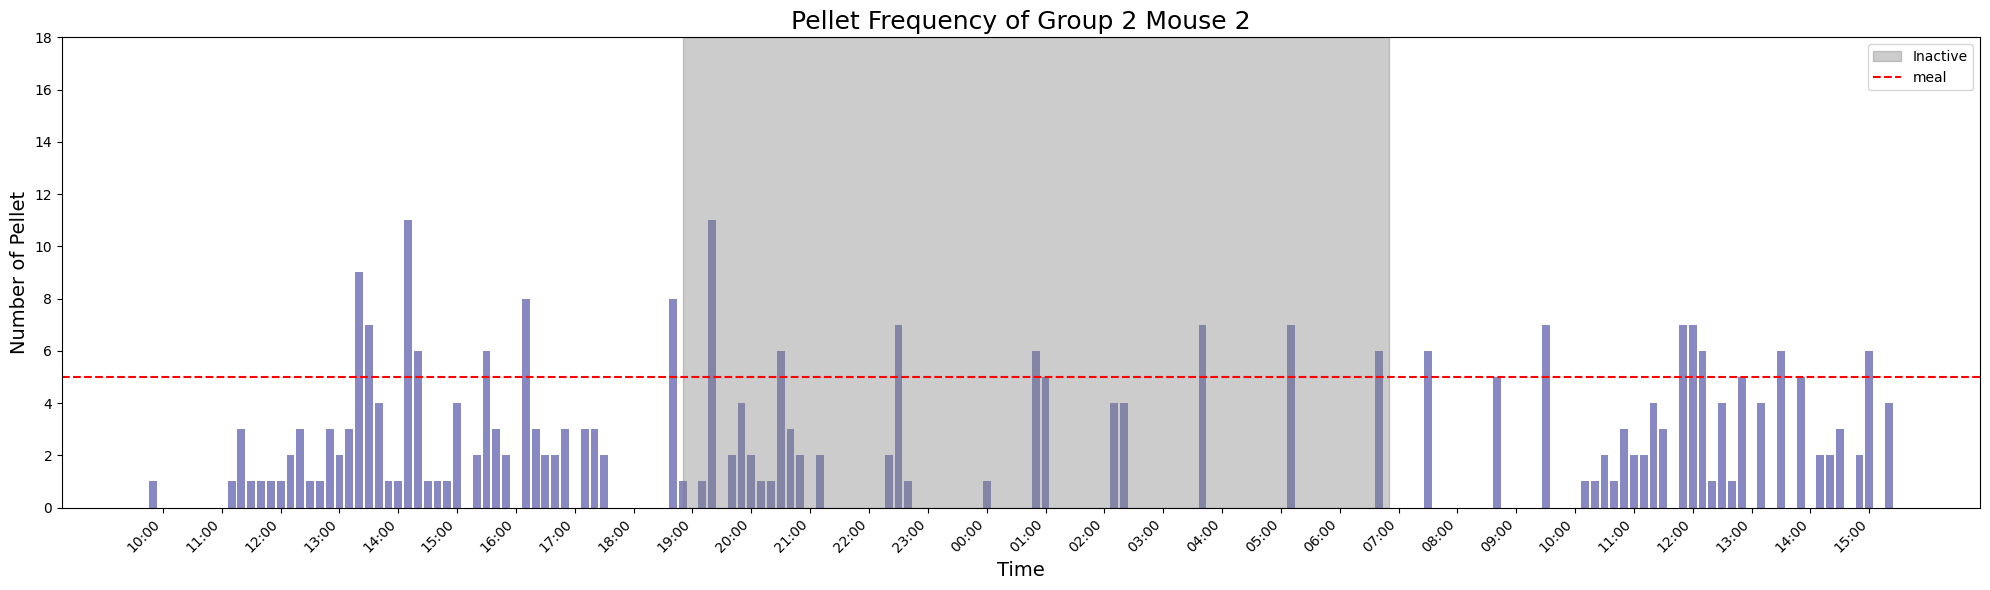

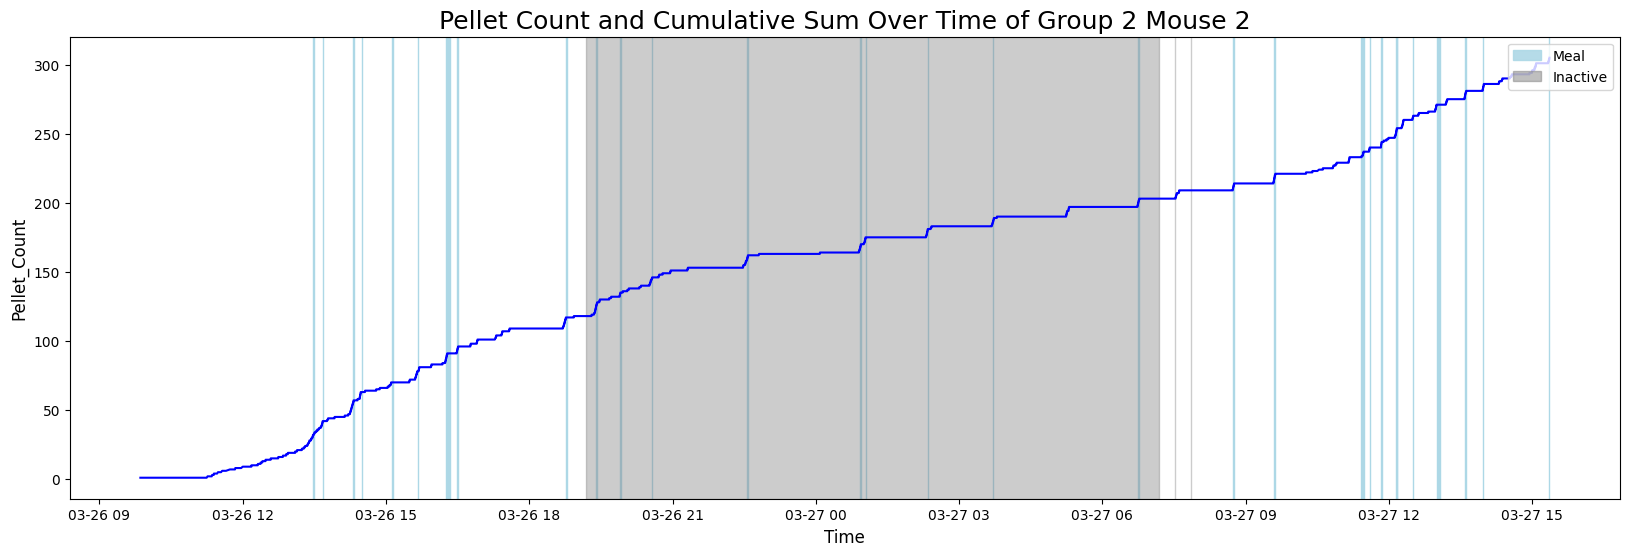

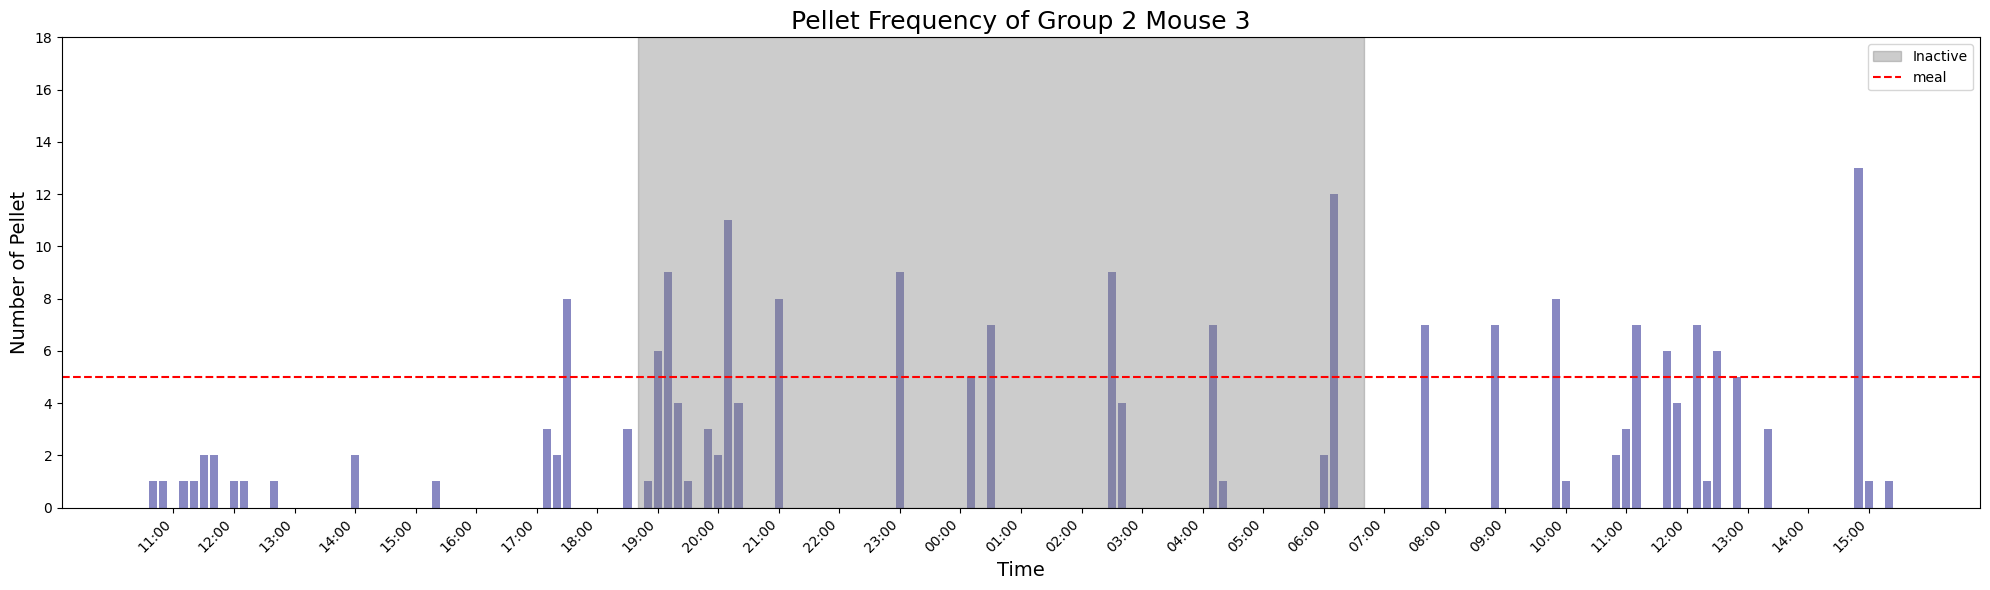

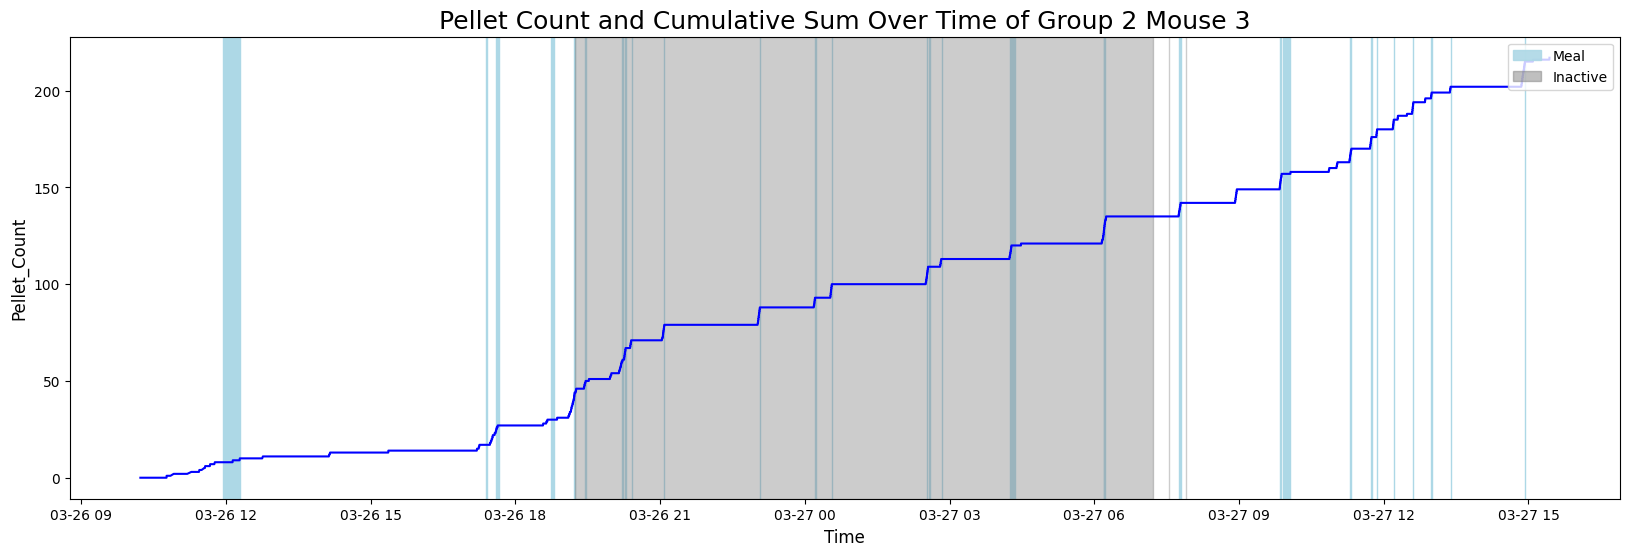

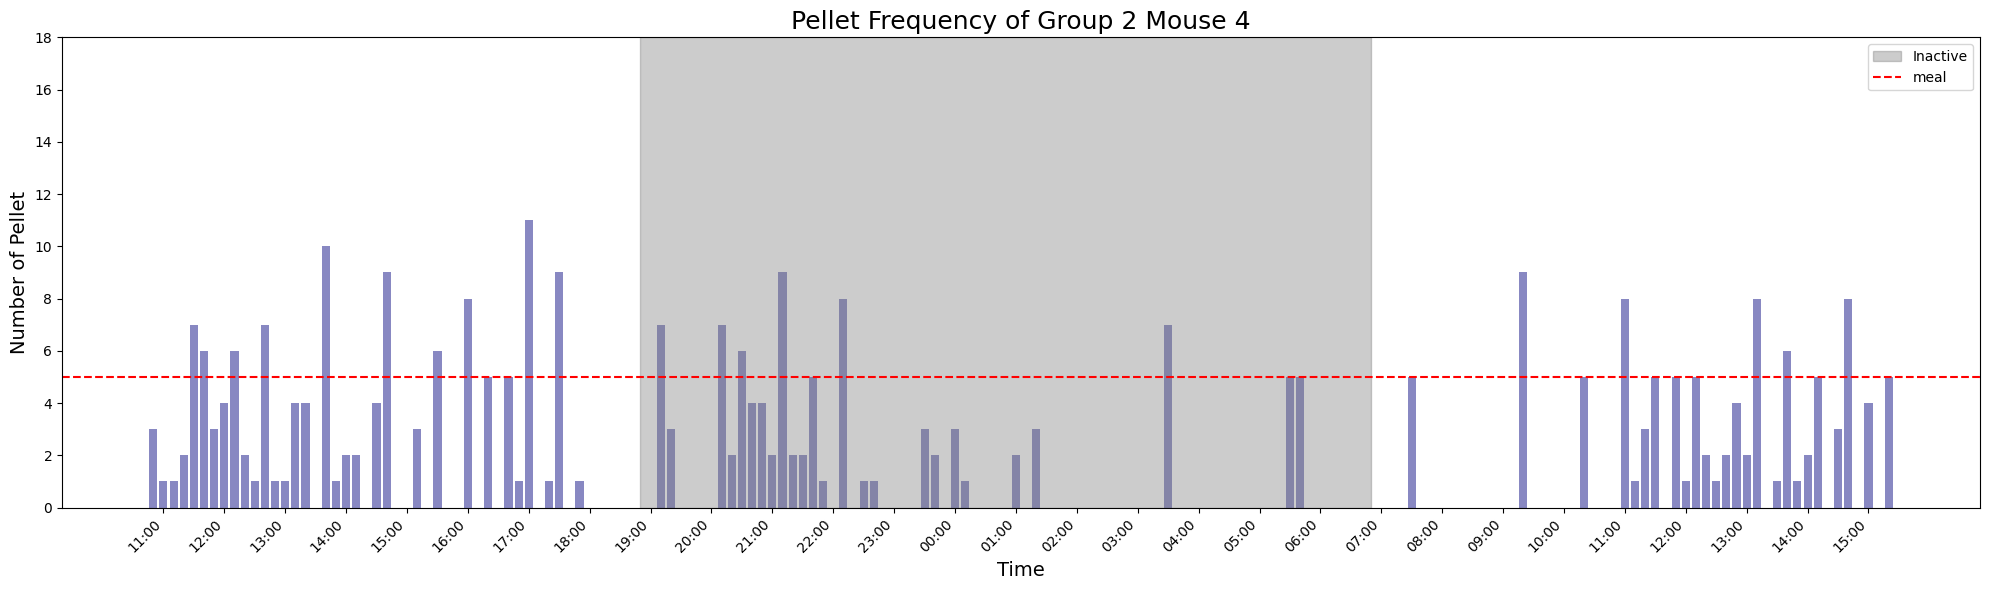

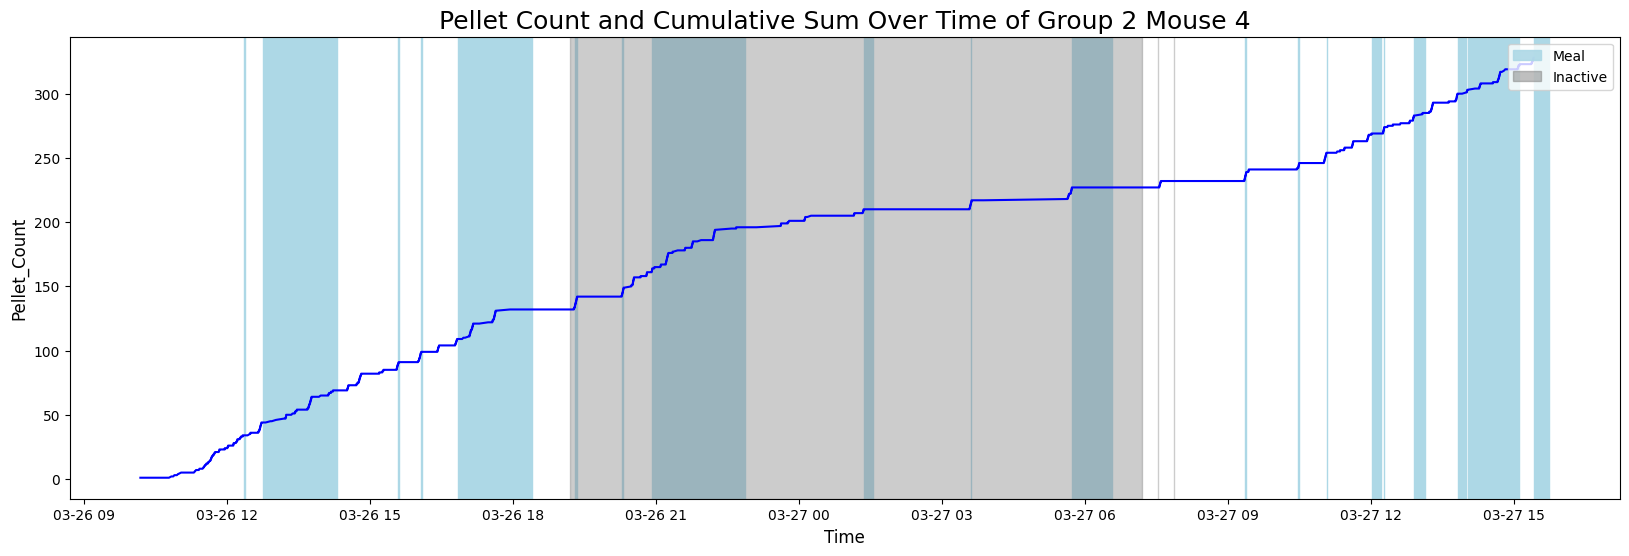

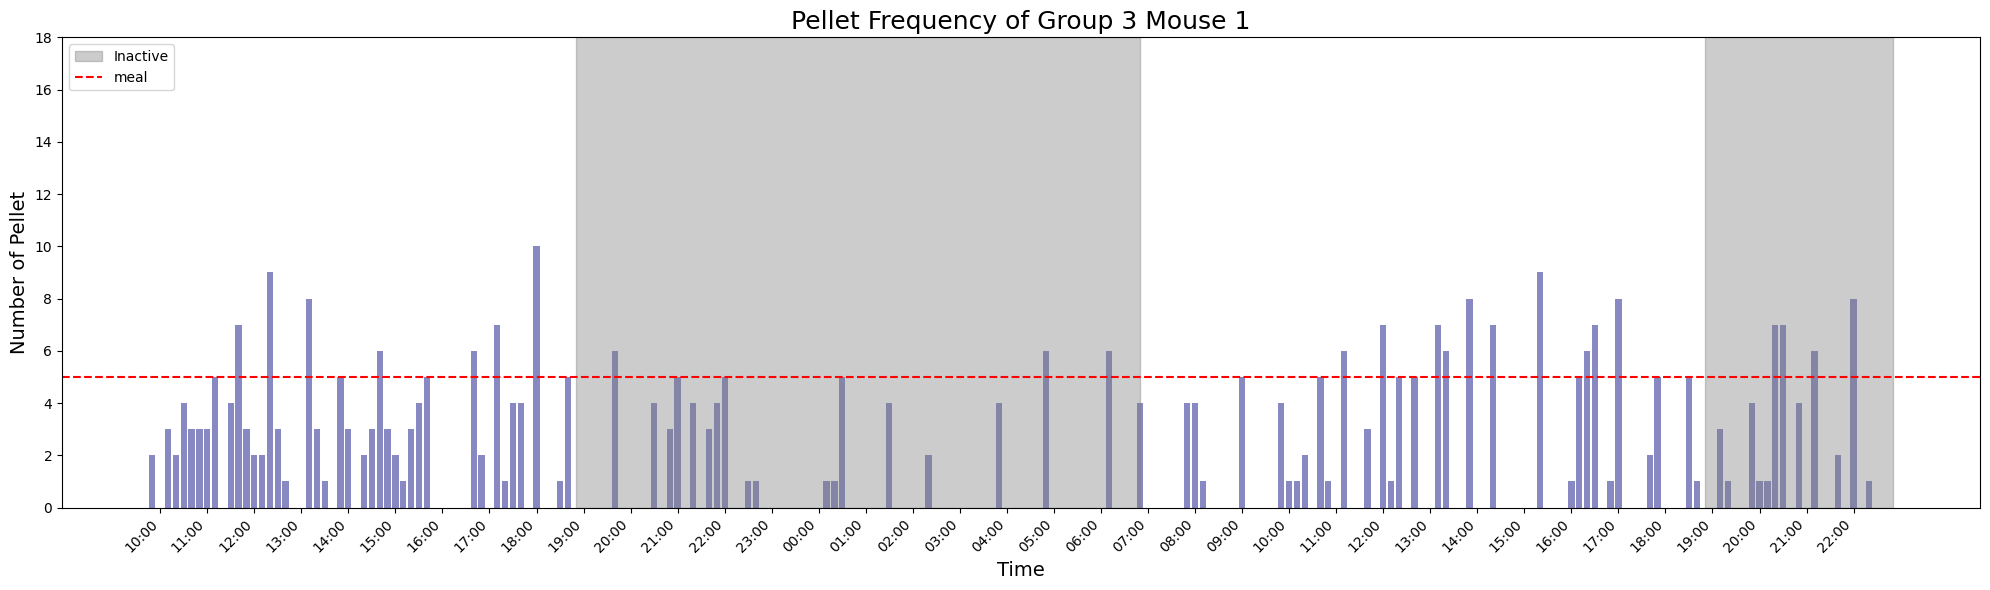

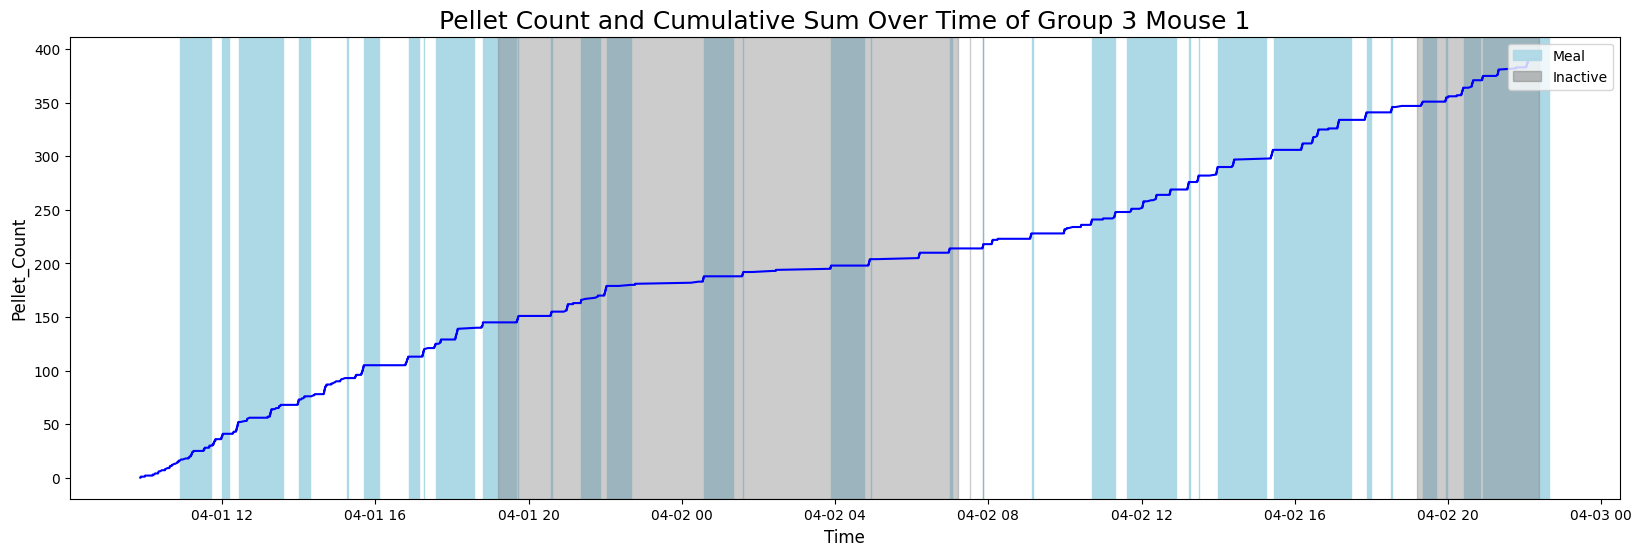

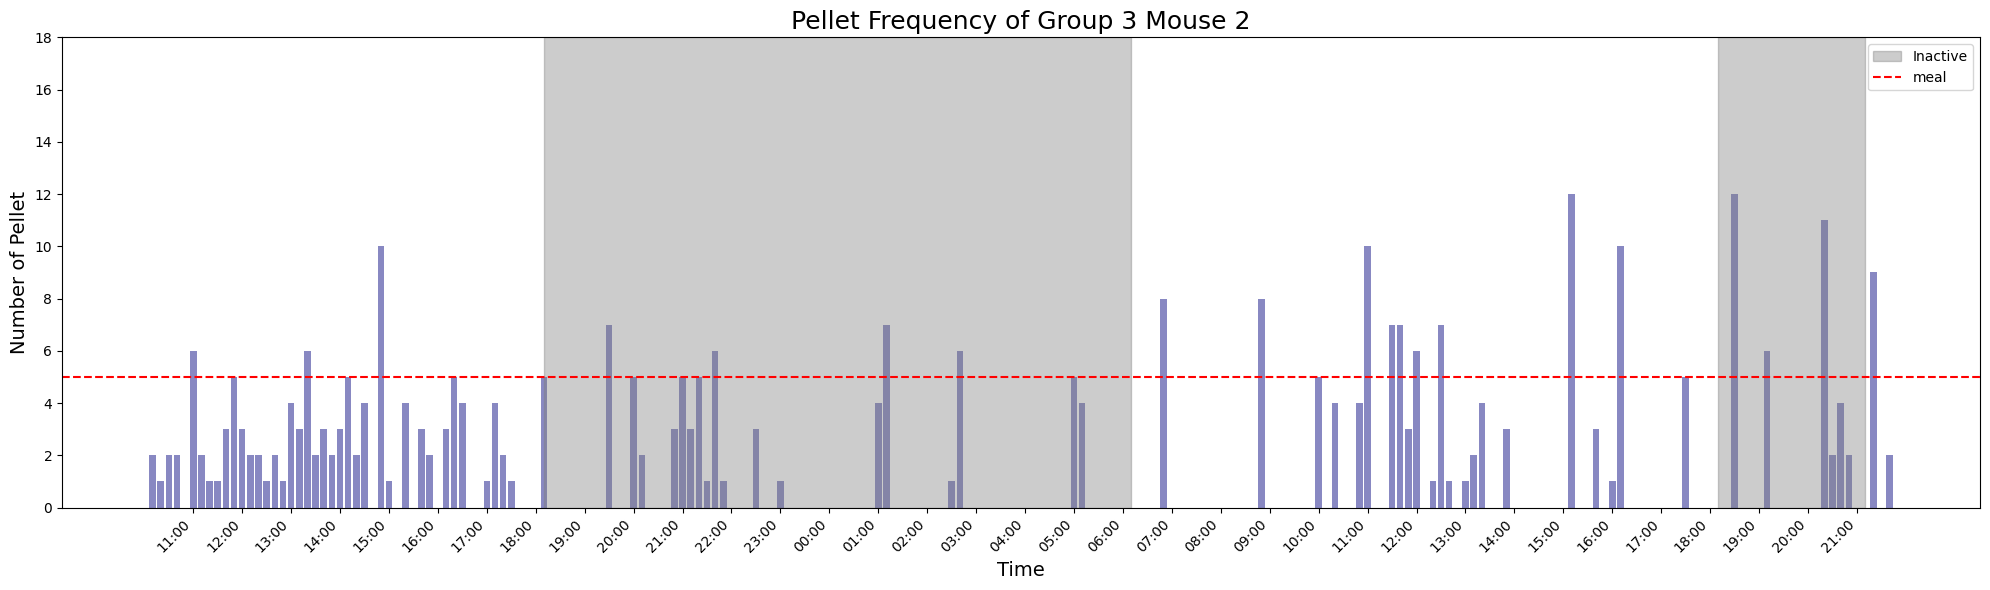

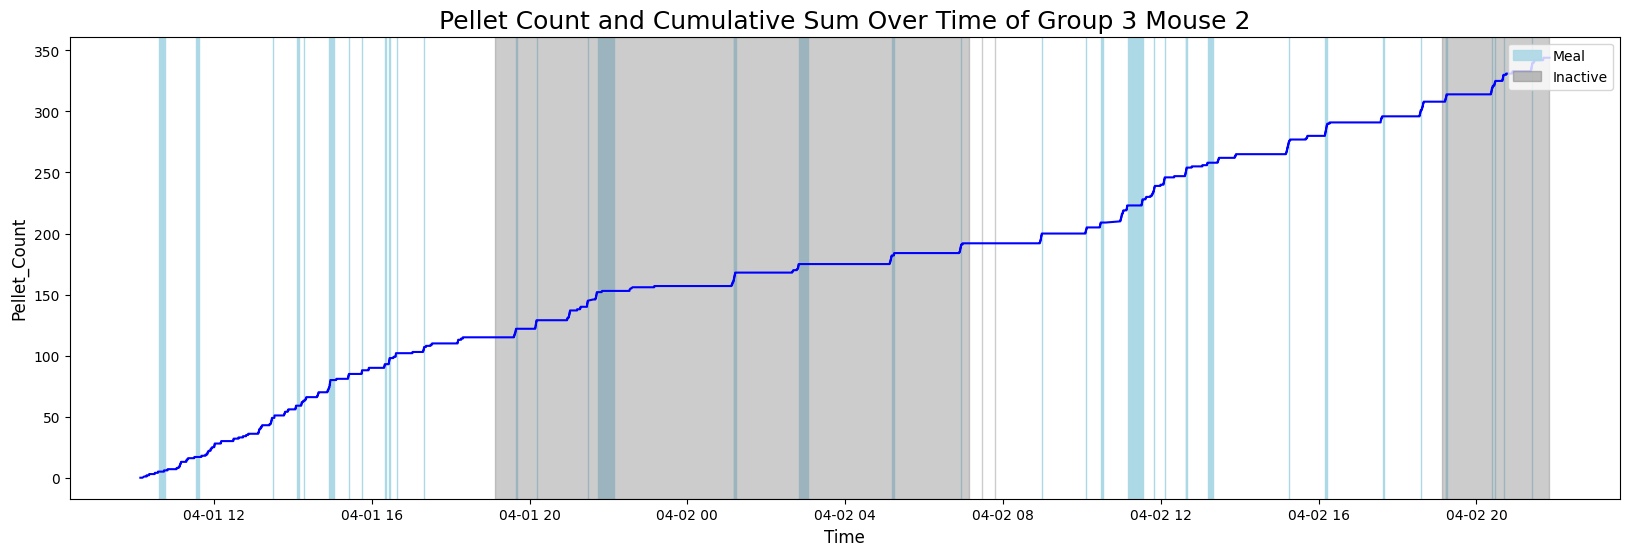

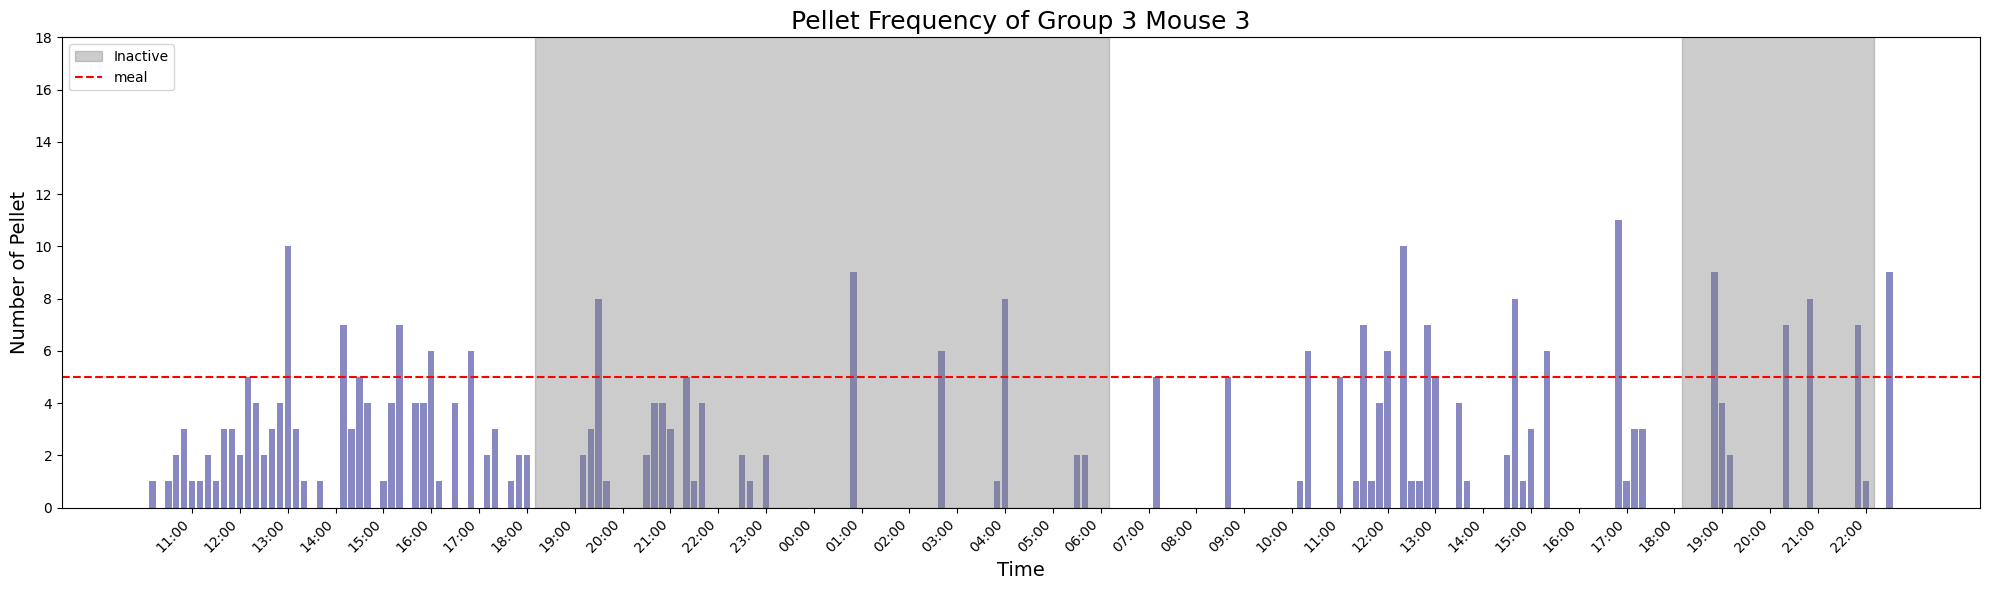

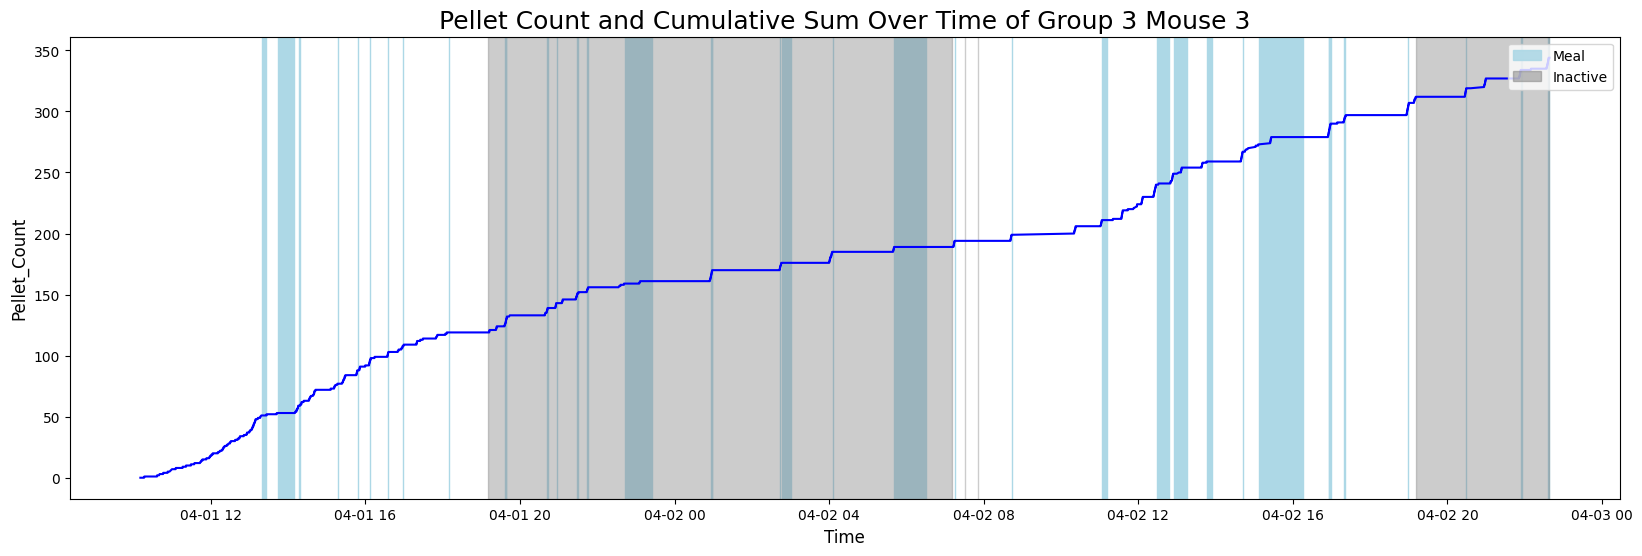

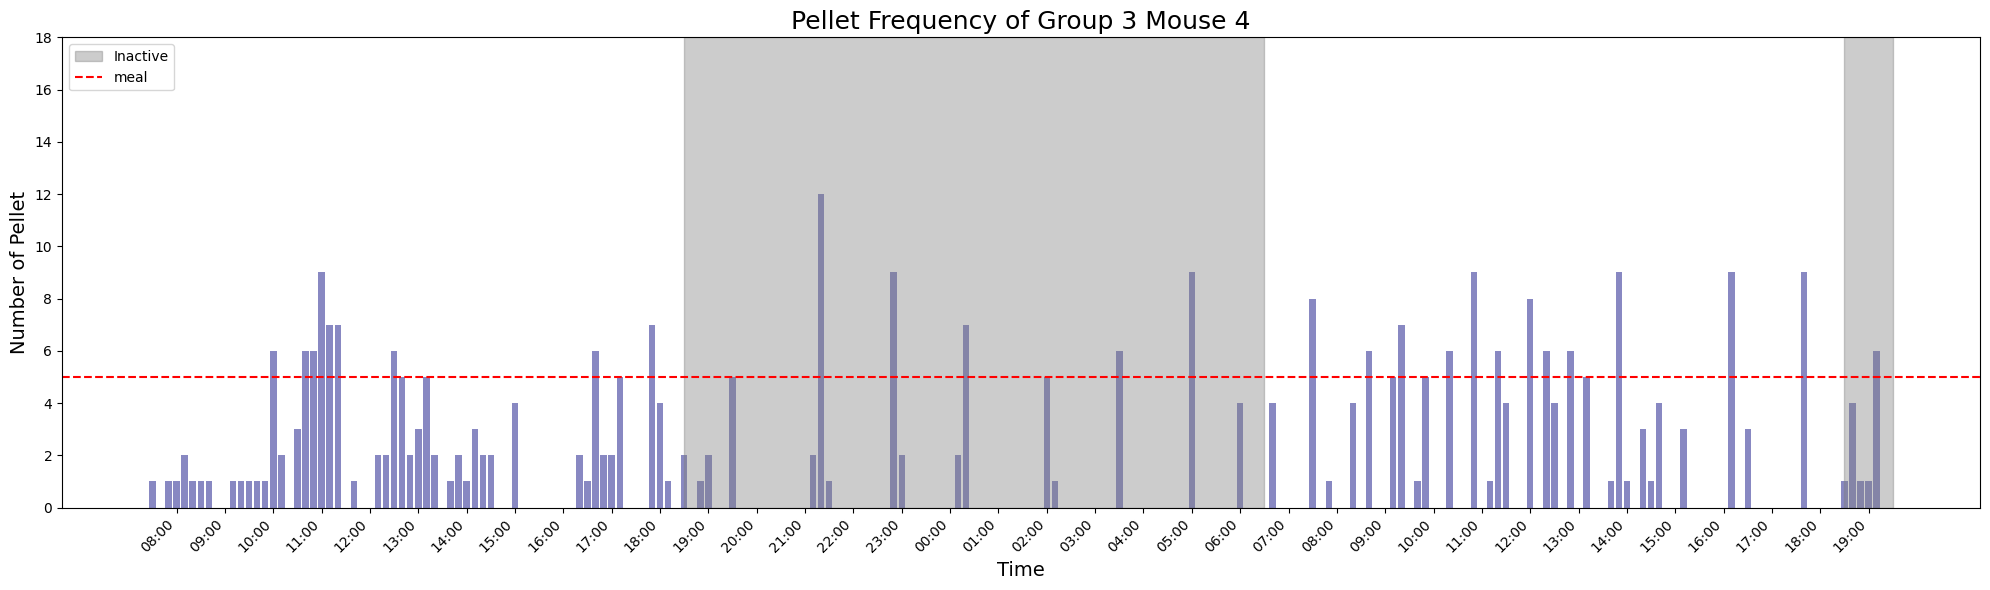

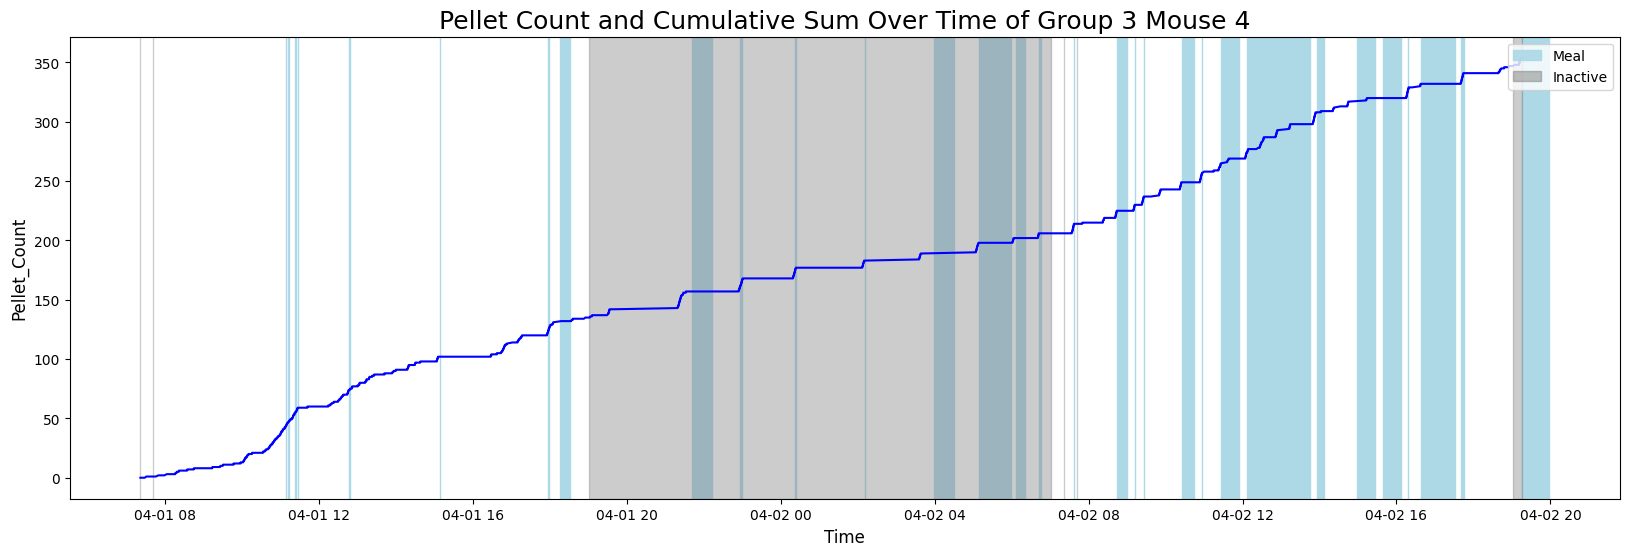

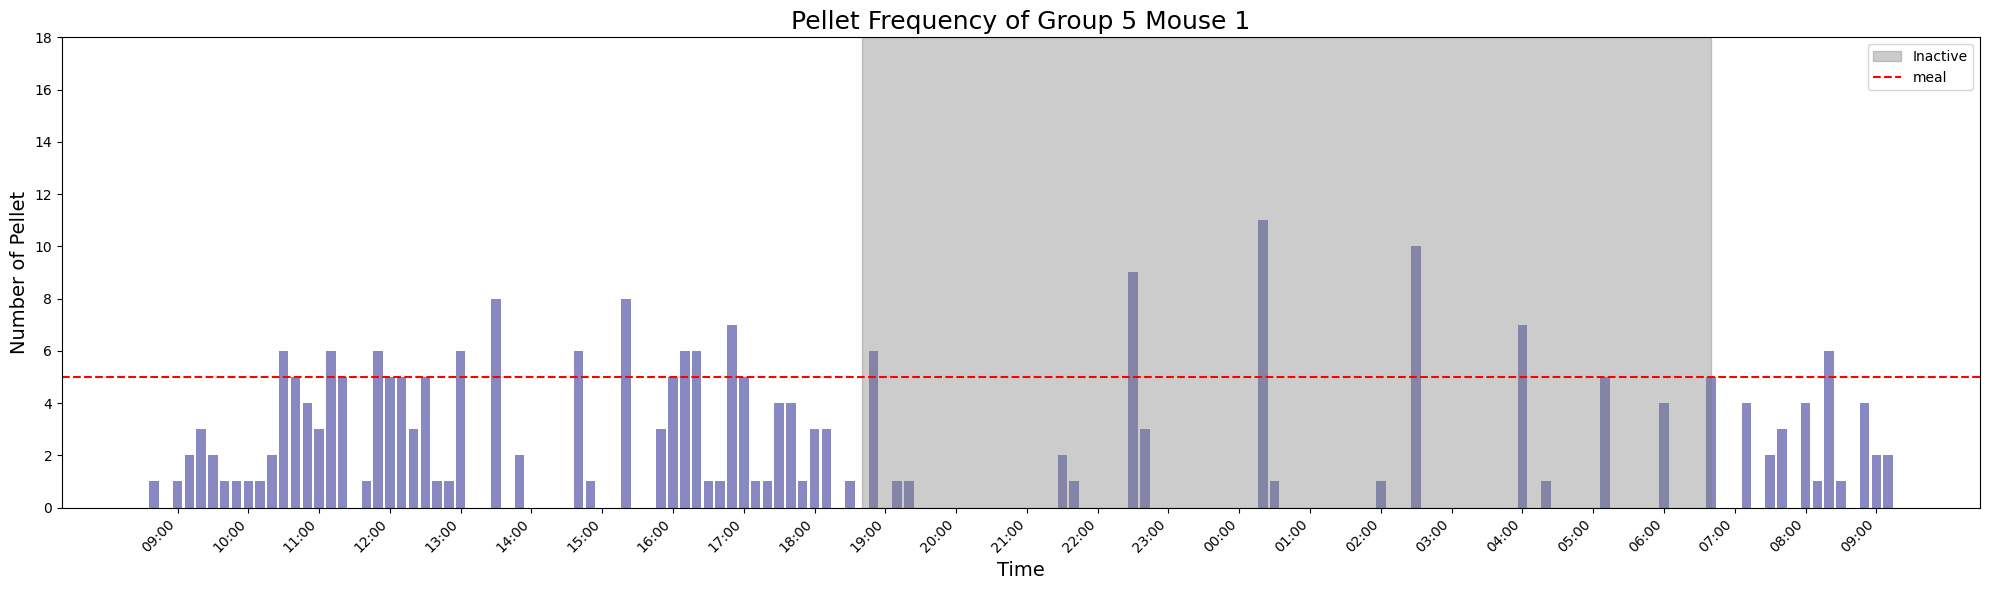

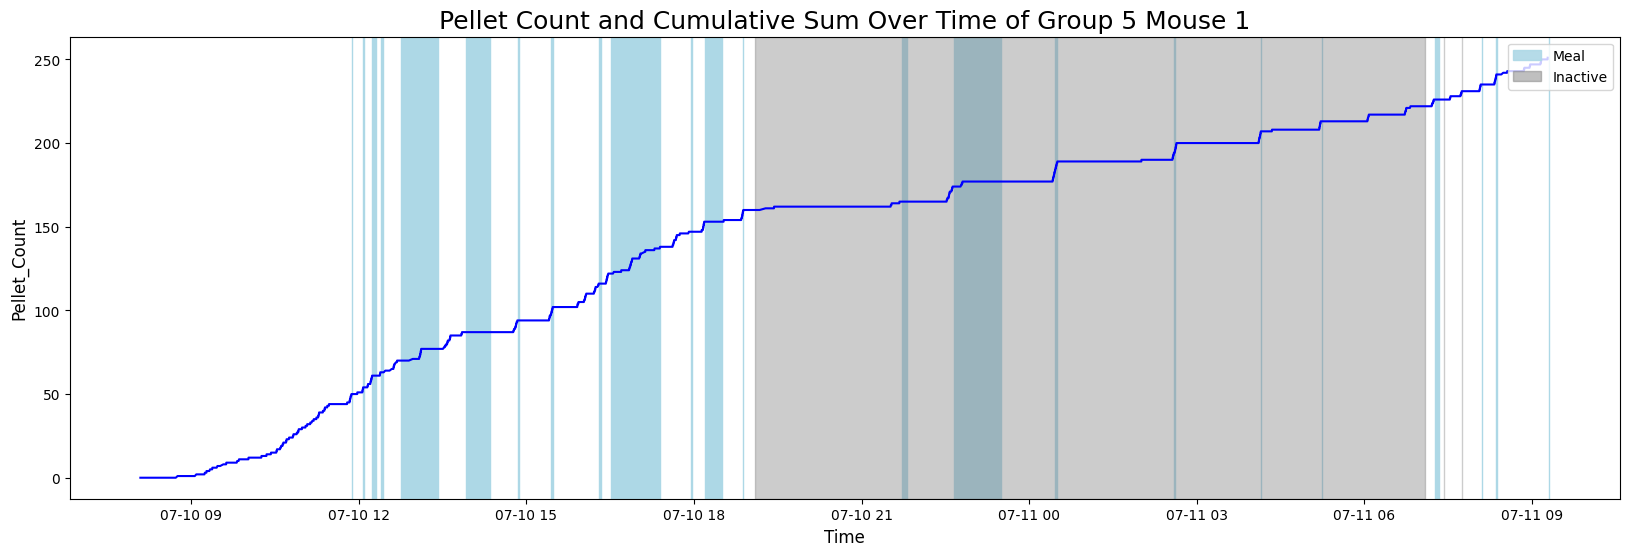

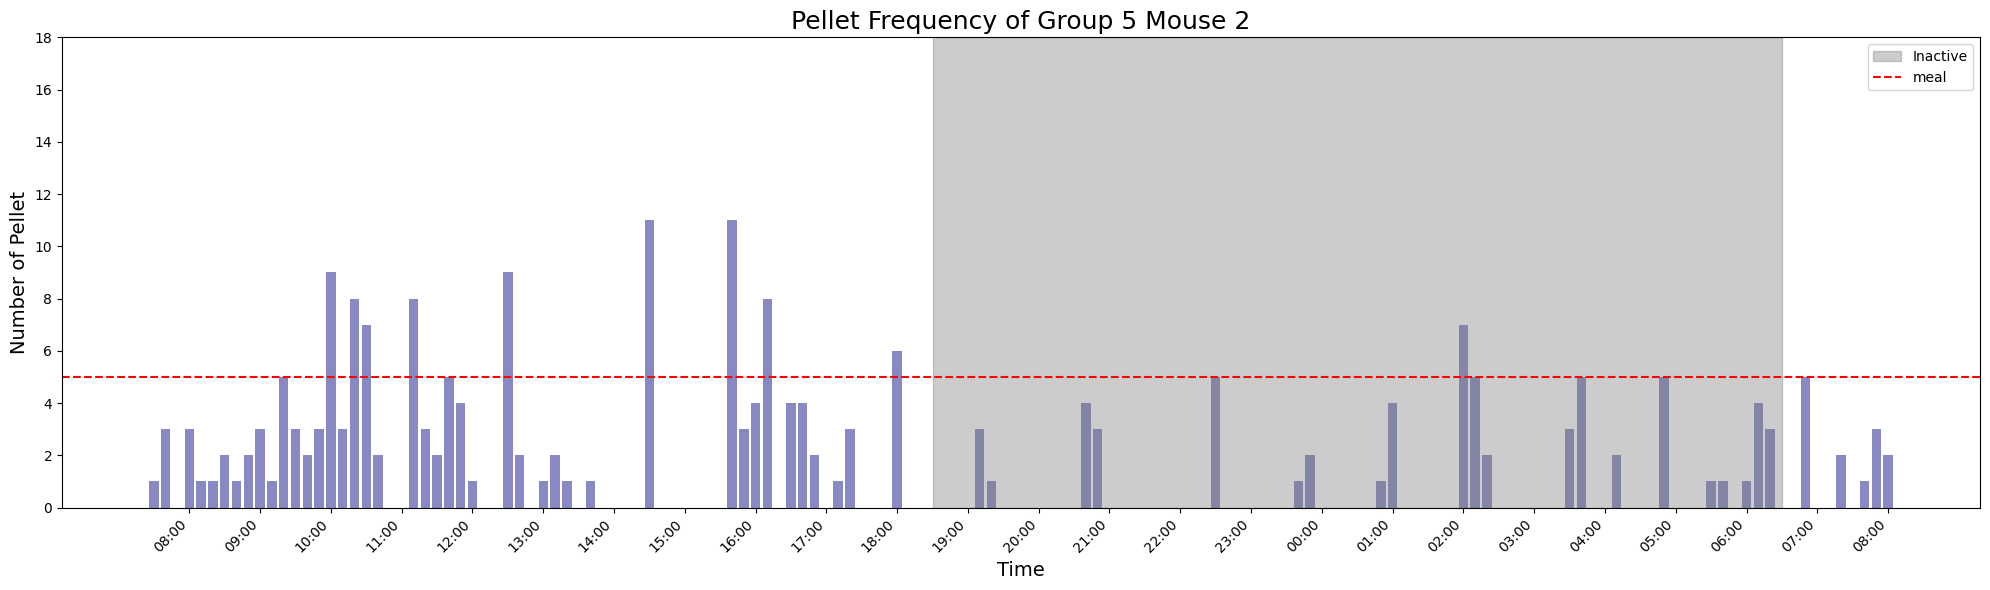

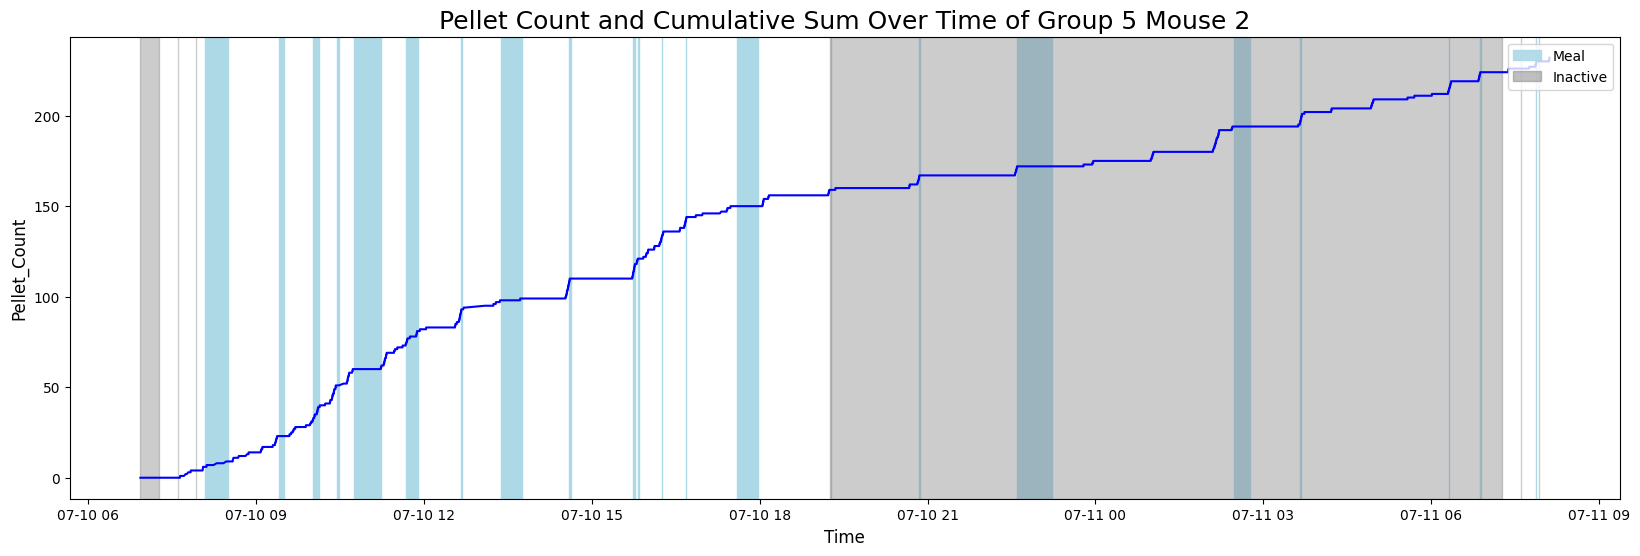

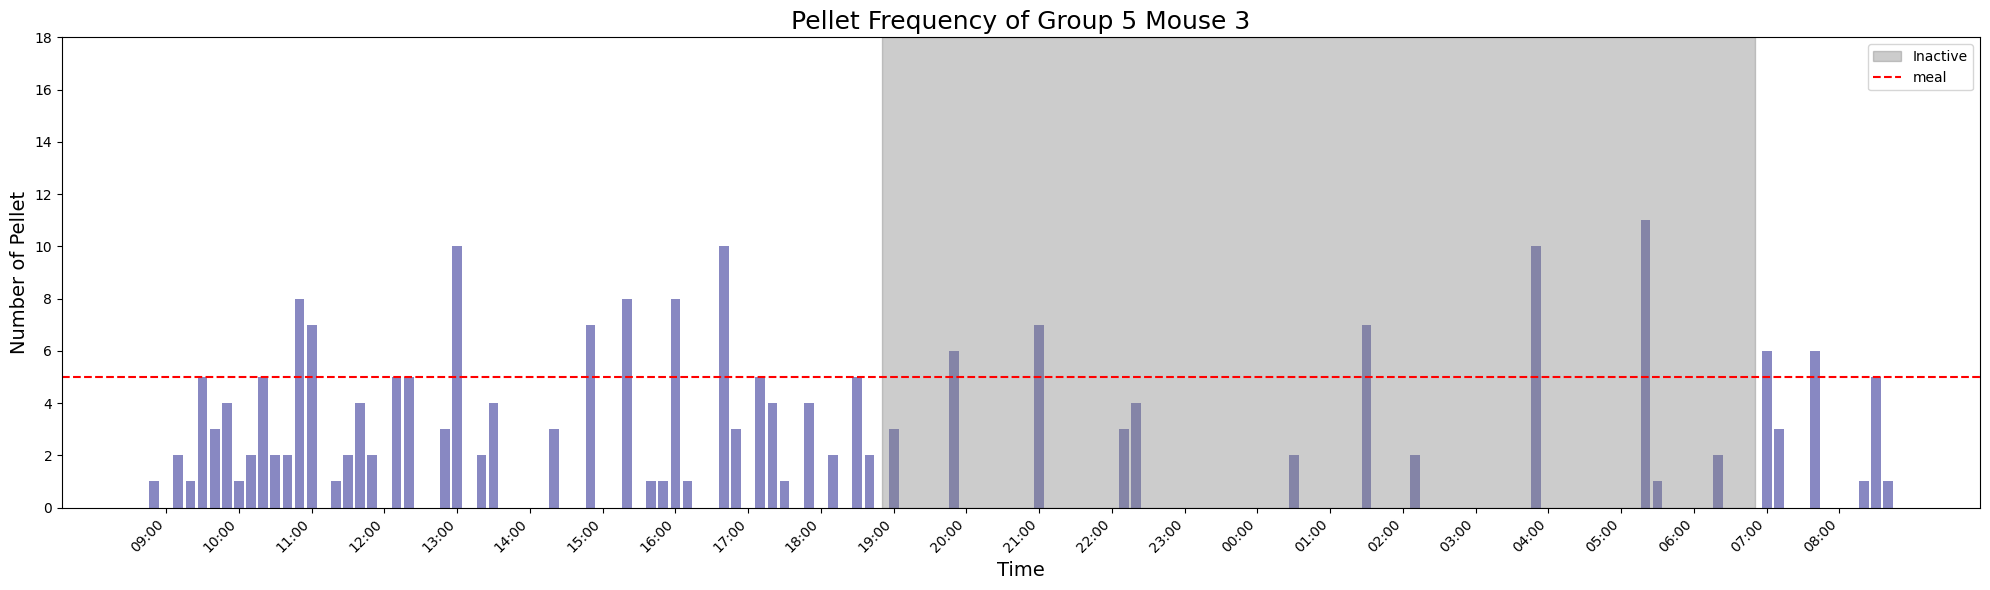

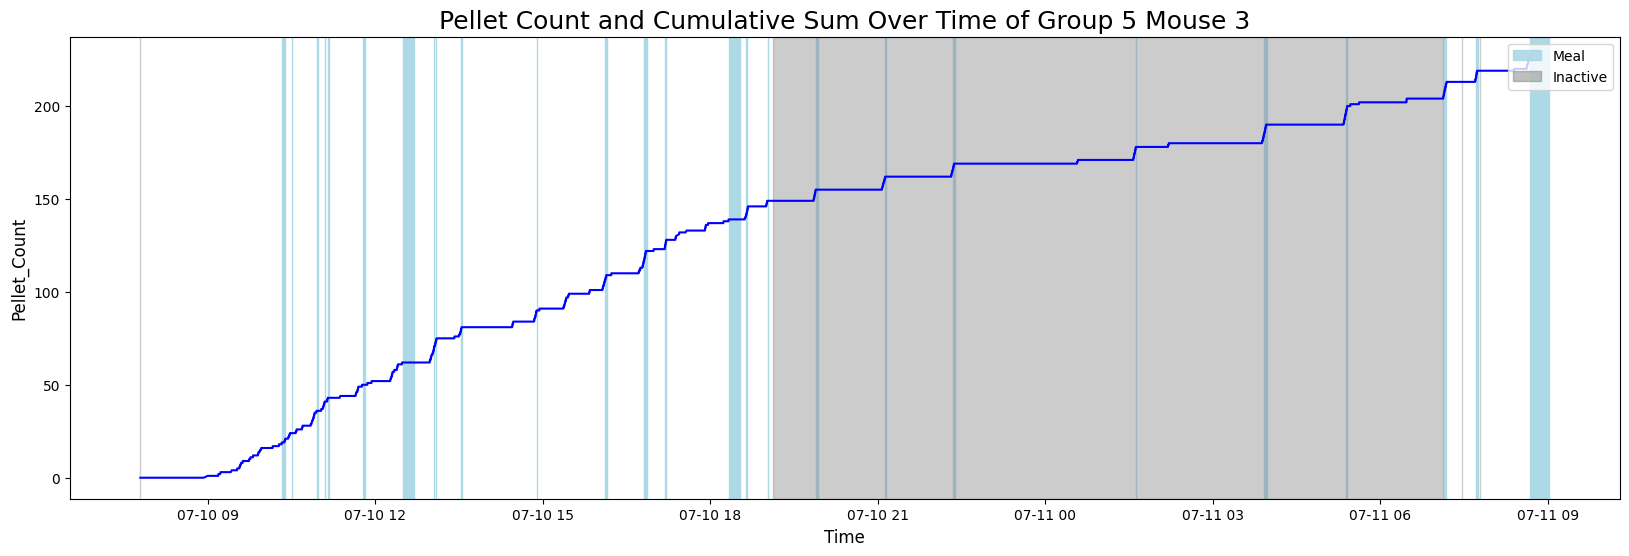

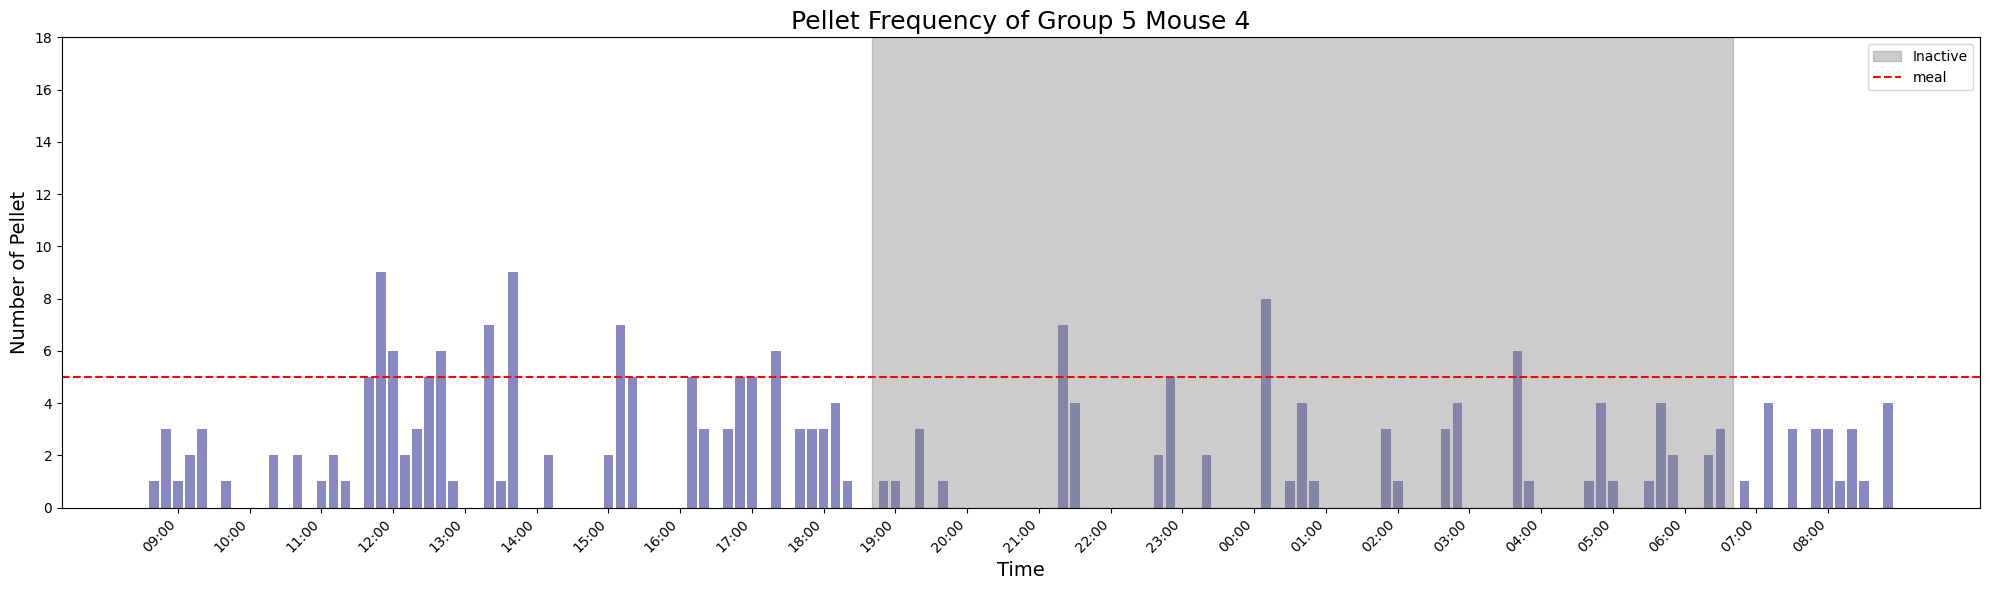

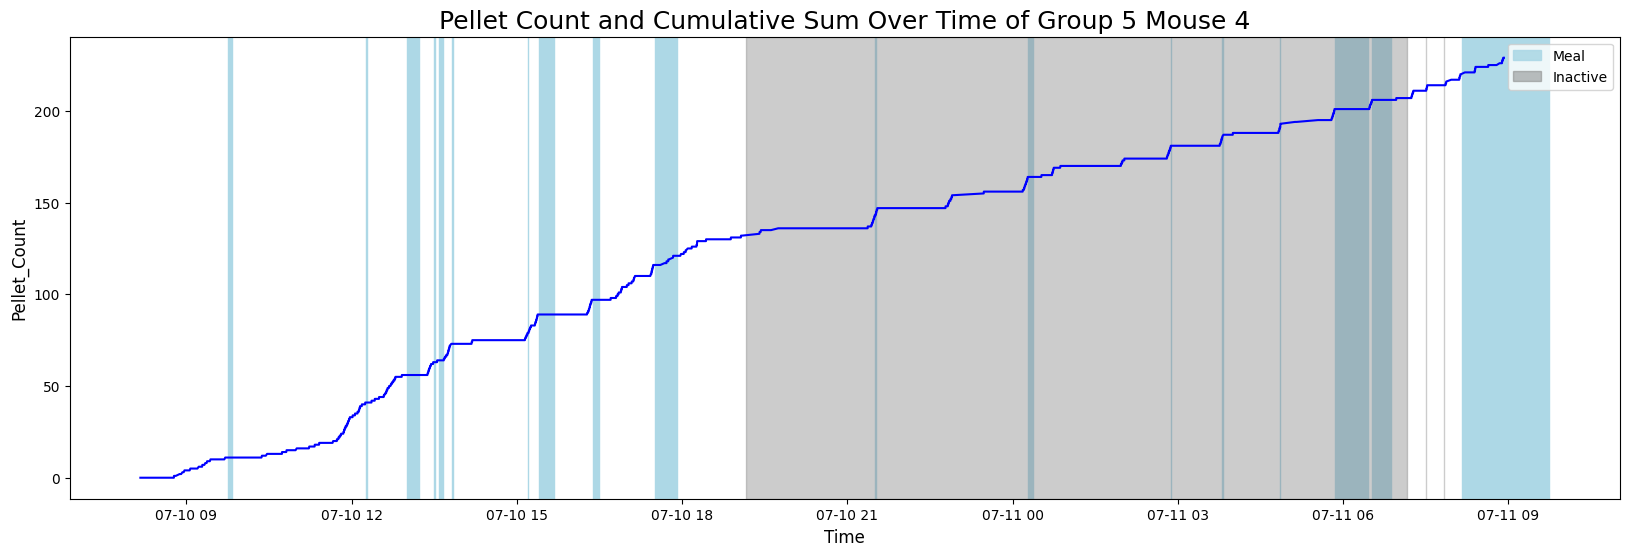

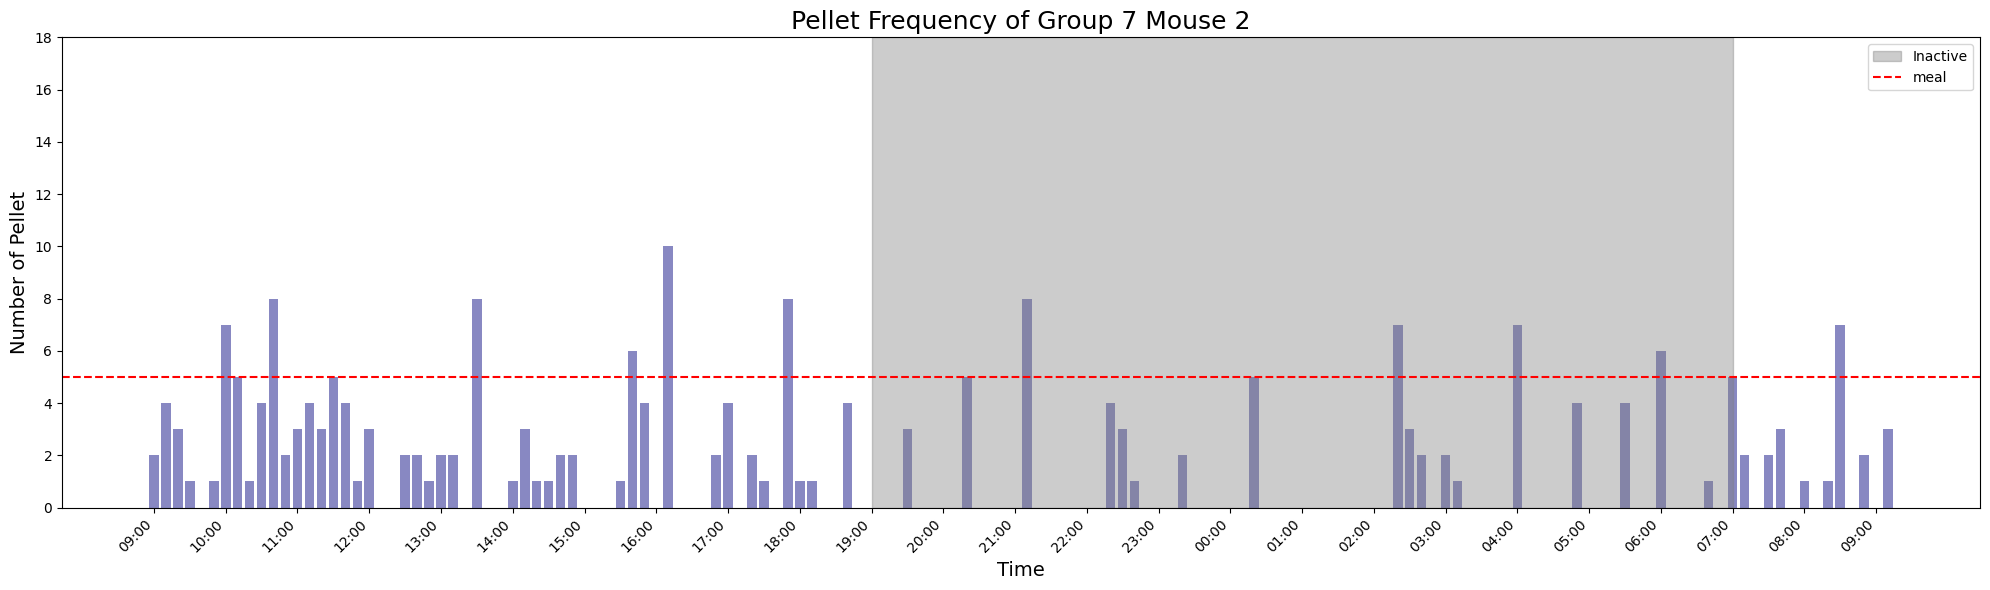

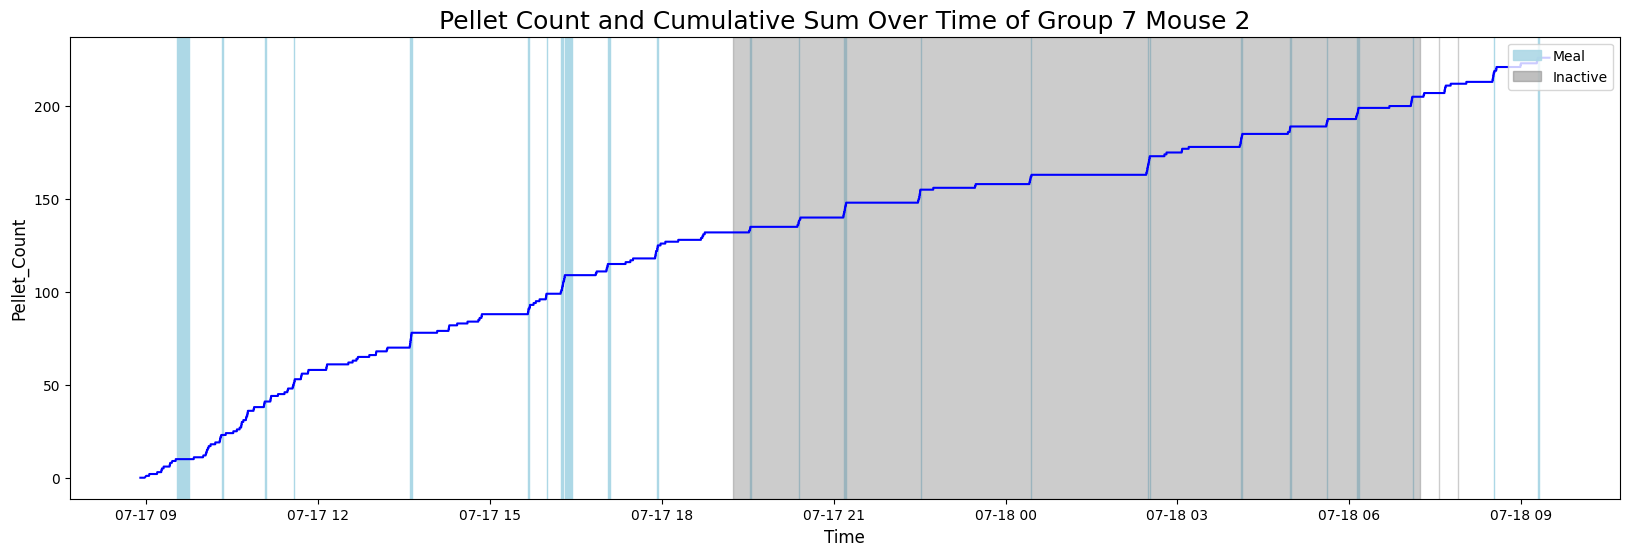

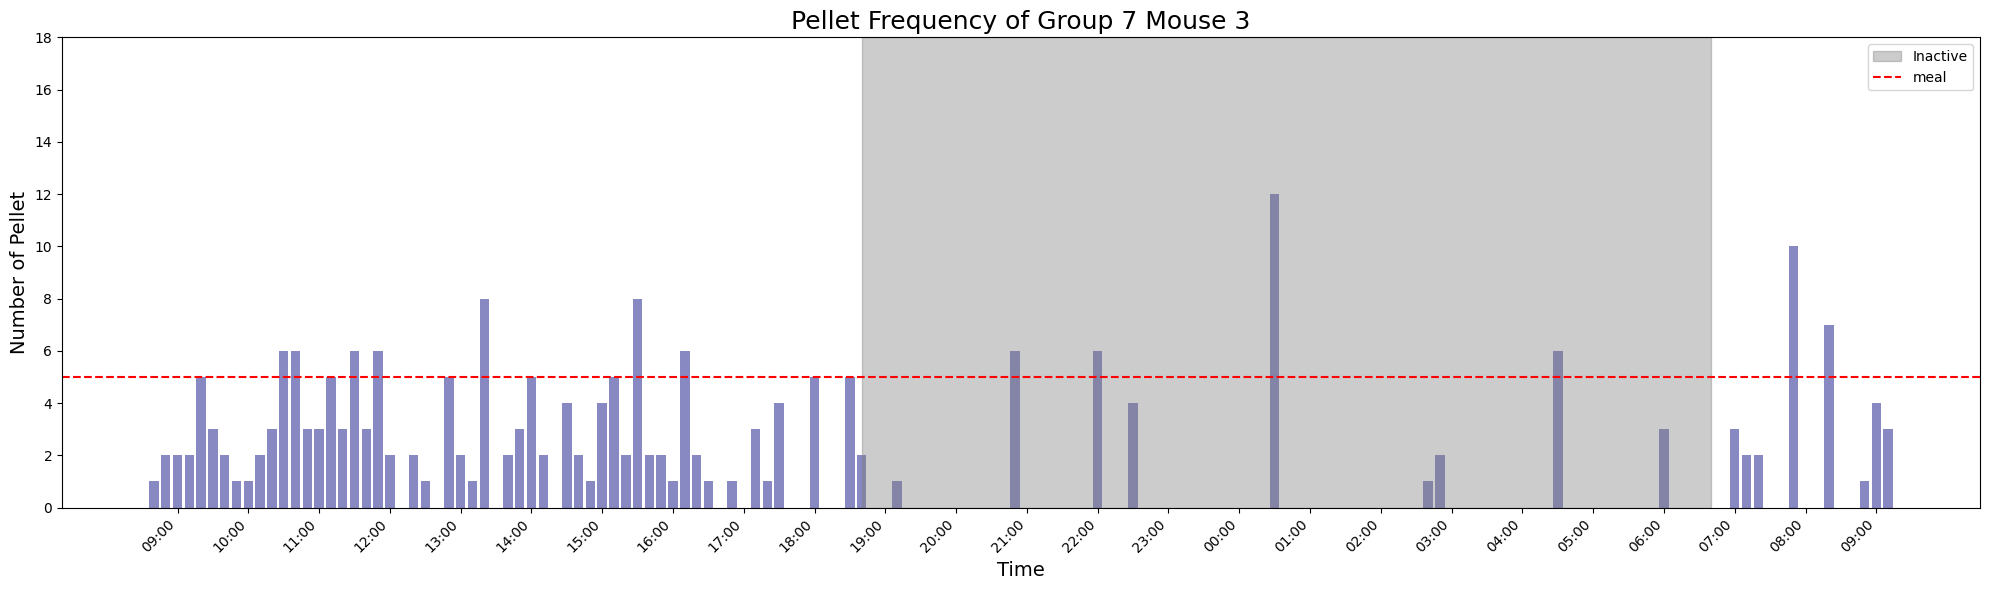

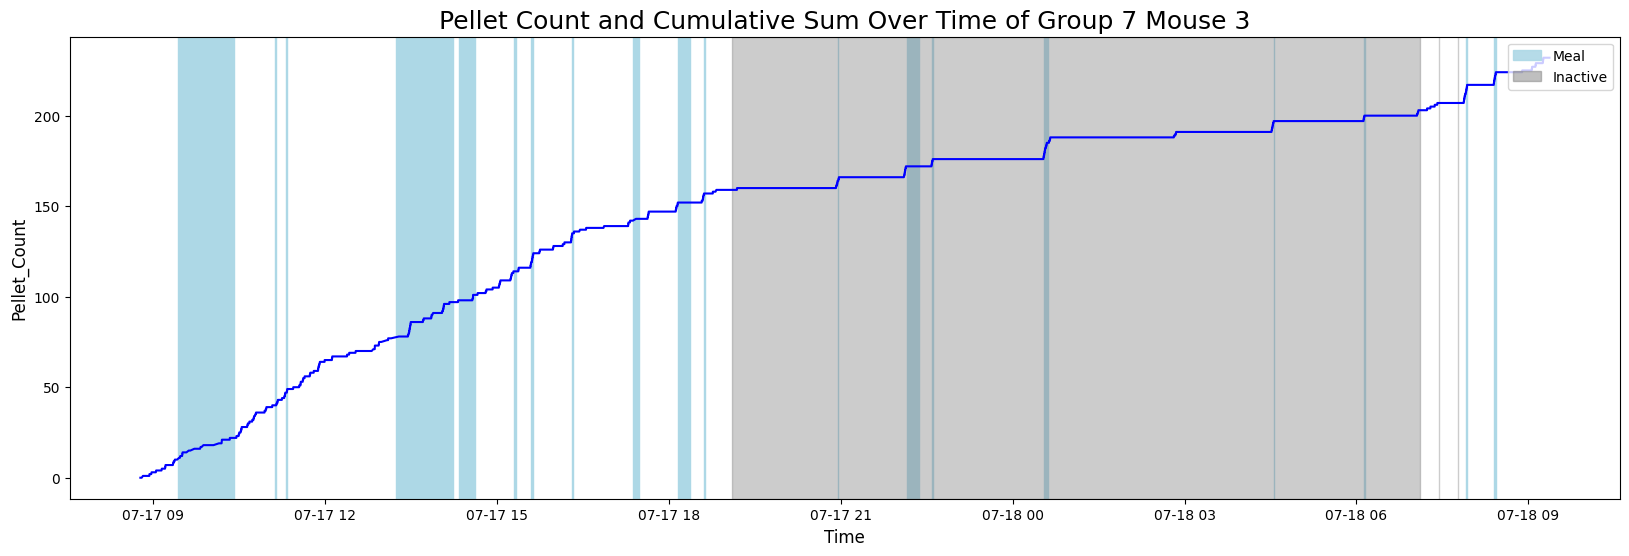

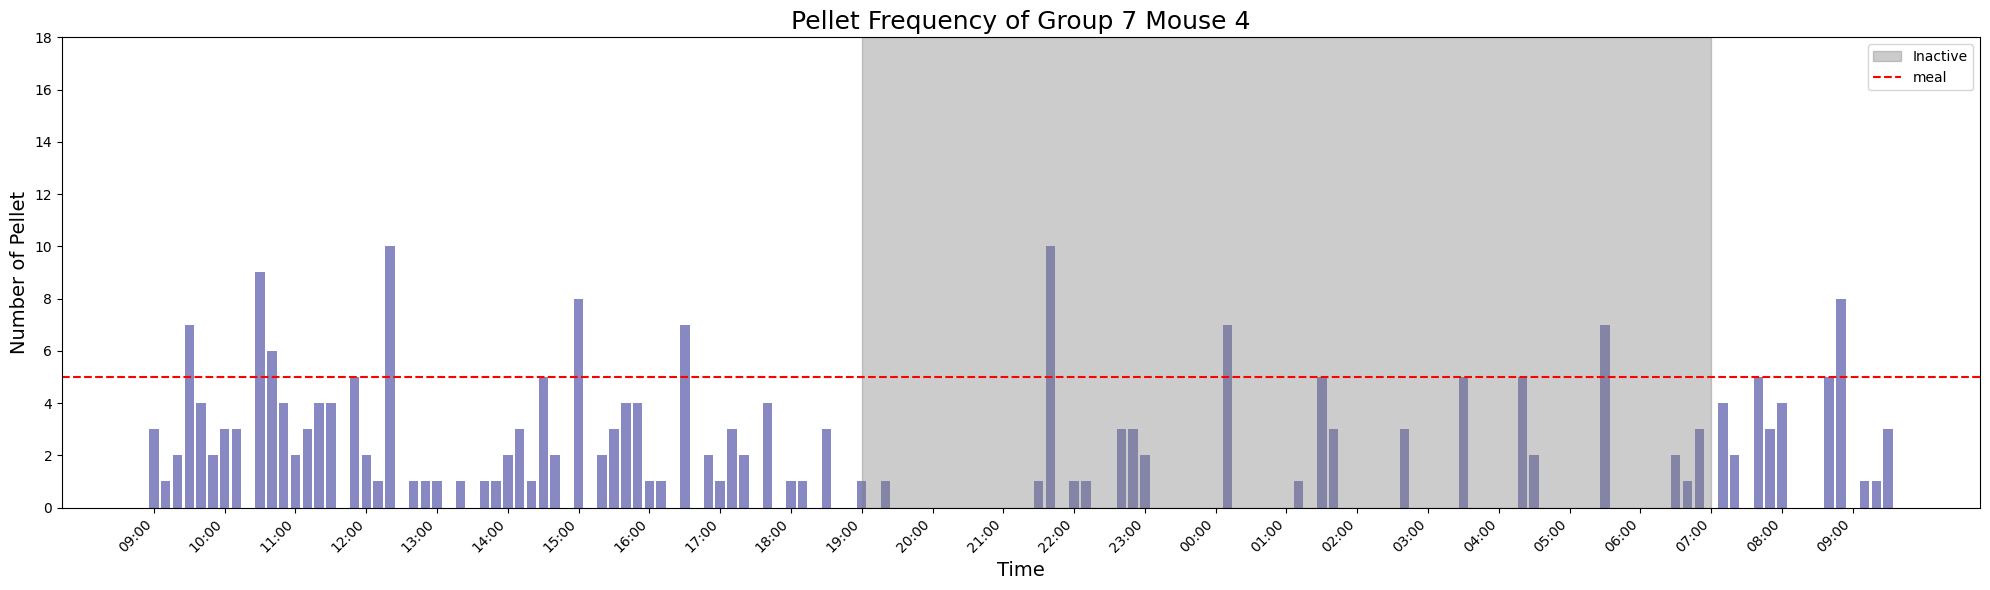

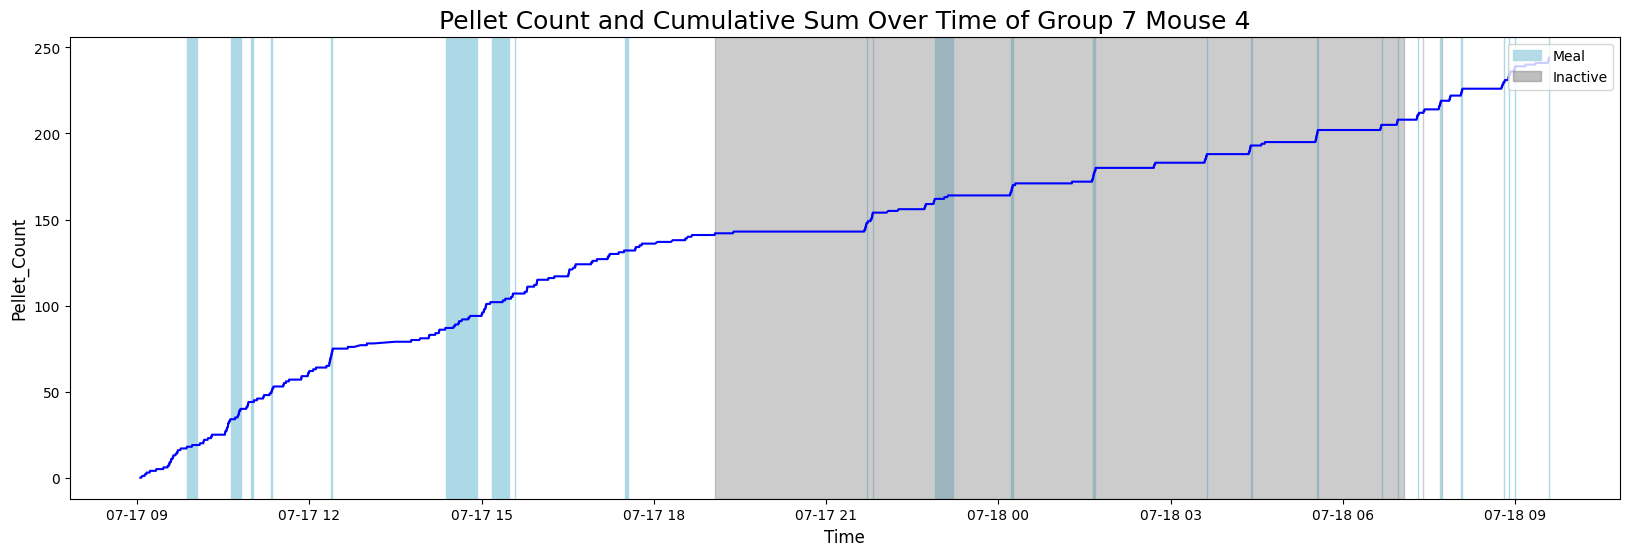

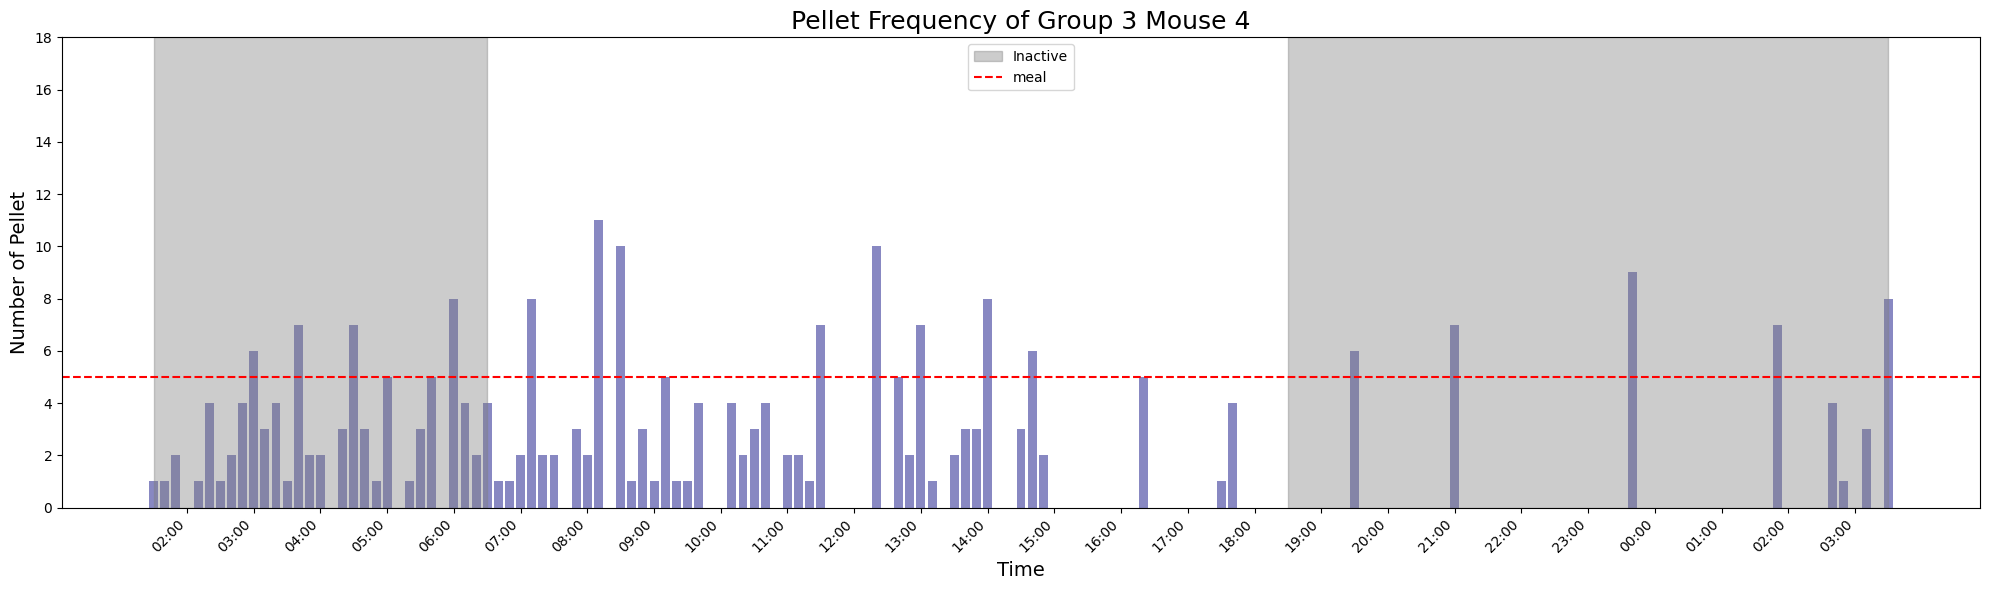

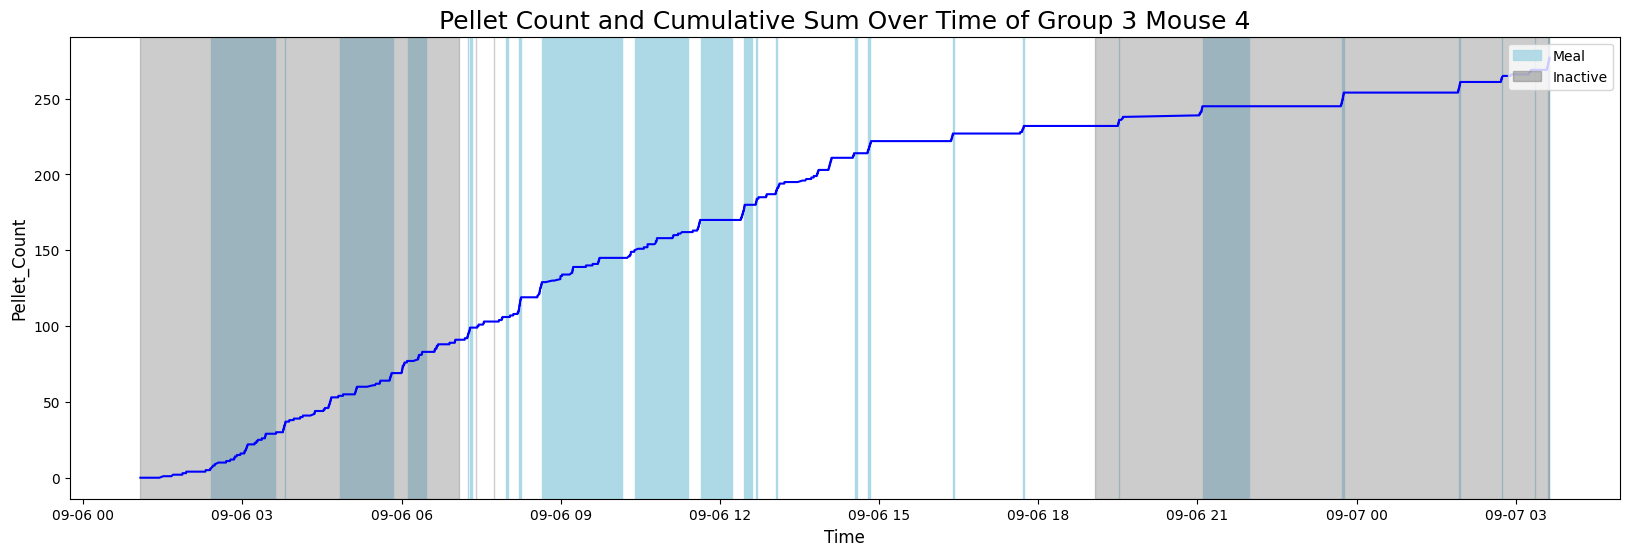

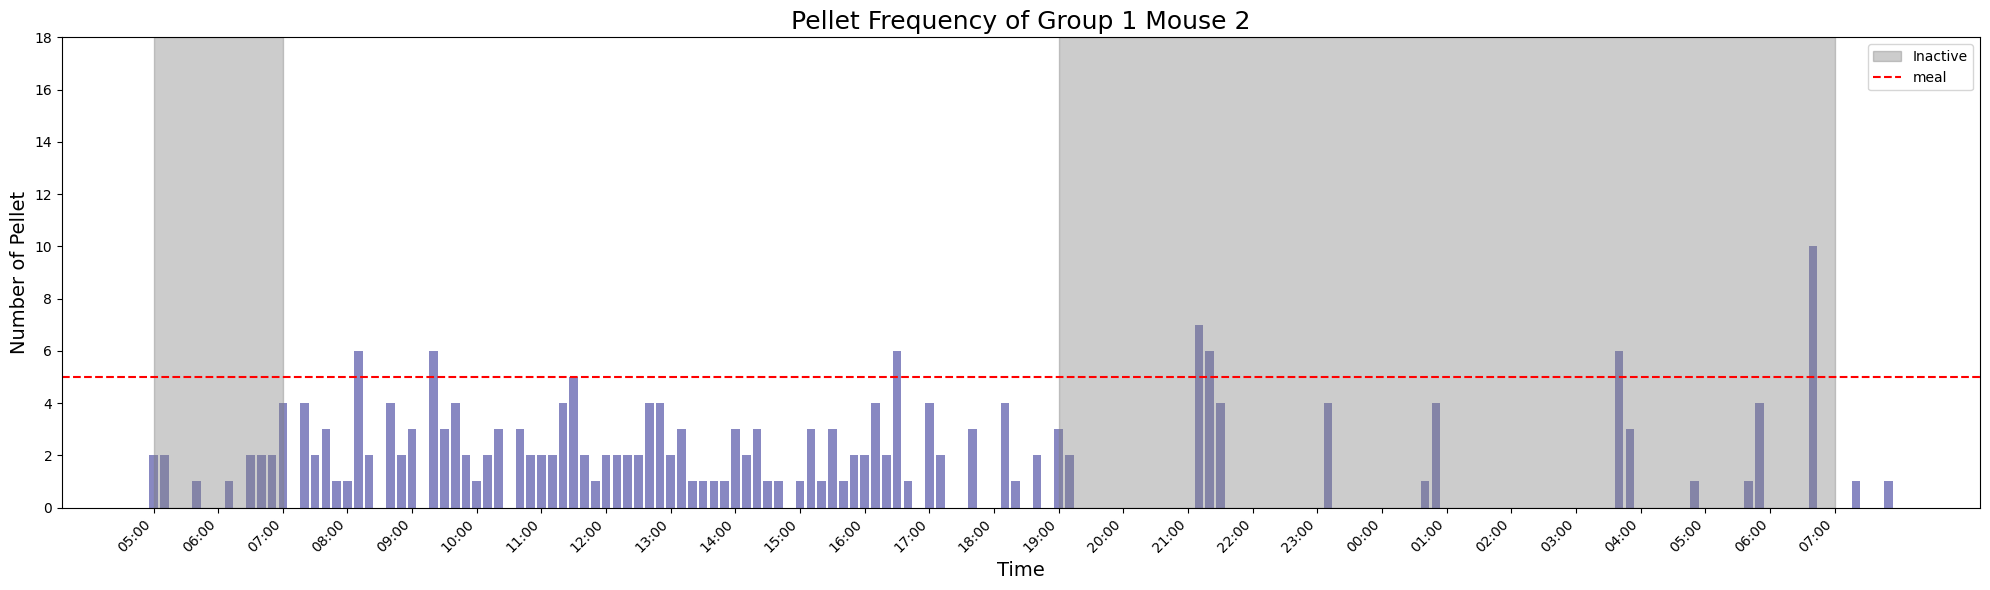

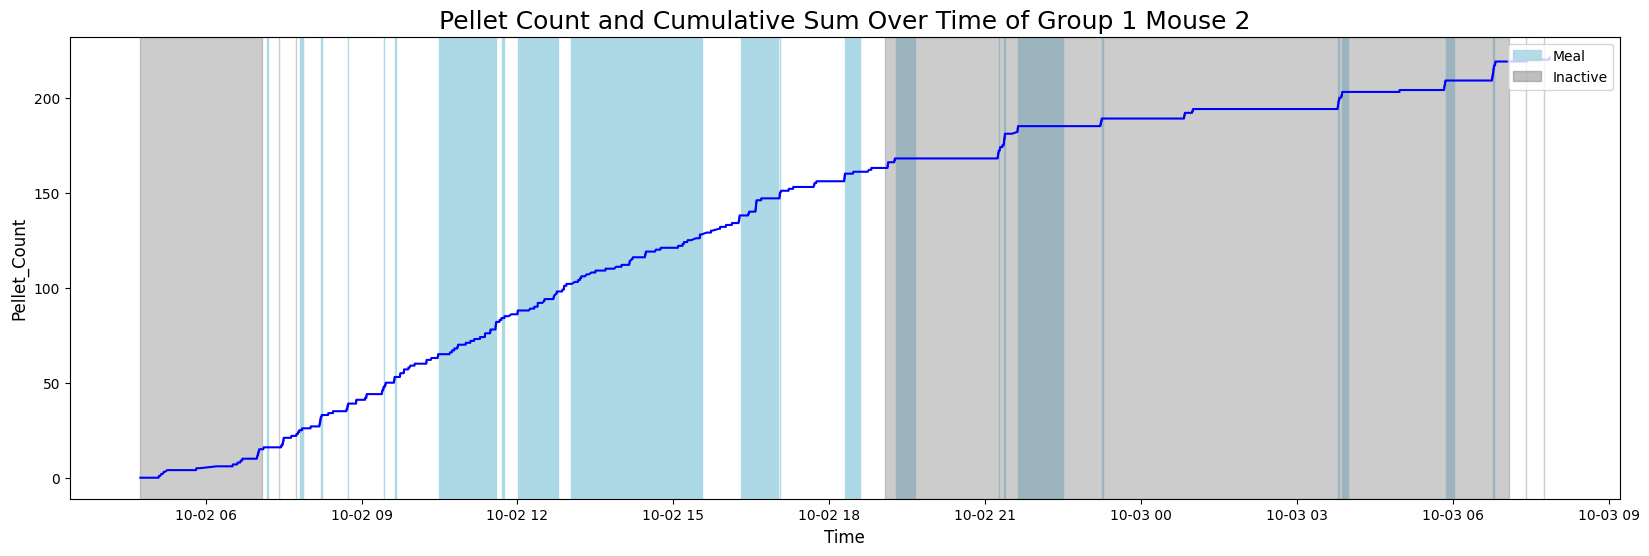

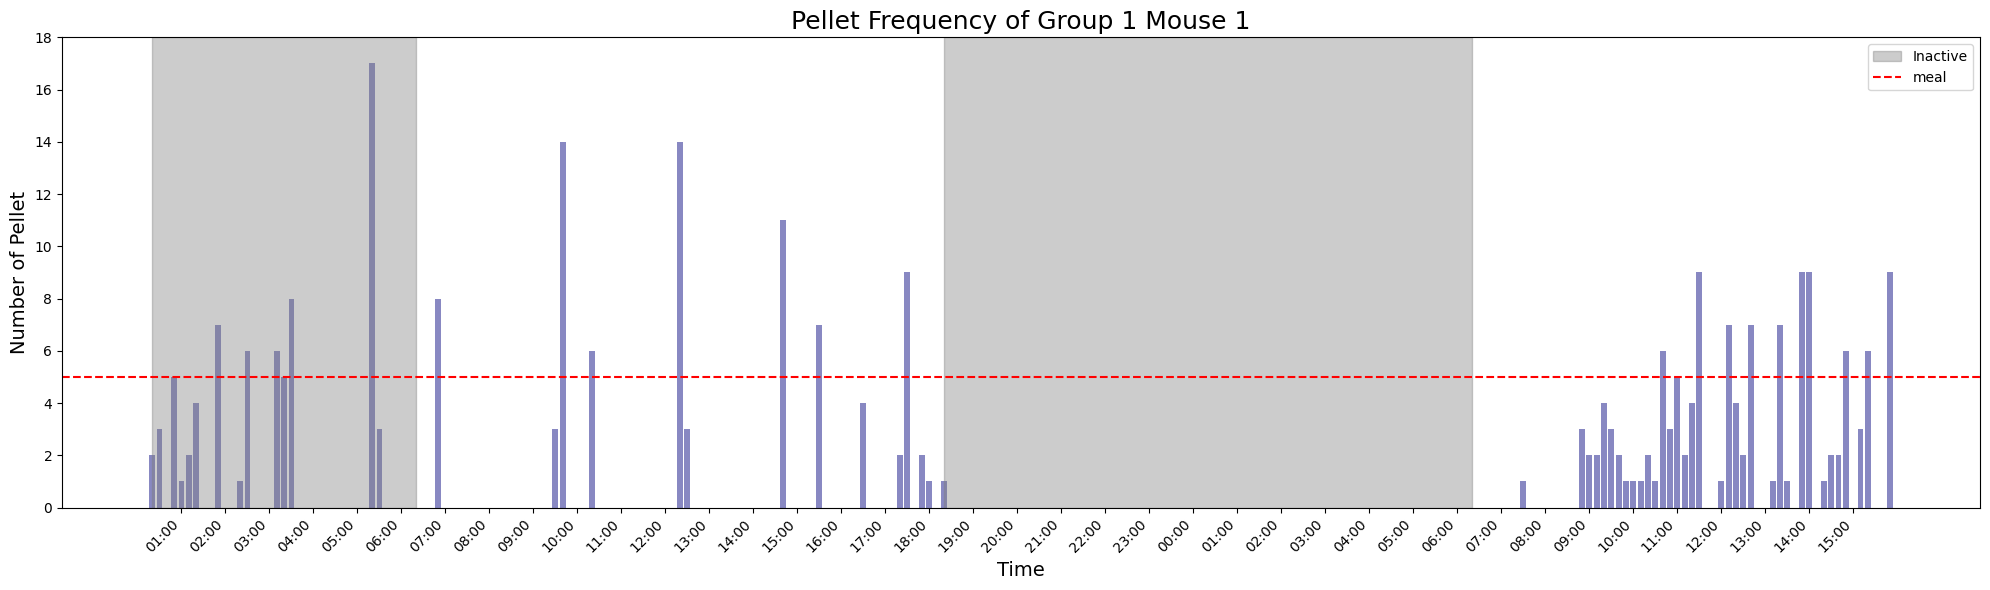

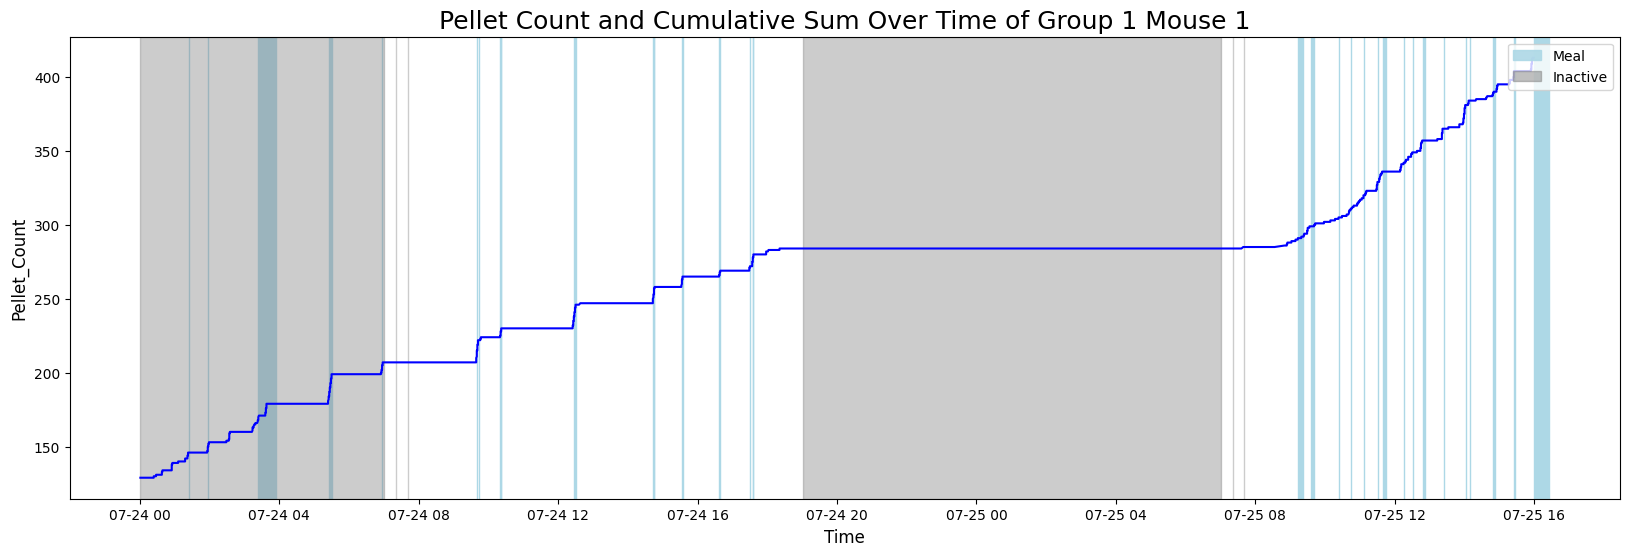

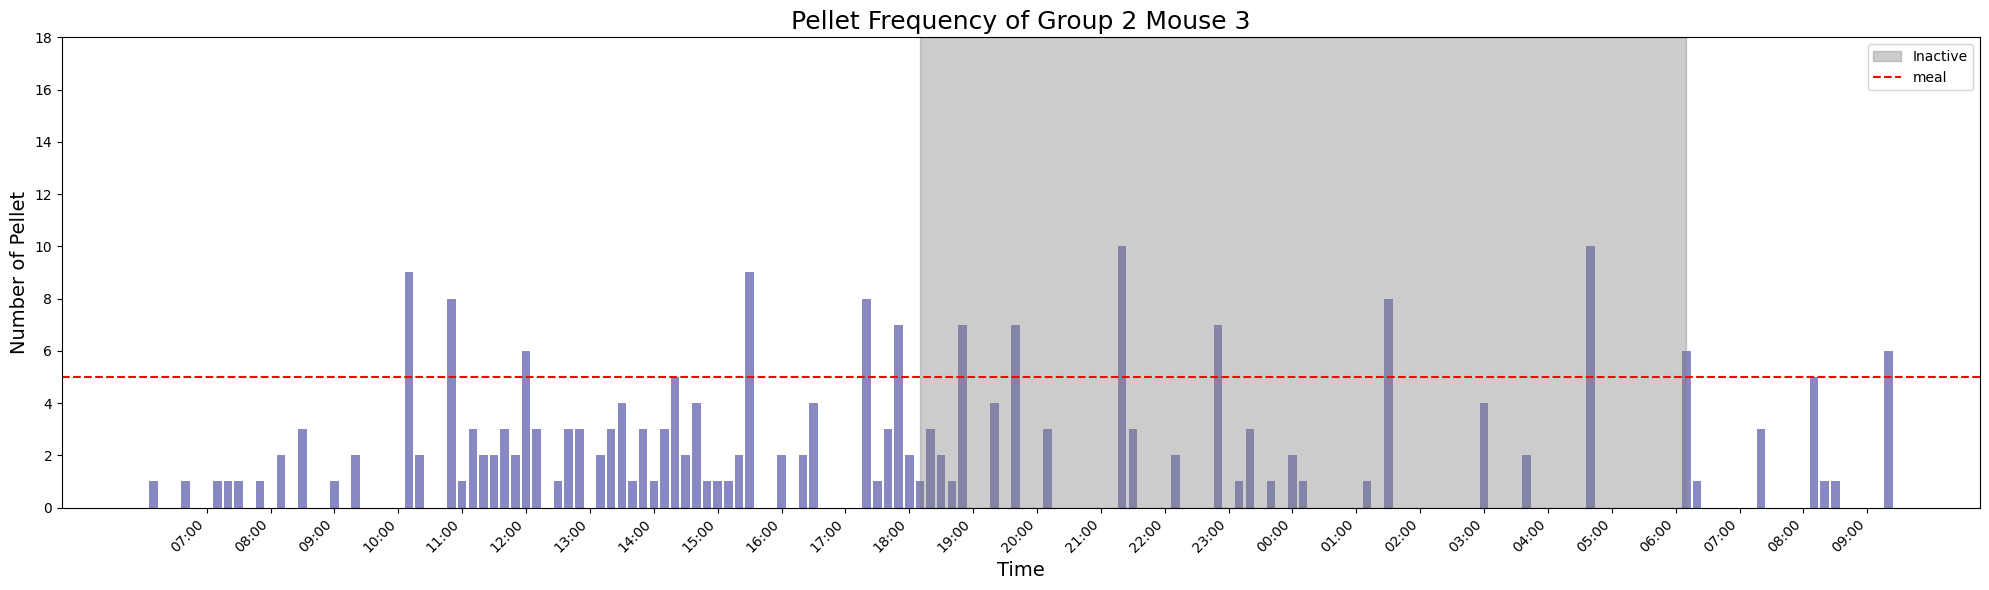

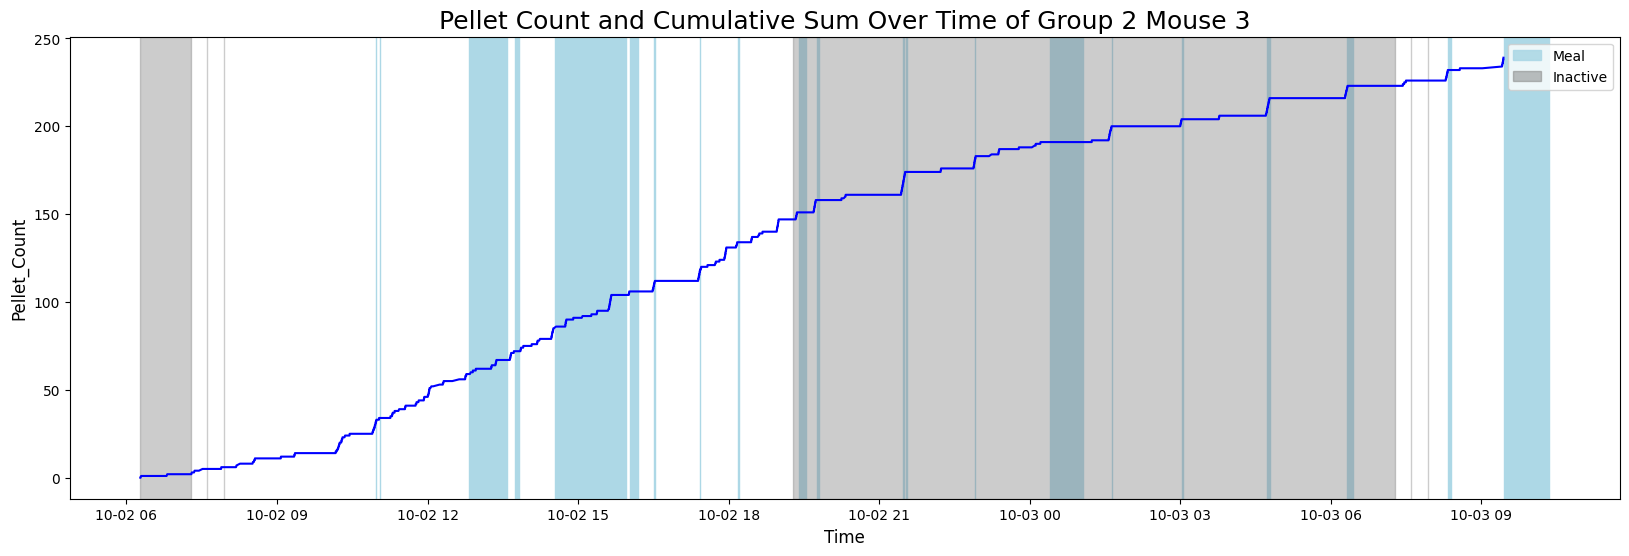

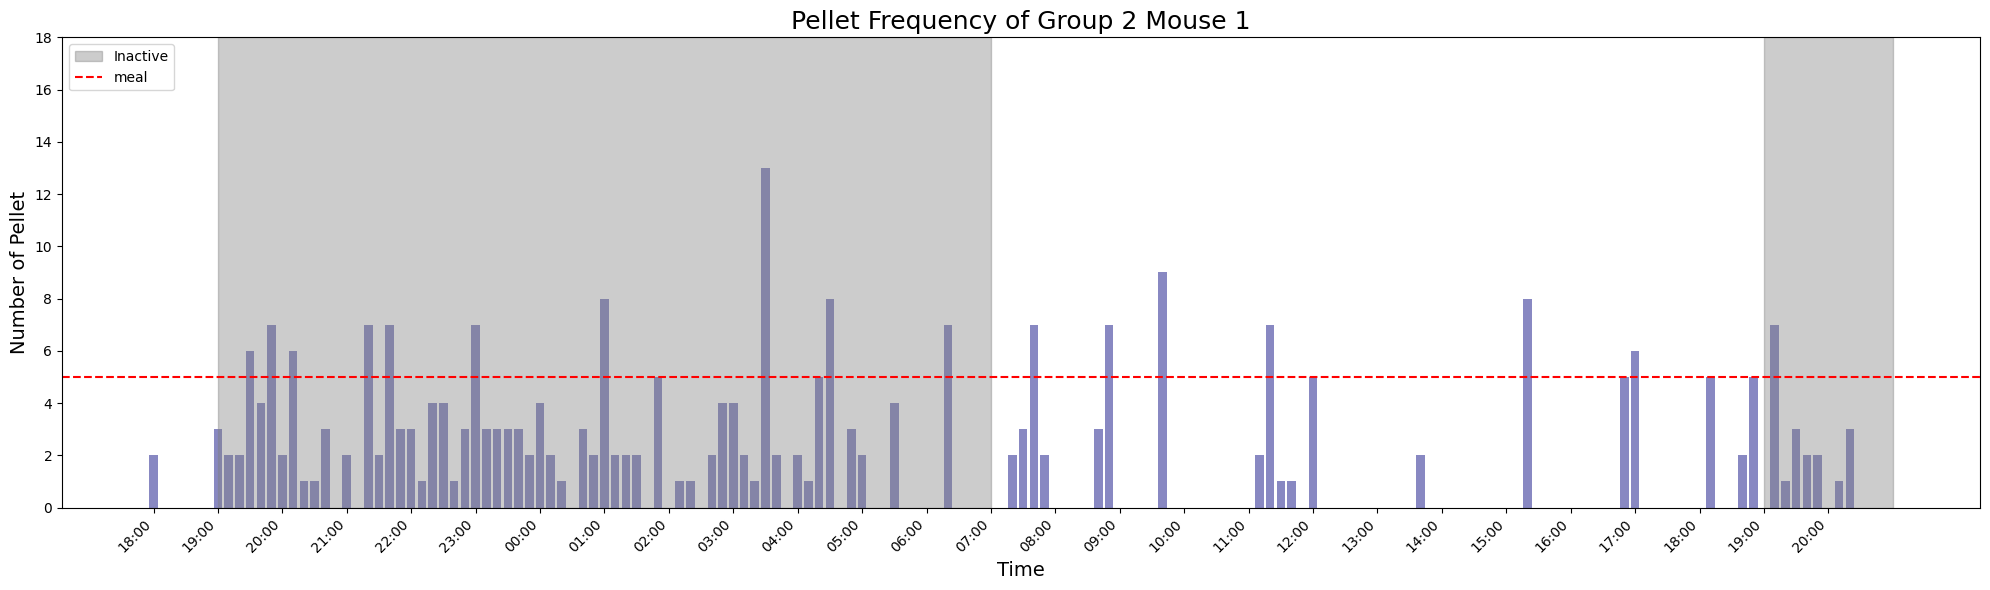

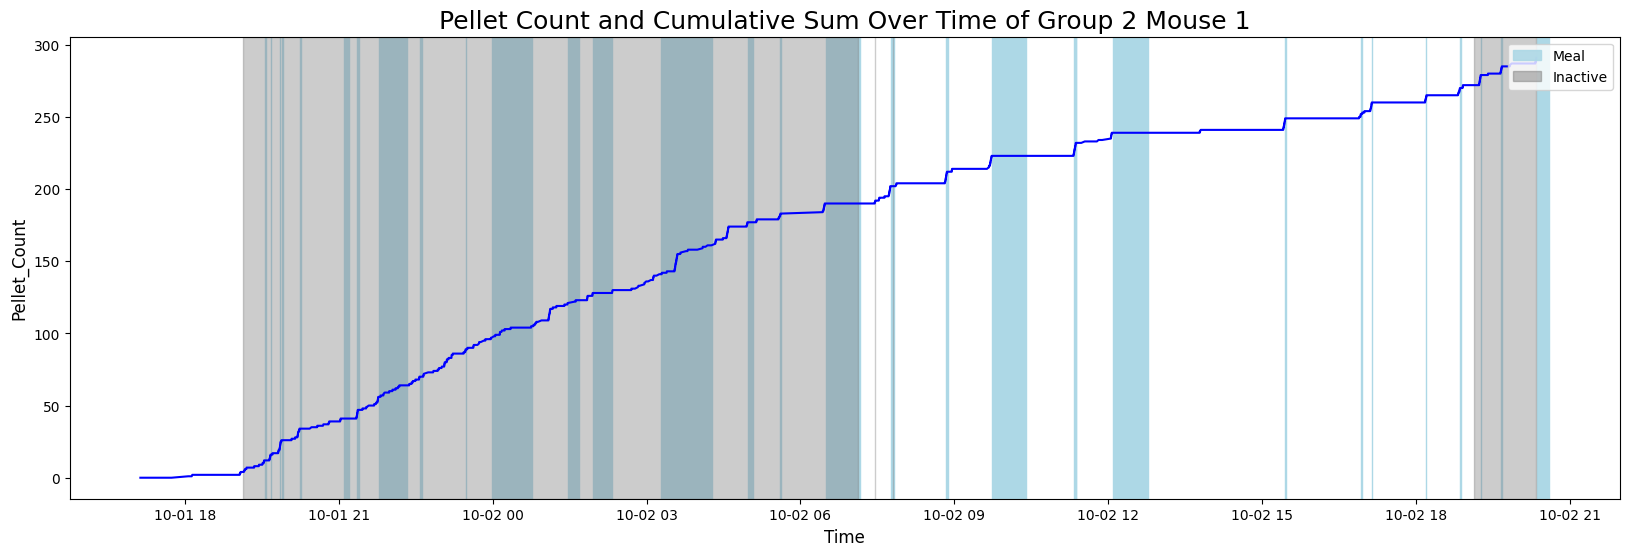

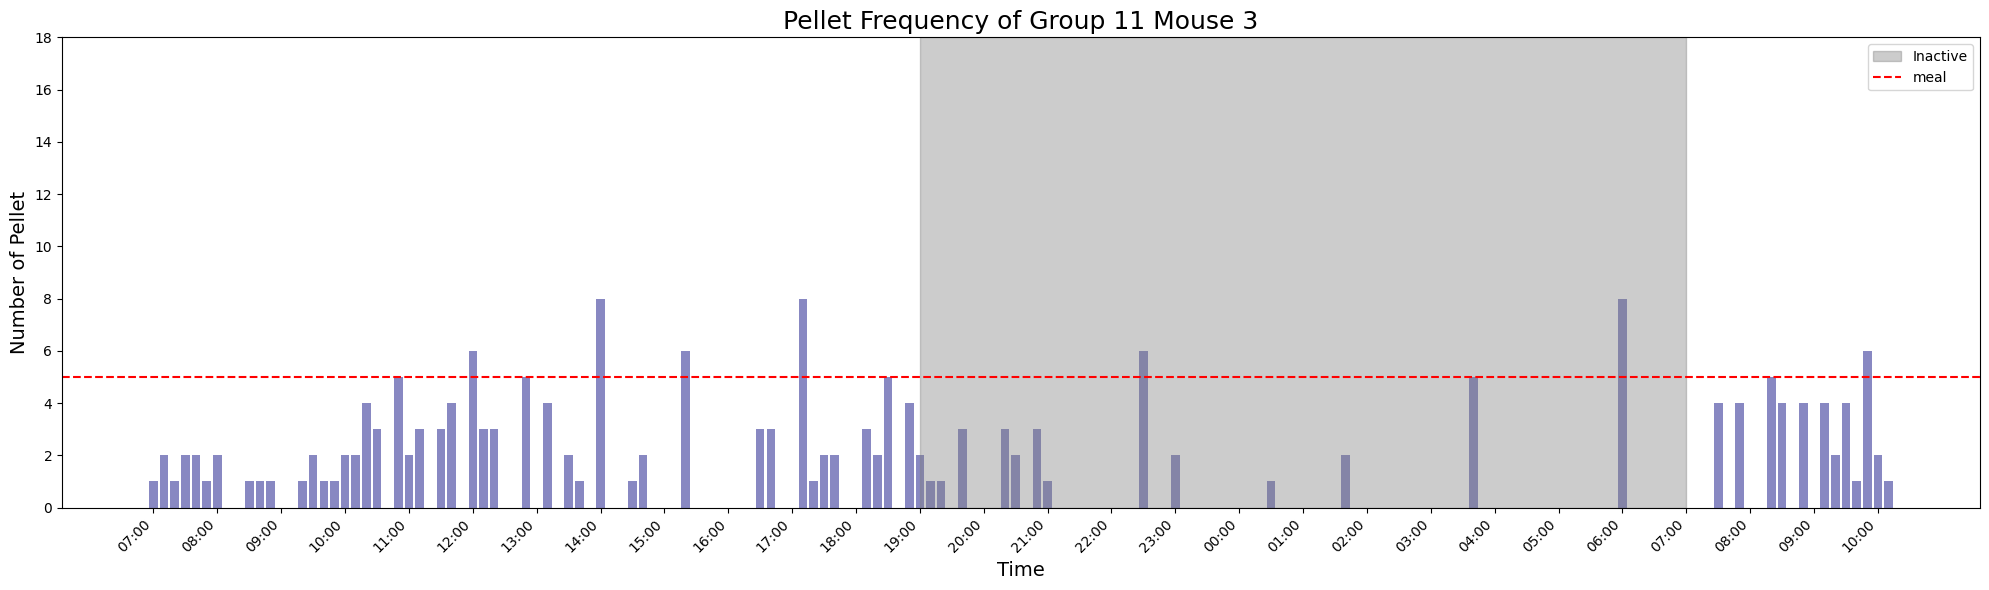

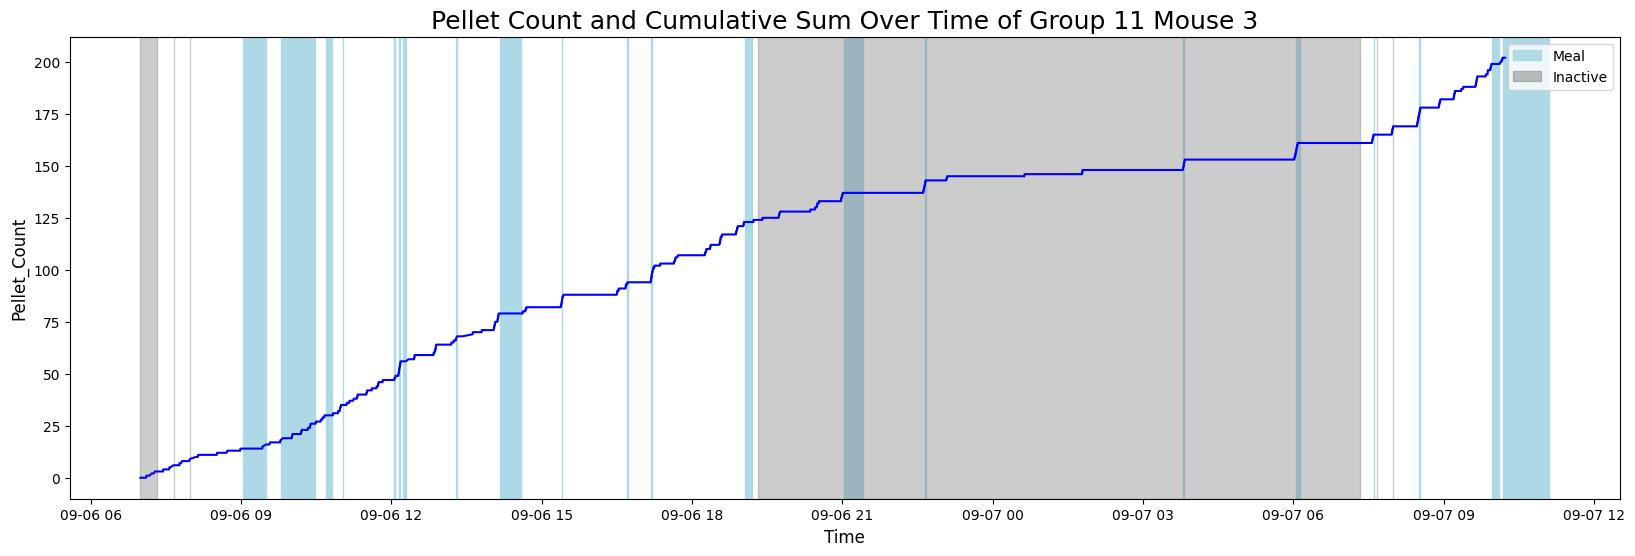

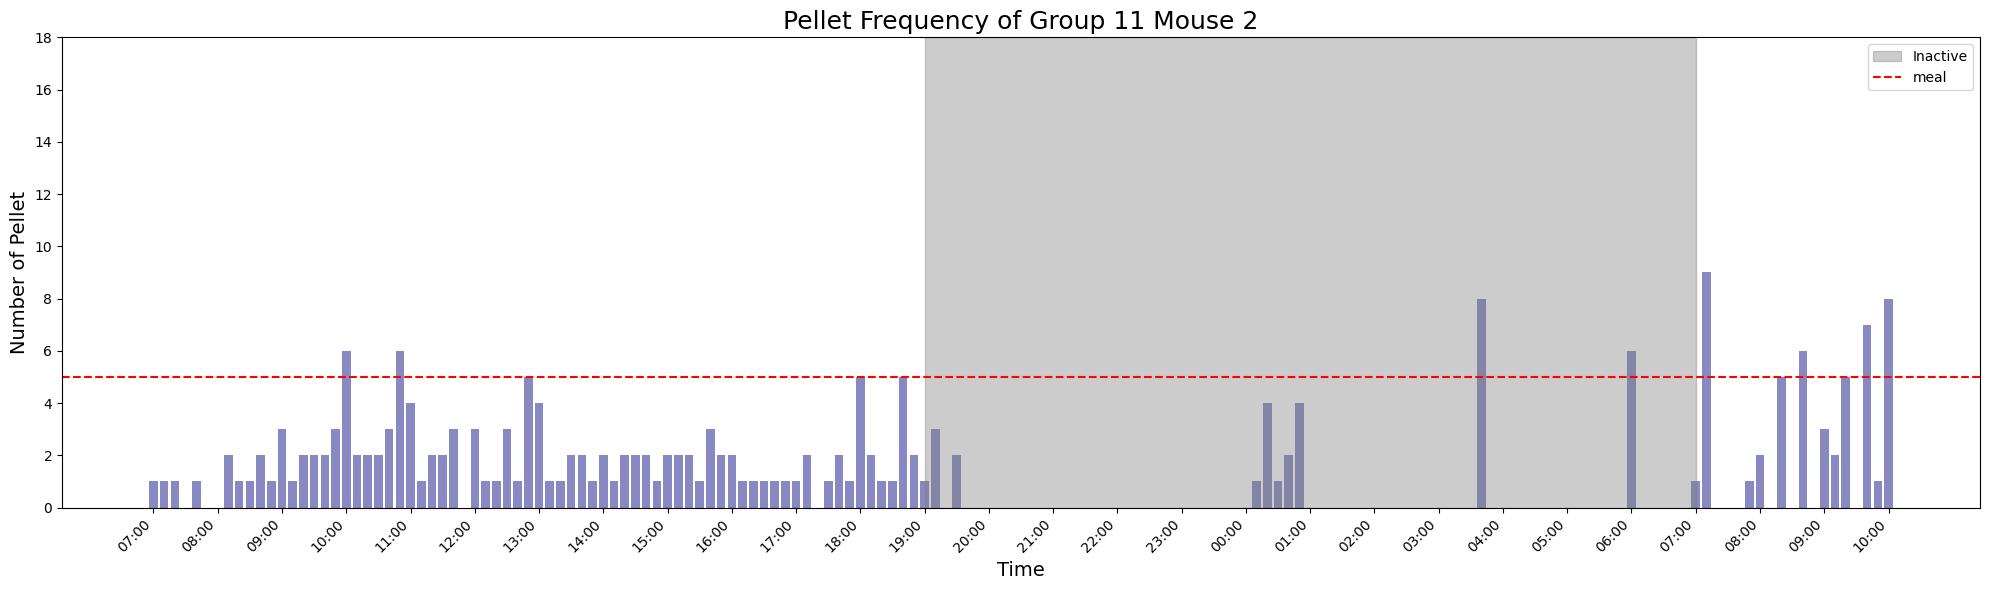

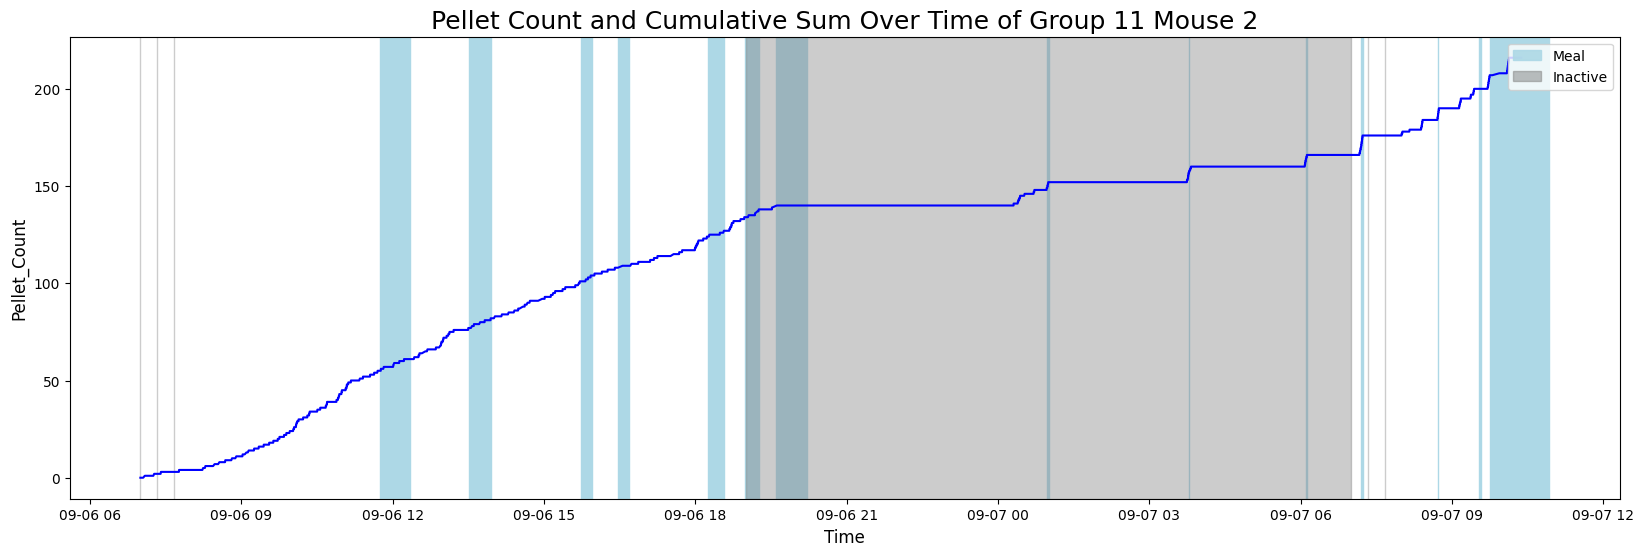

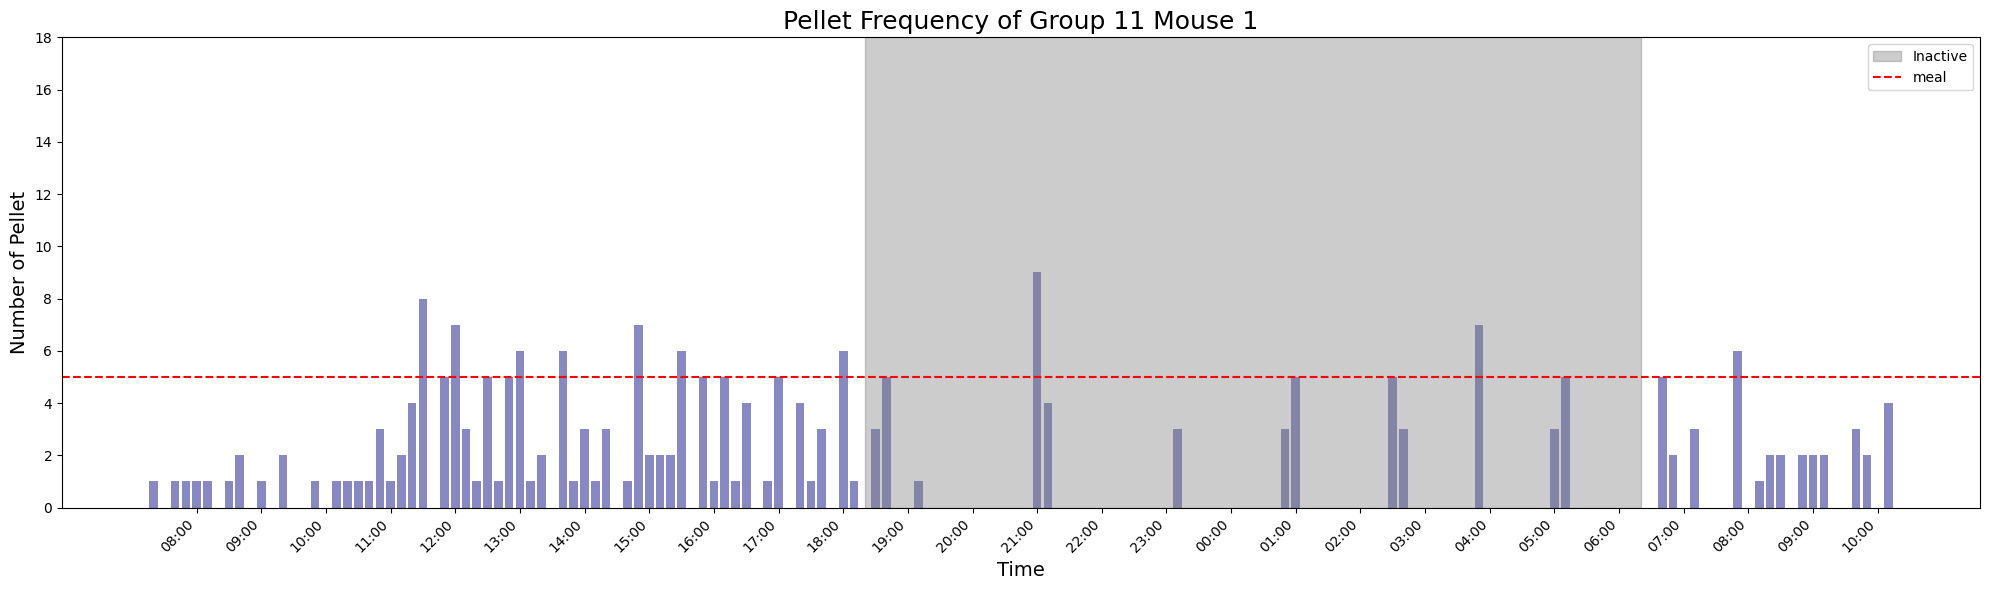

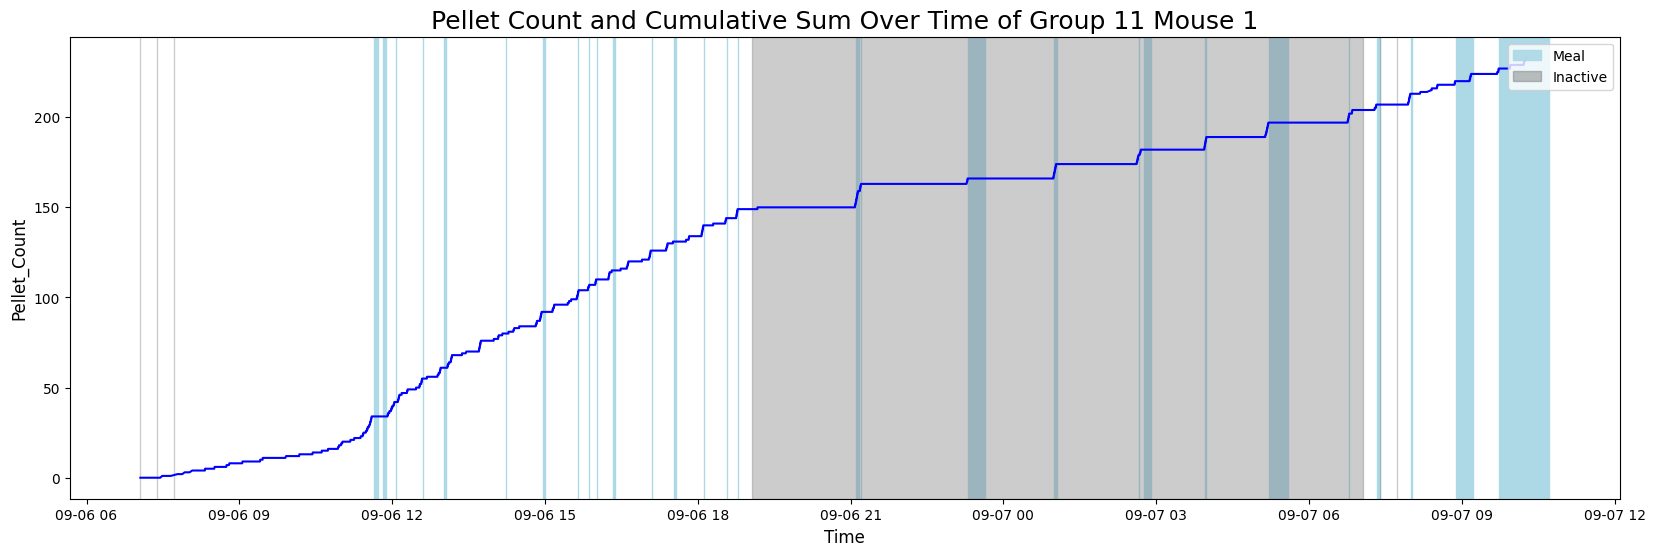

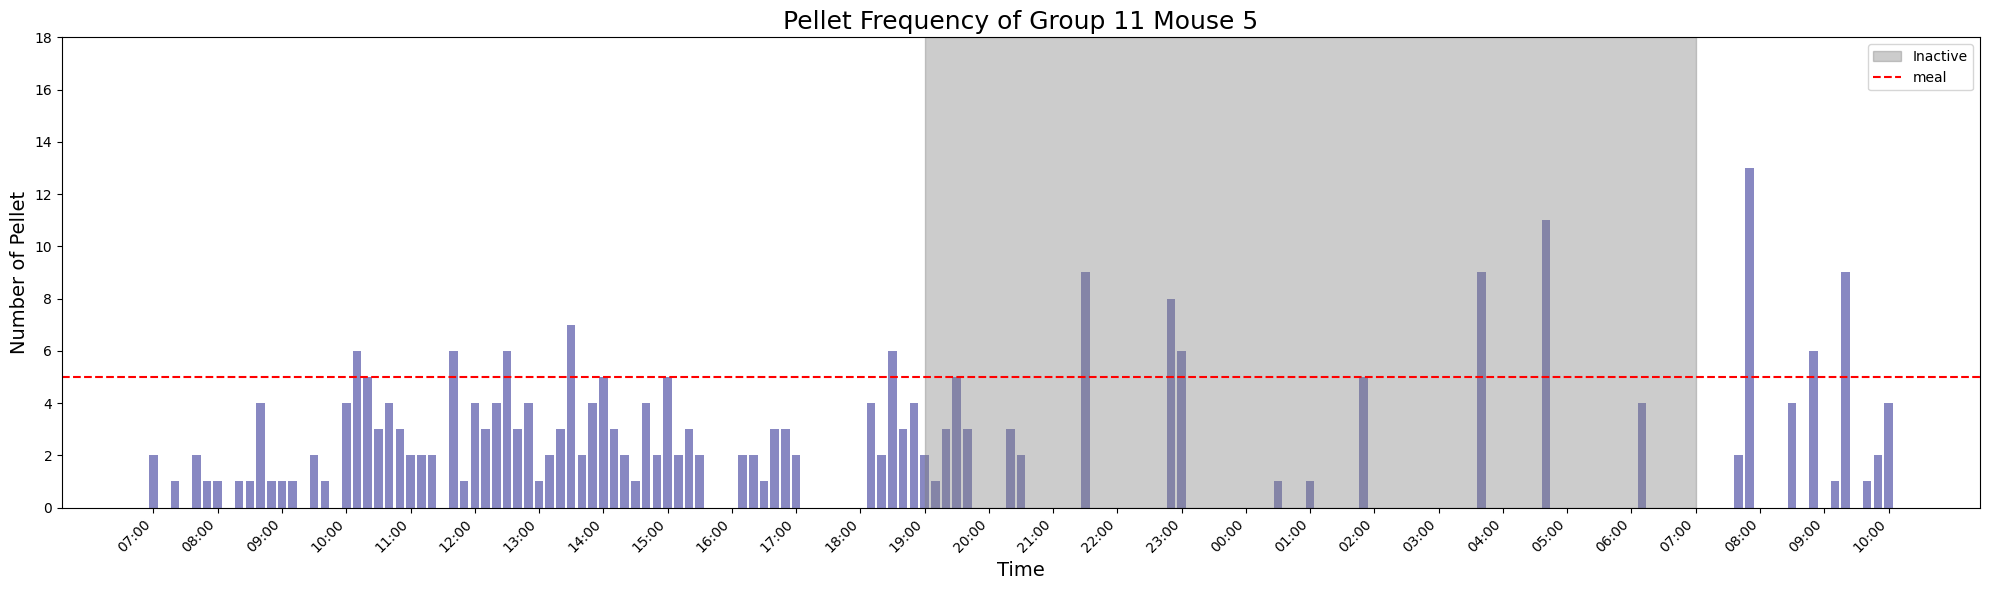

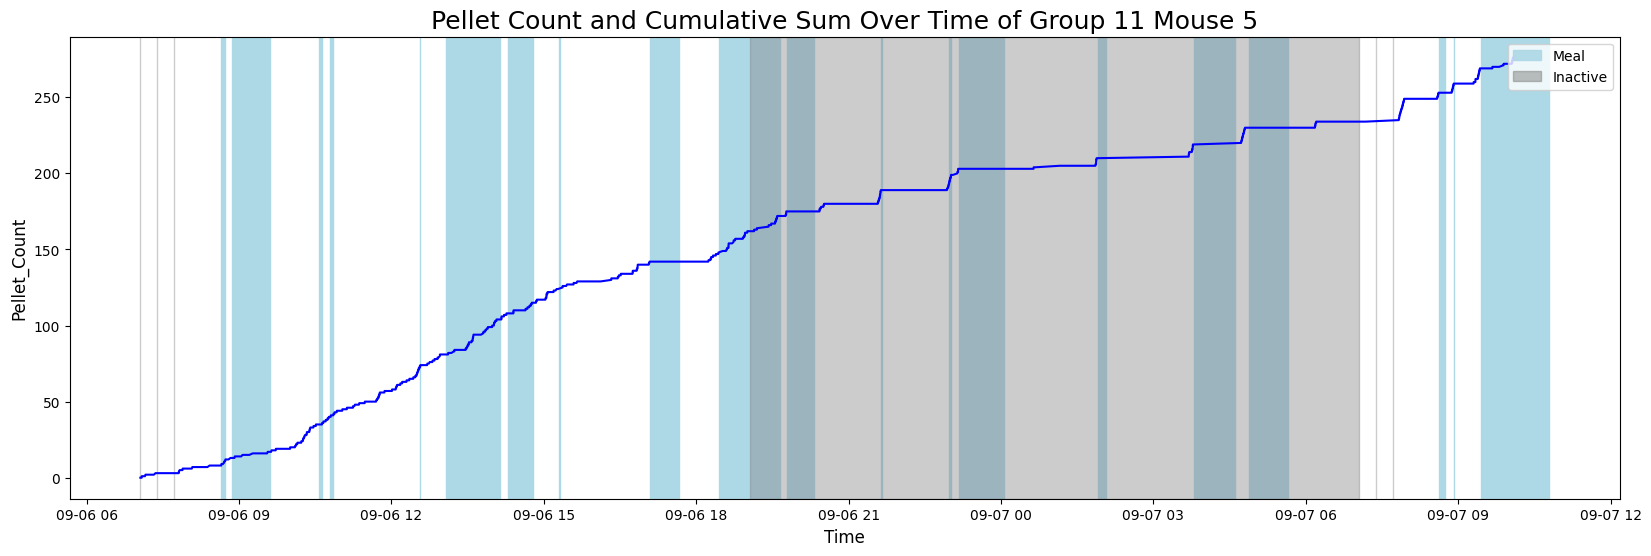

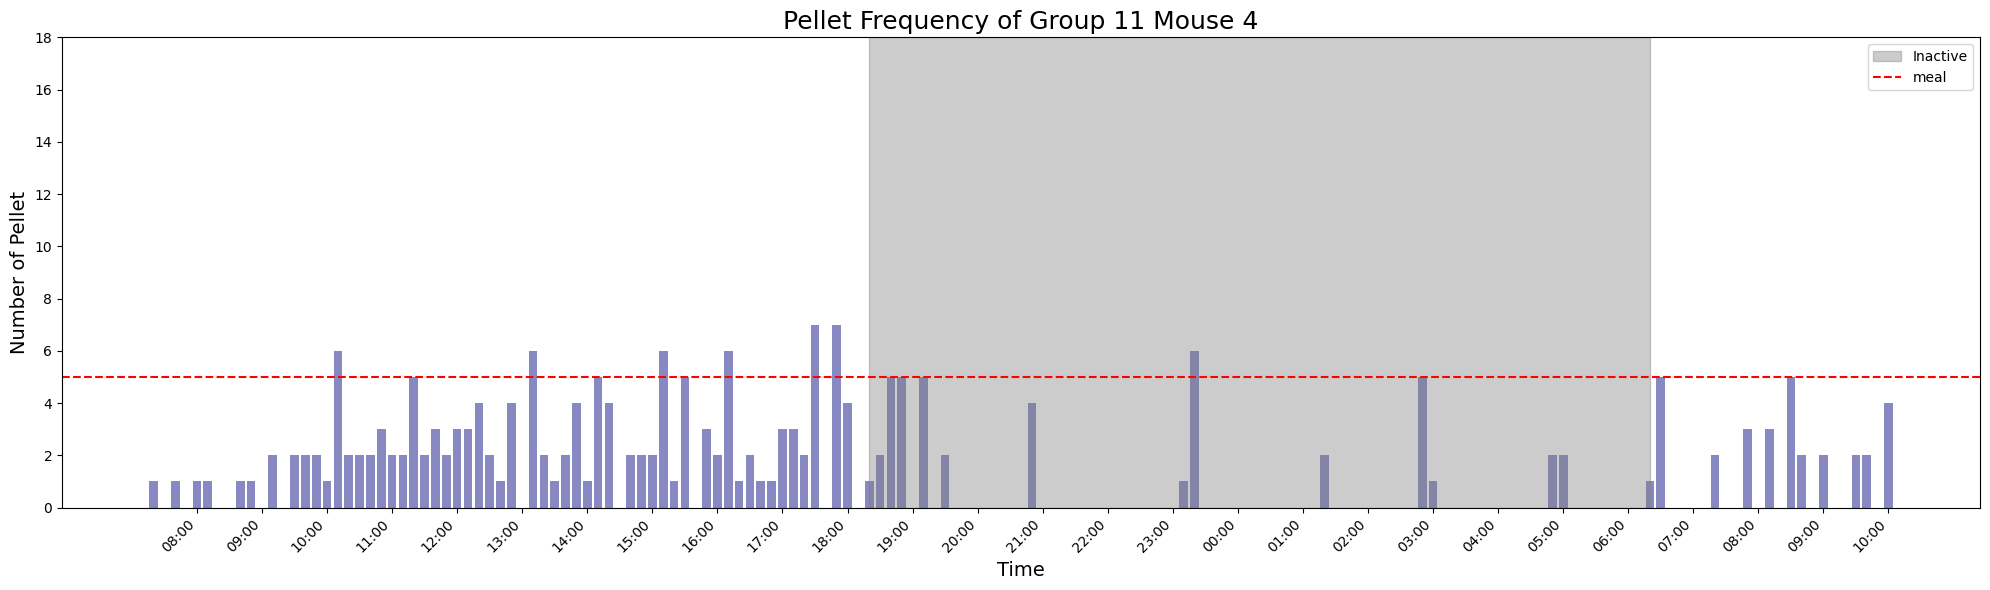

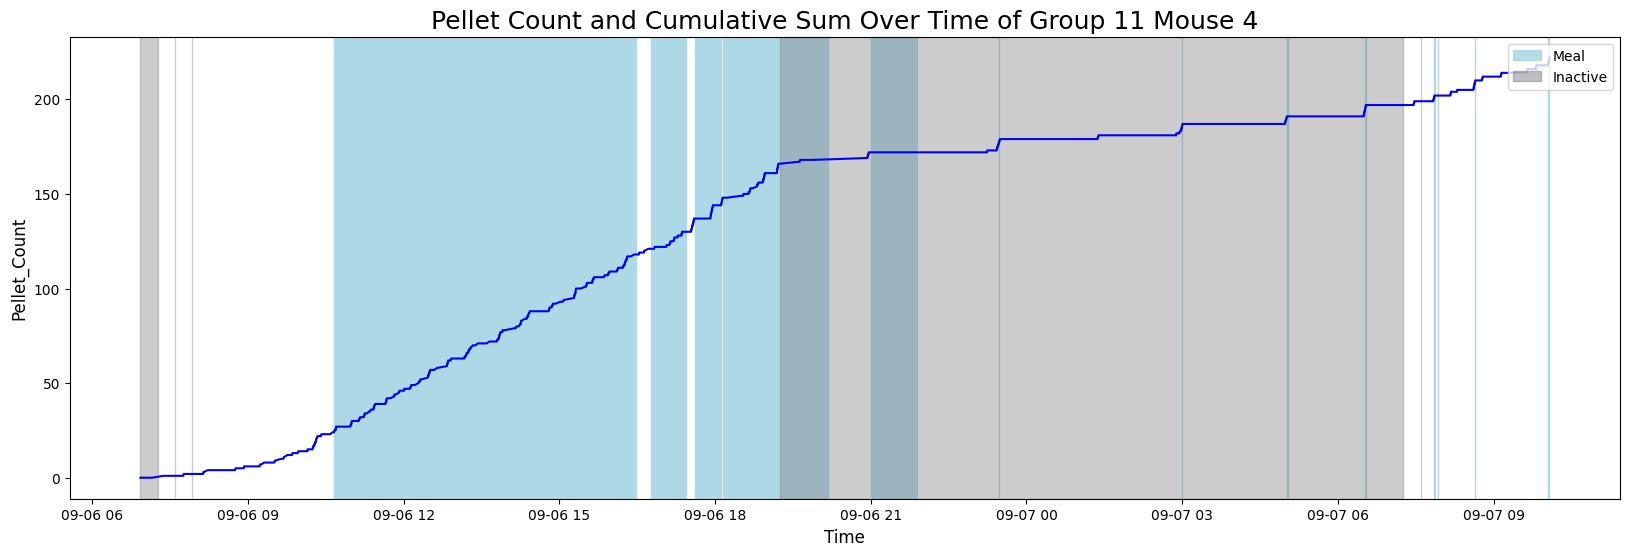

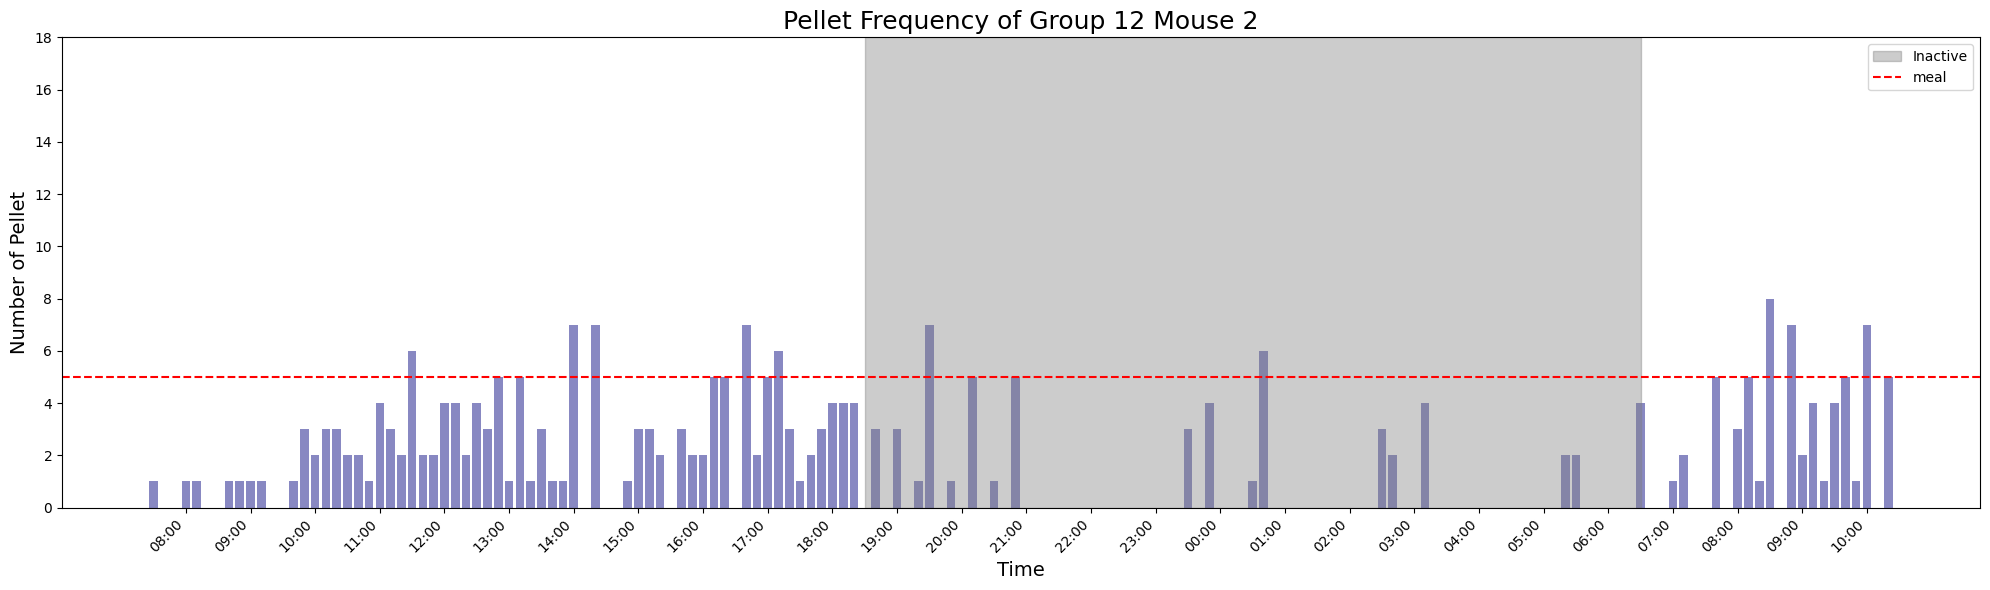

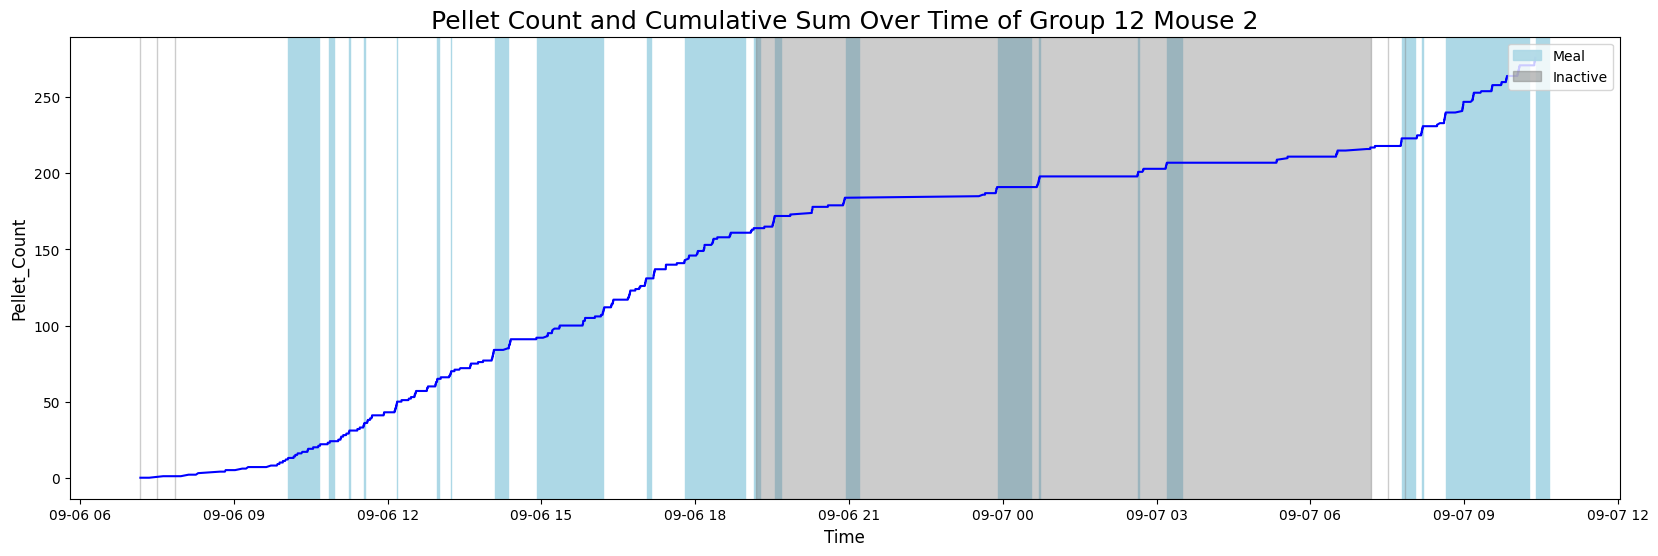

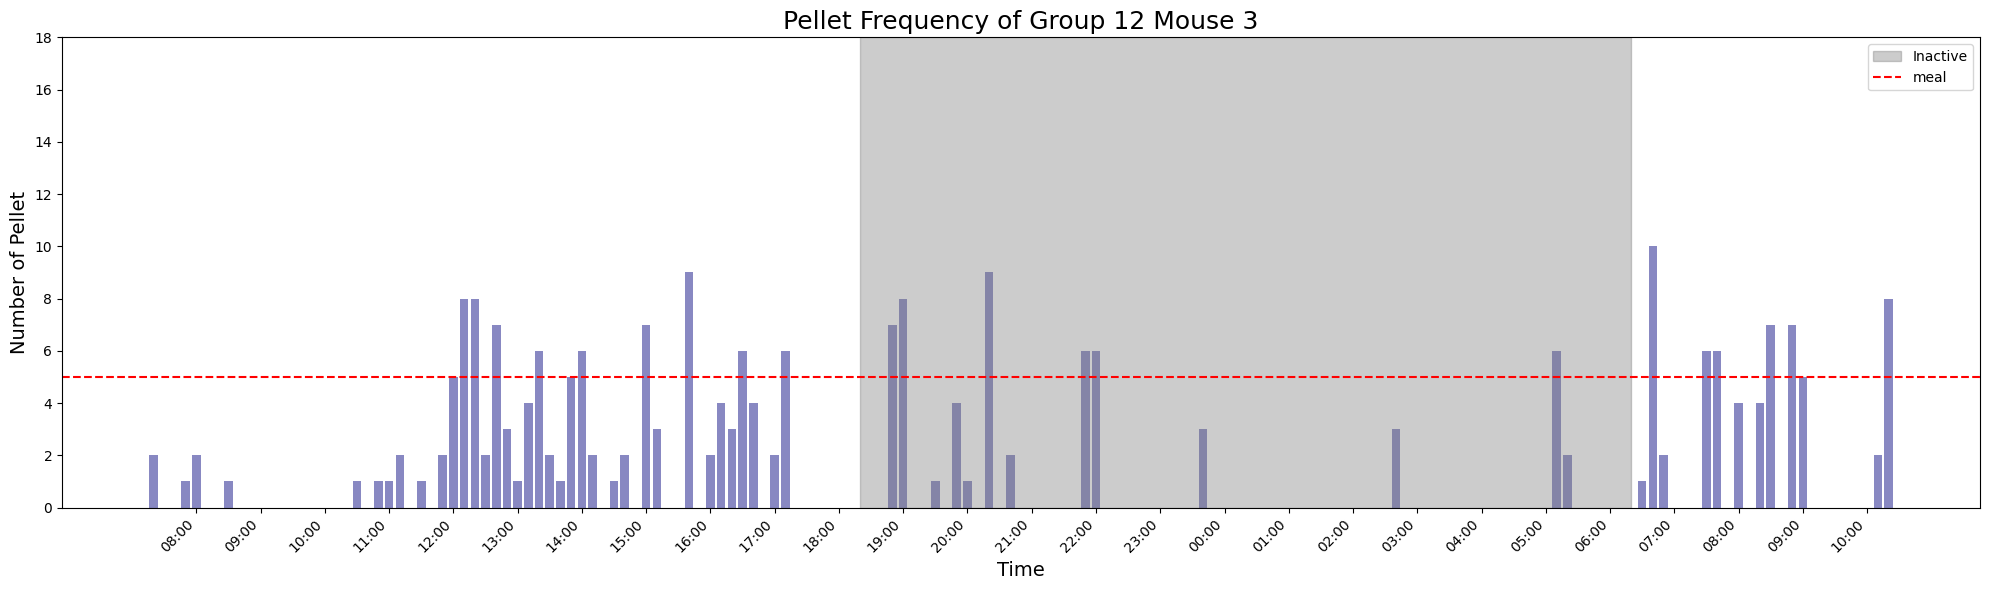

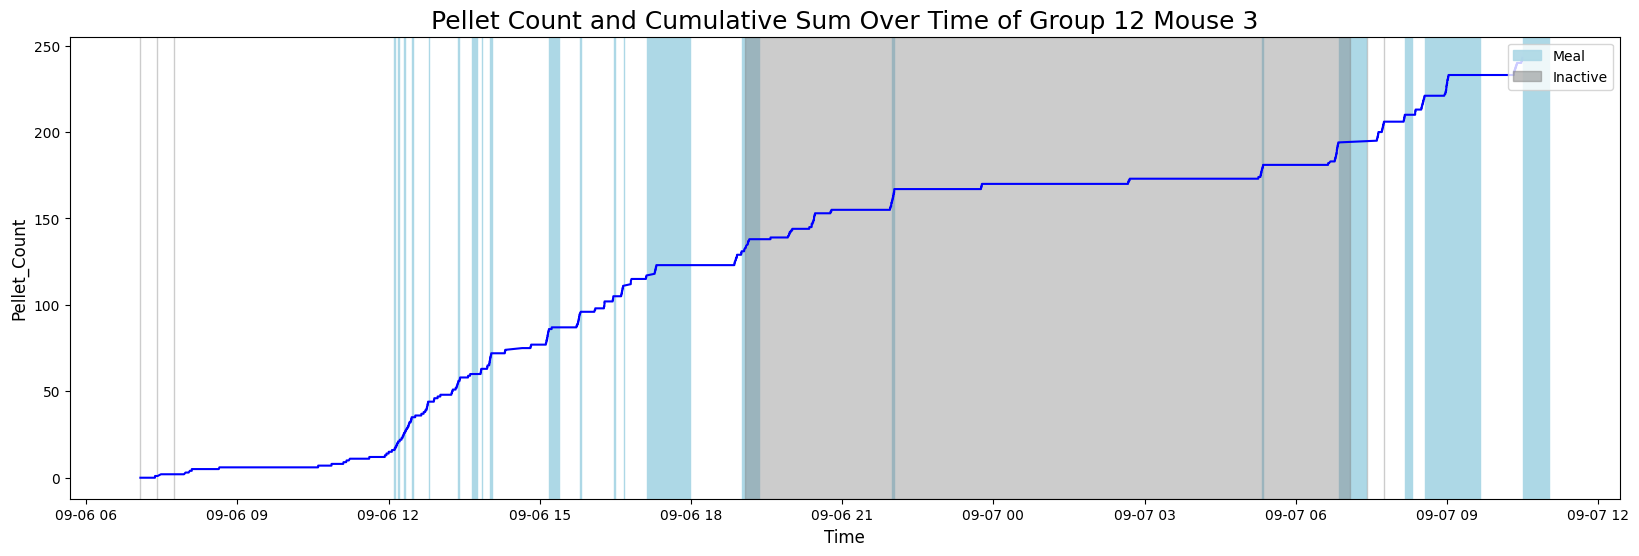

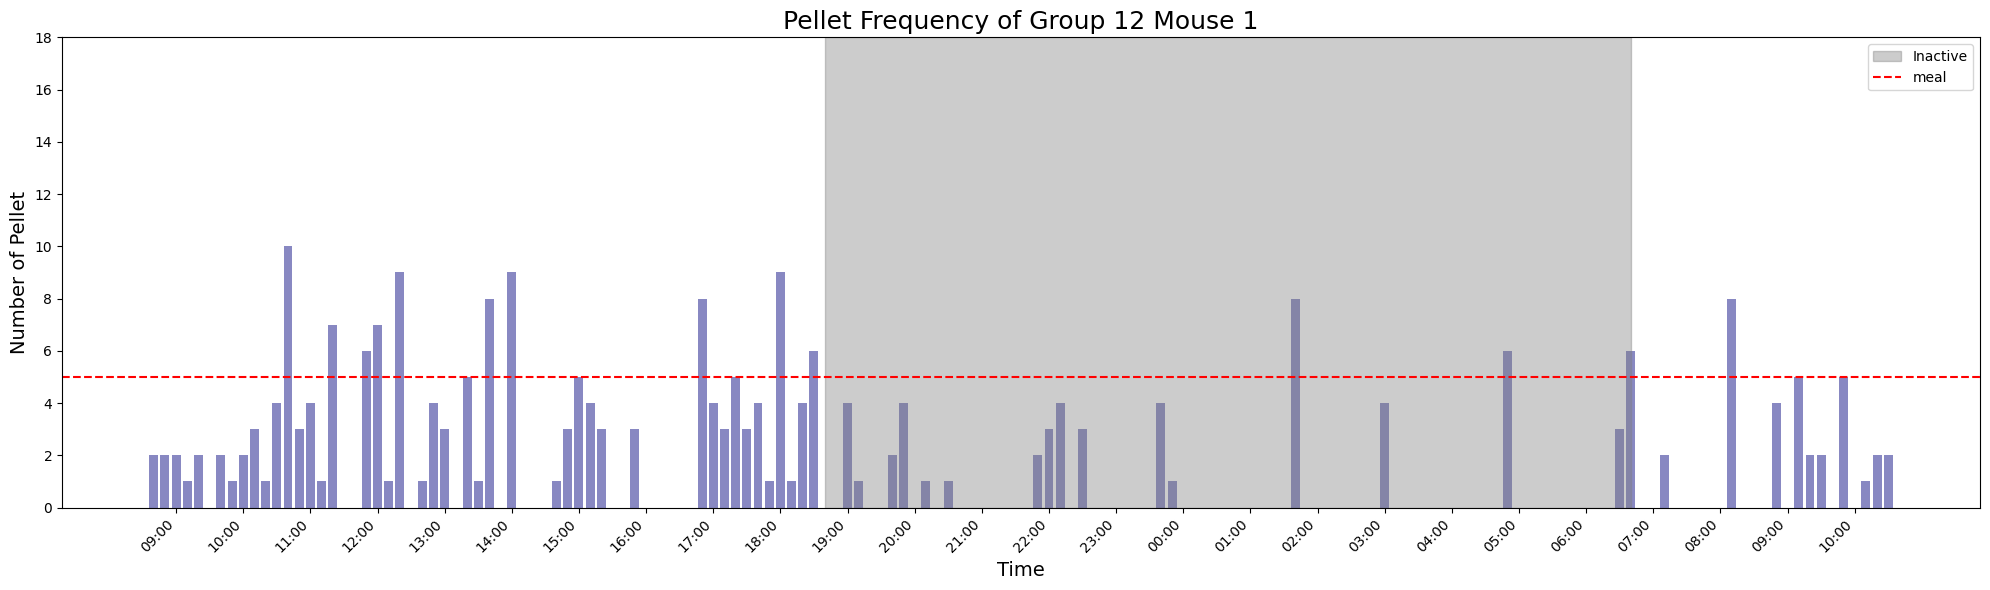

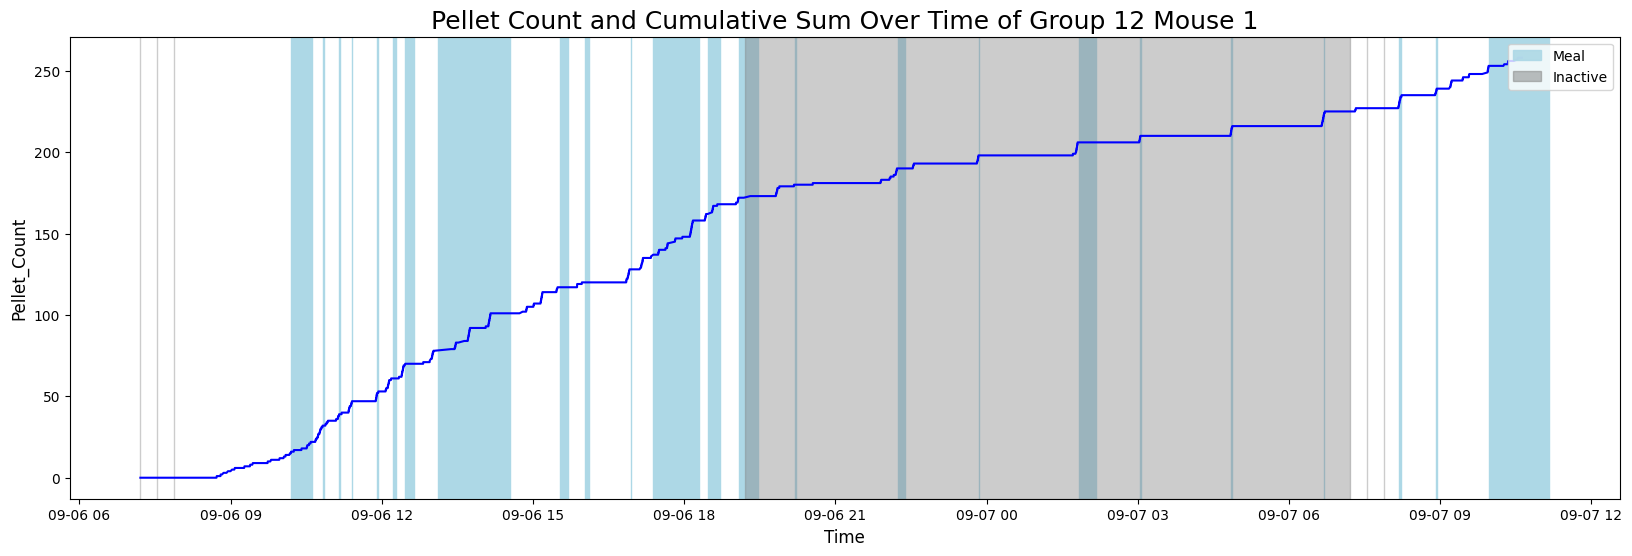

In [2]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
flip_ctrl_meal_count = []

for sheet in ctrl_sheets:
    data = read_excel_by_sheet(sheet=sheet, parent=ctrl_path)
    meal,_,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    flip_ctrl_meal_count.append(avg)
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ctrl_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

## CASK Group

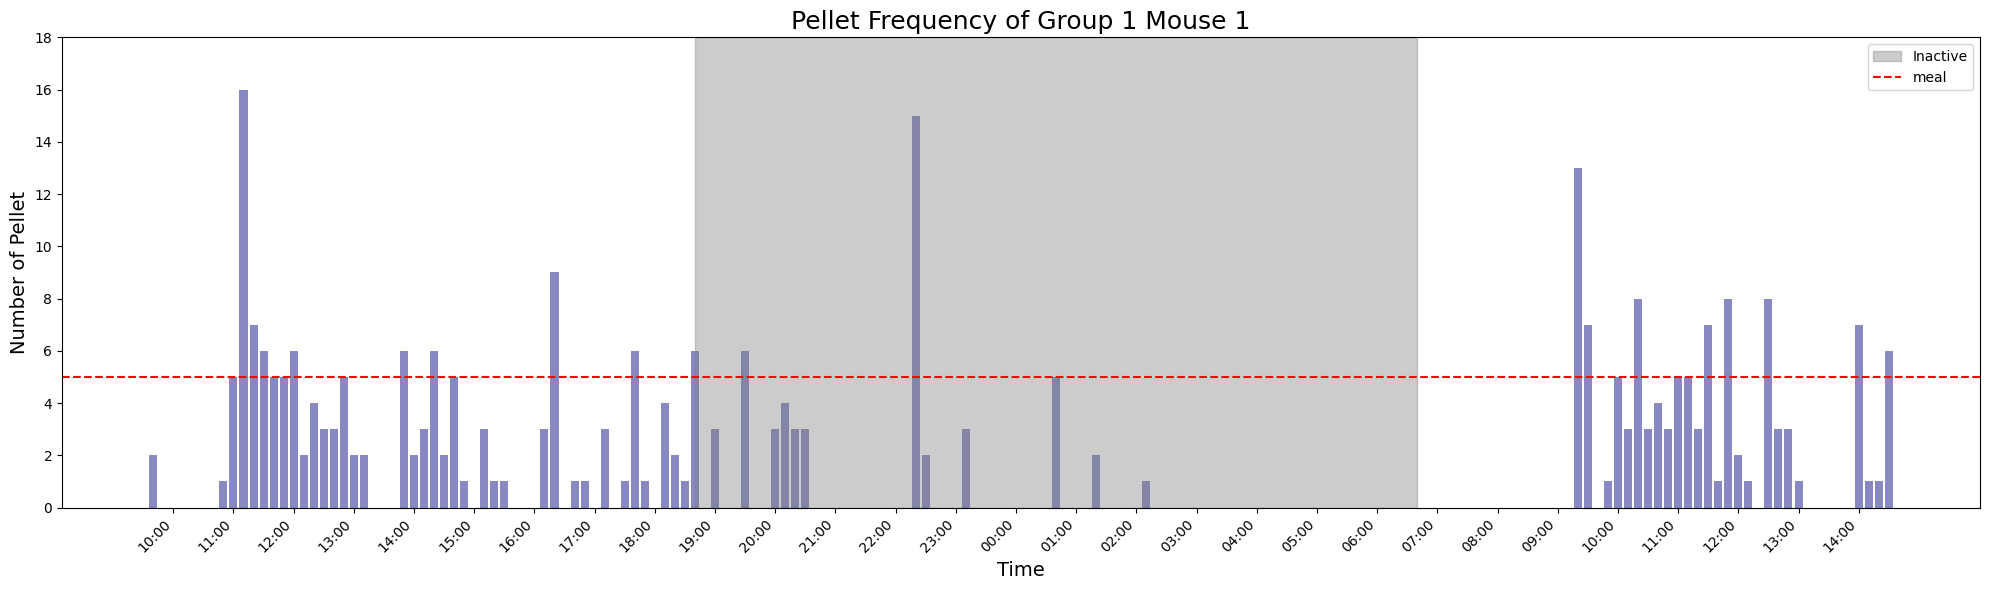

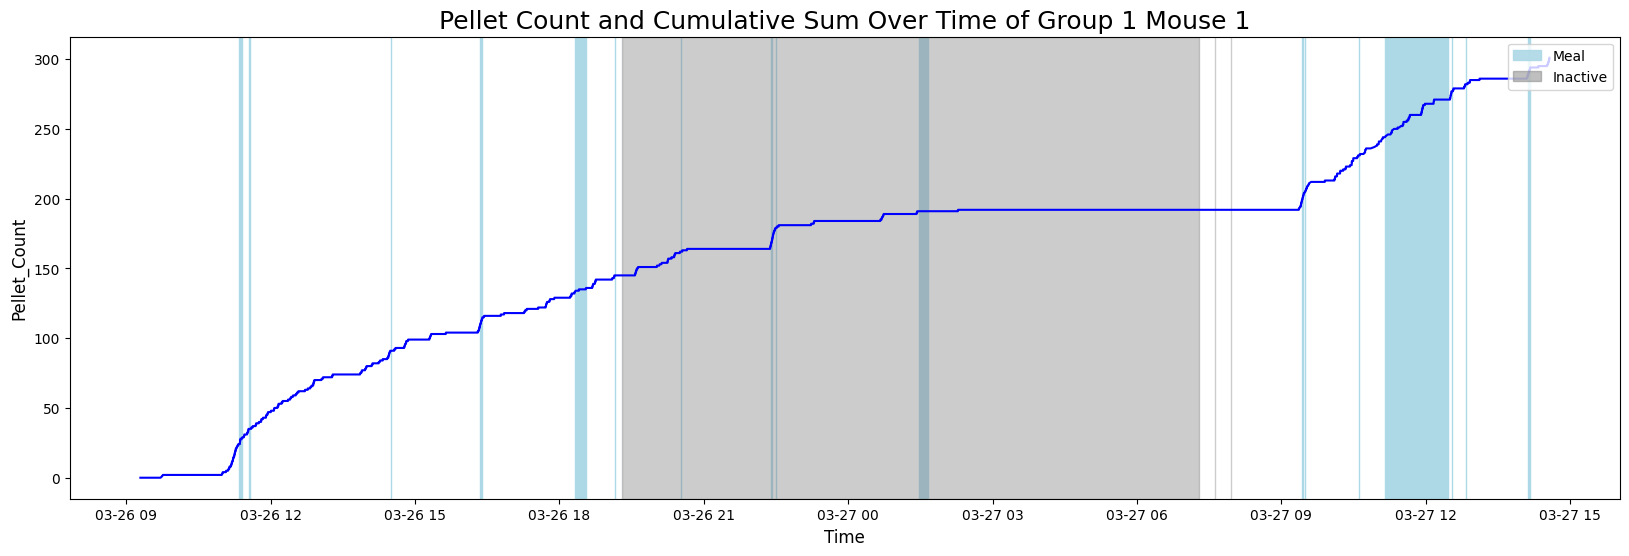

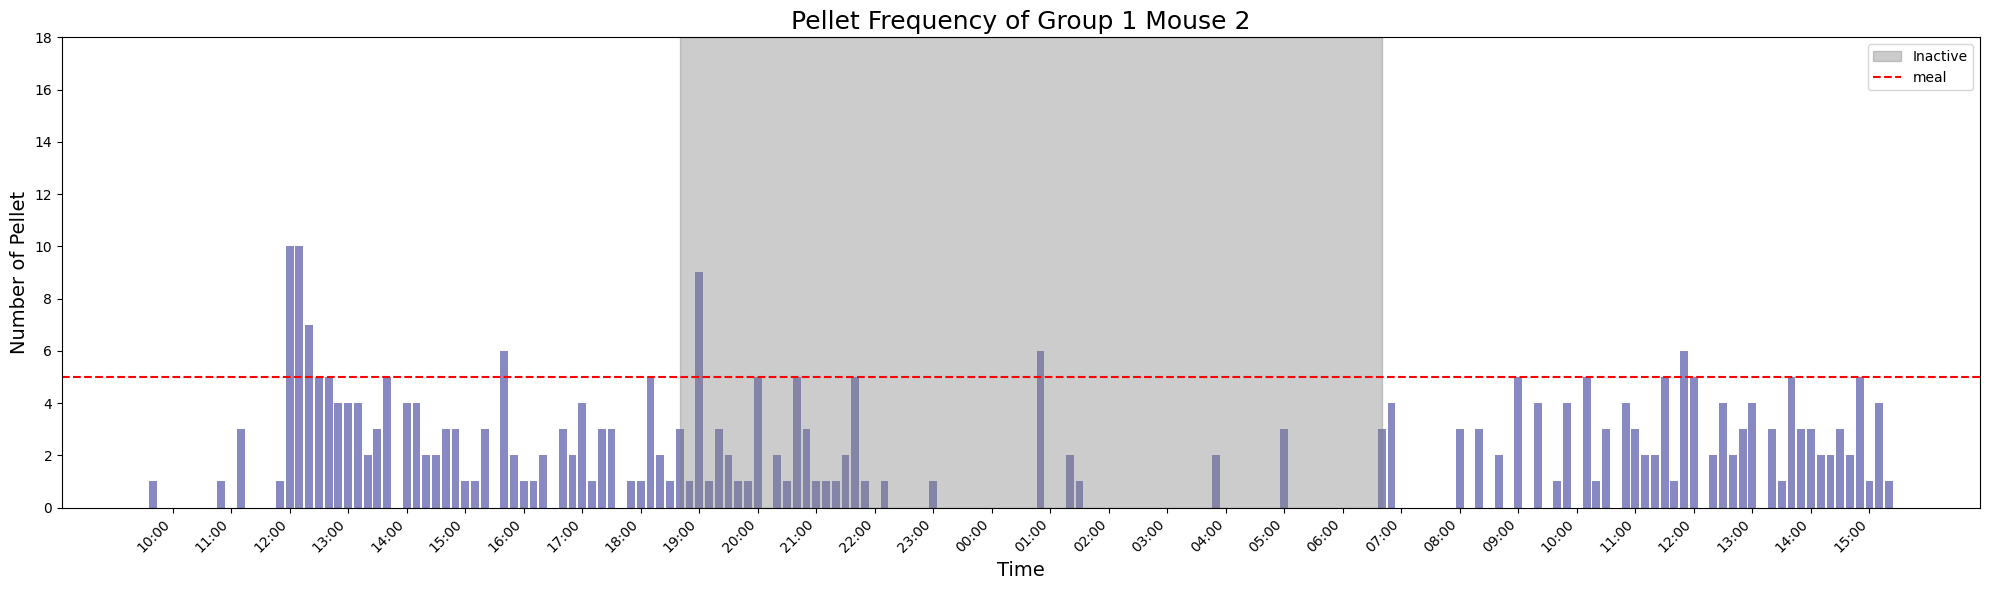

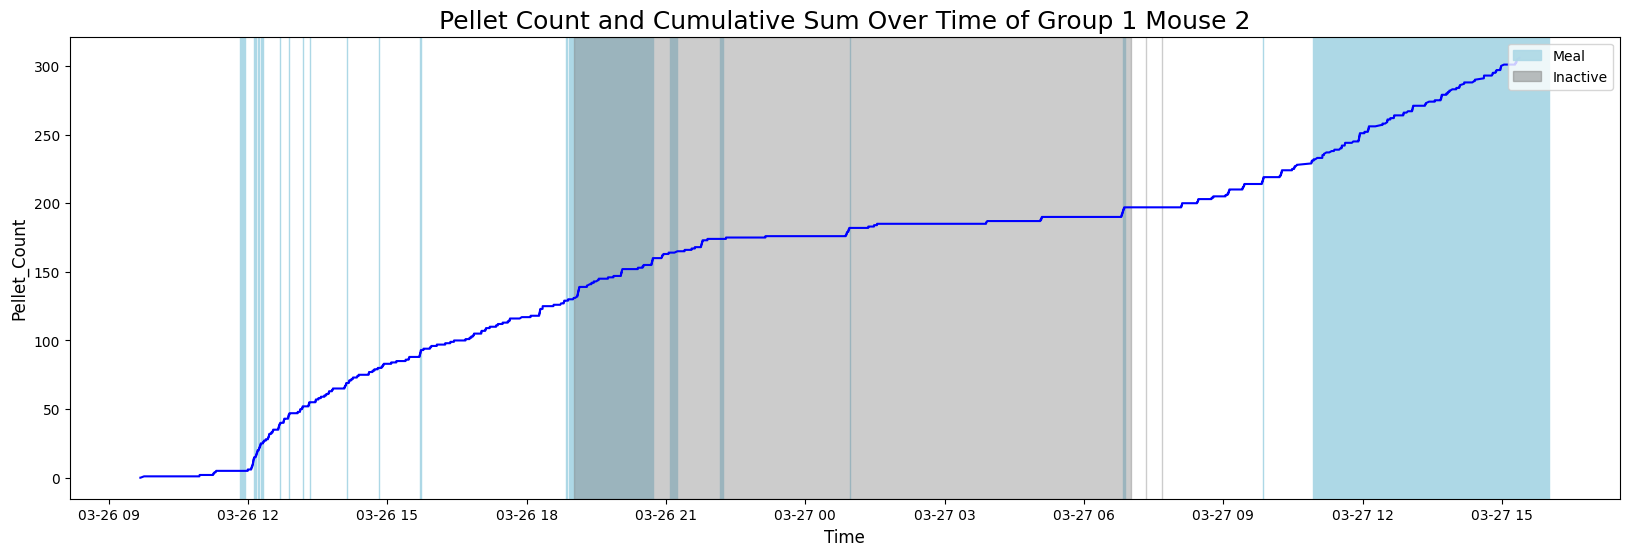

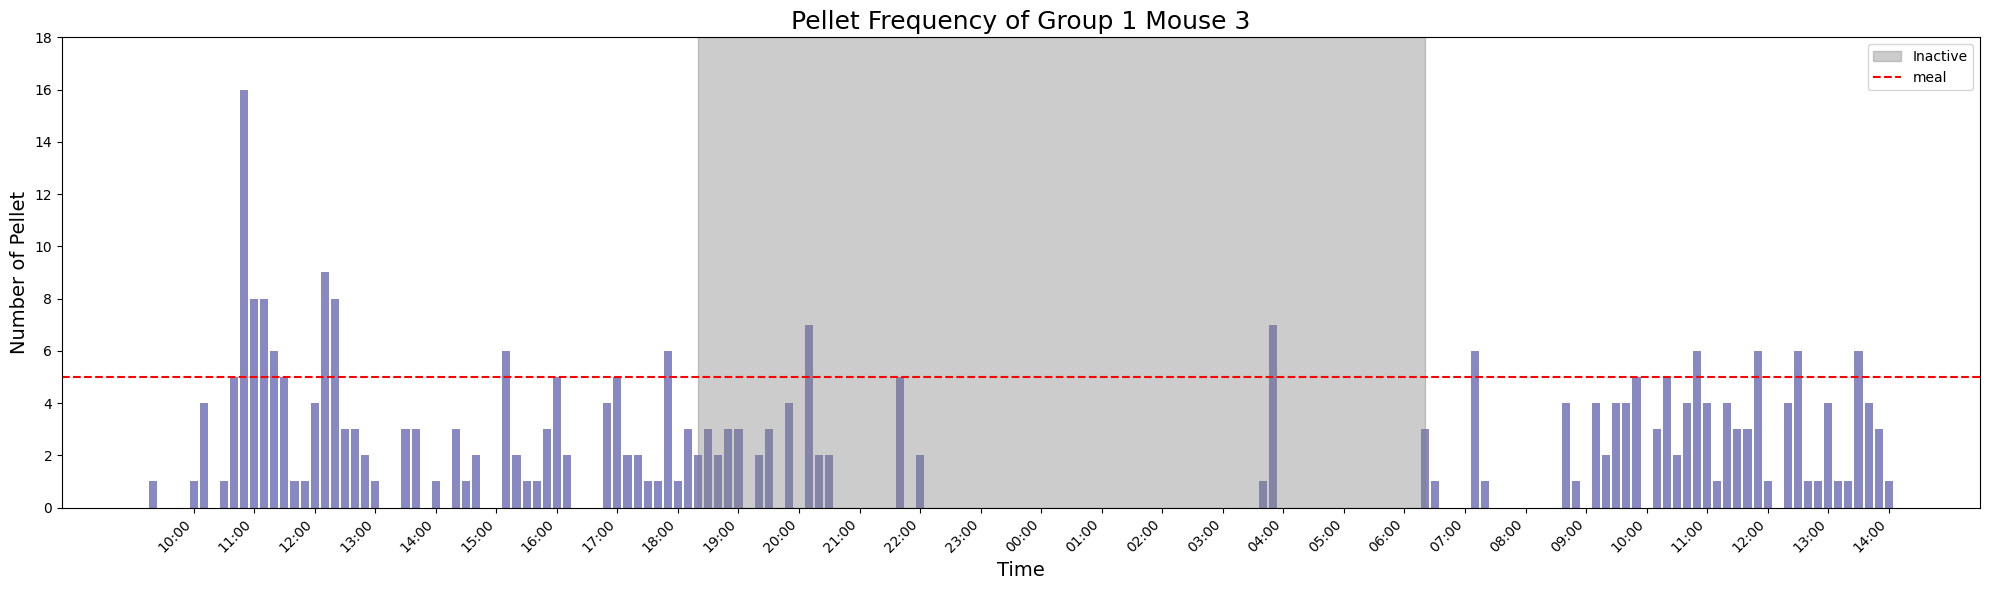

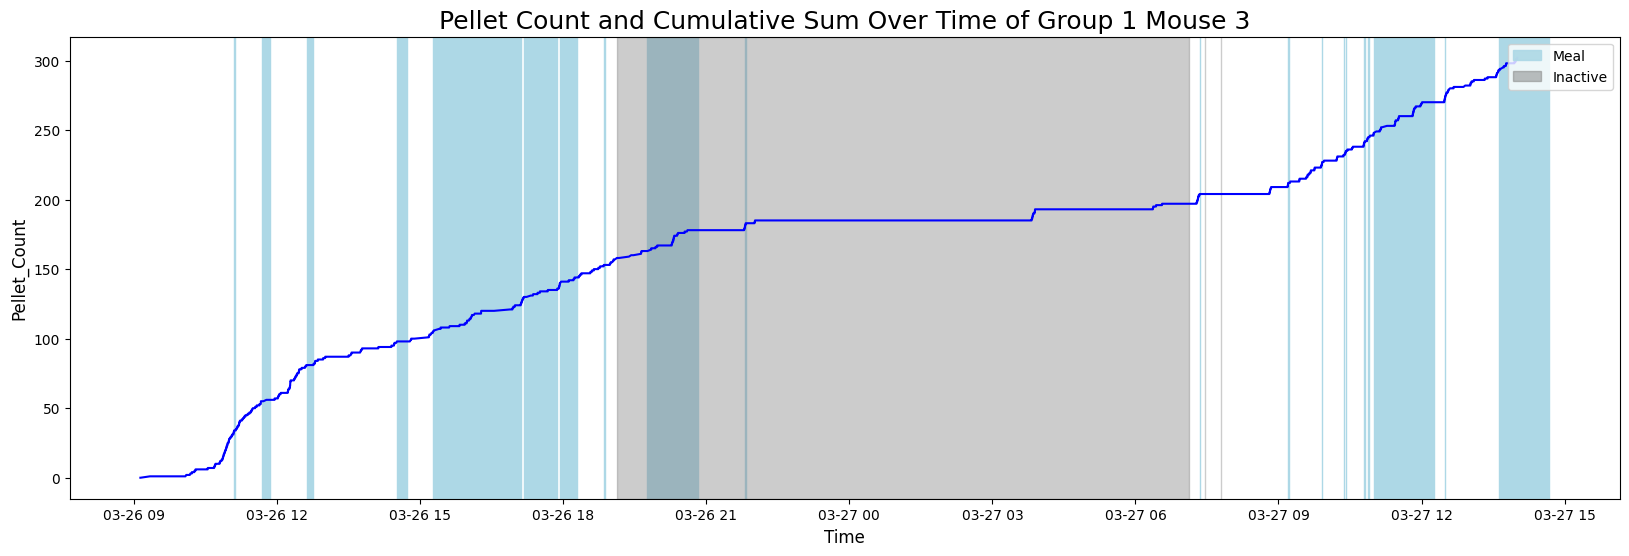

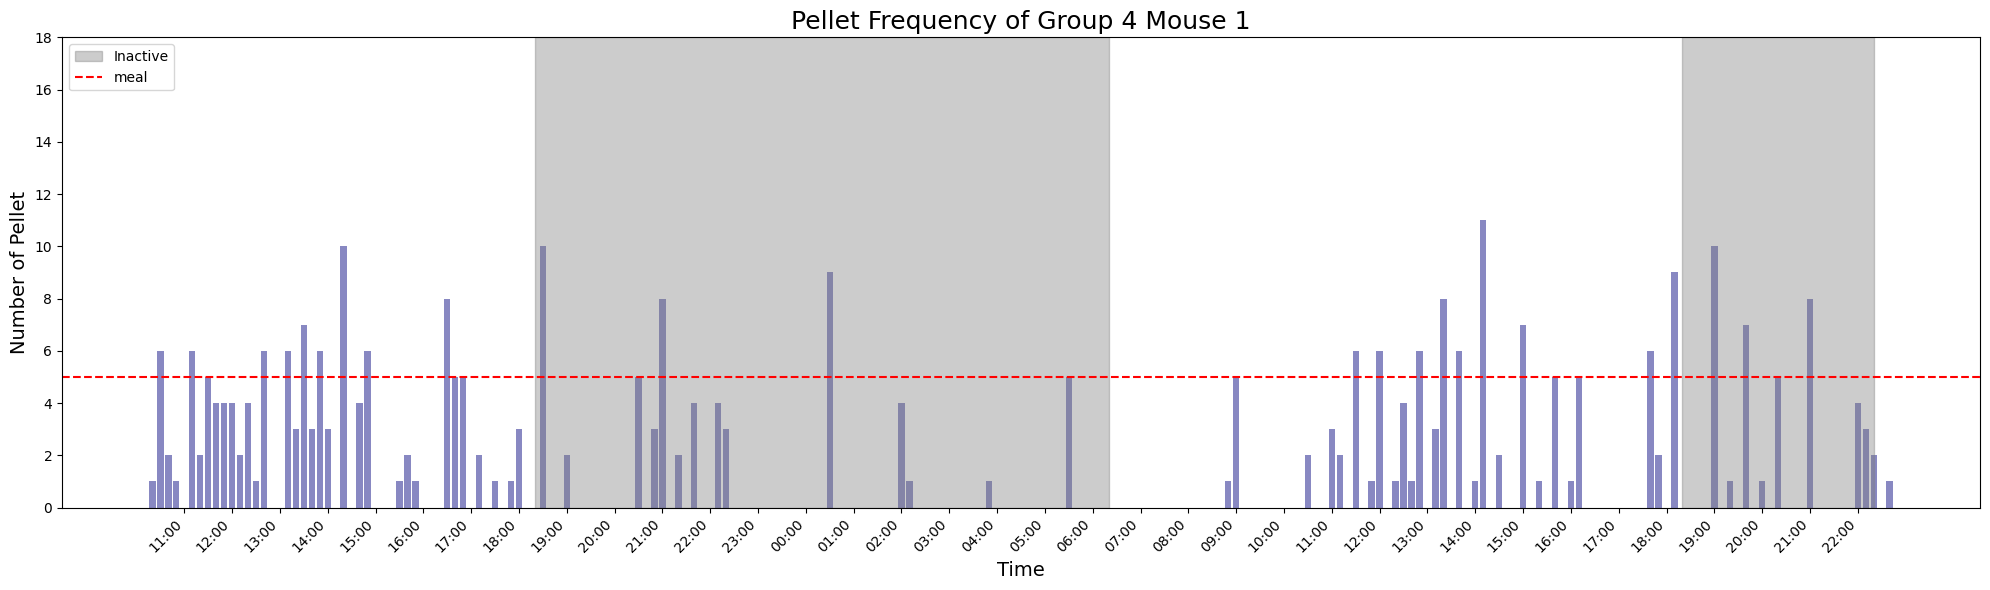

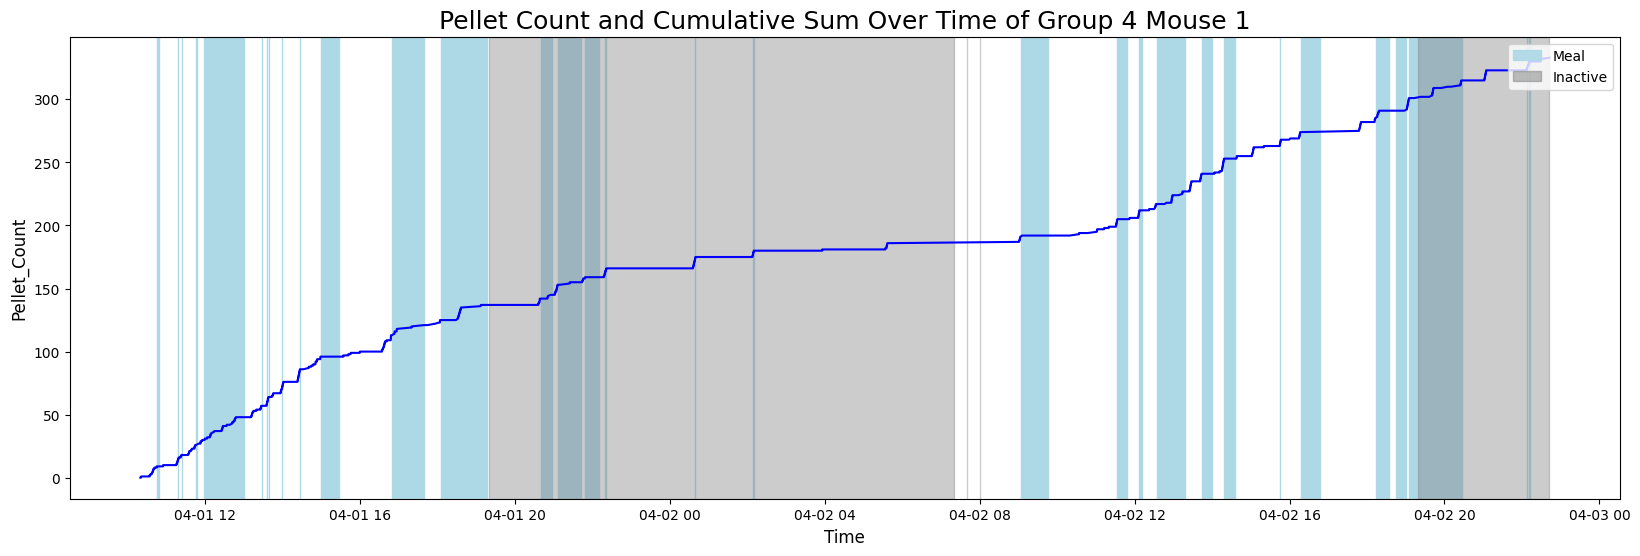

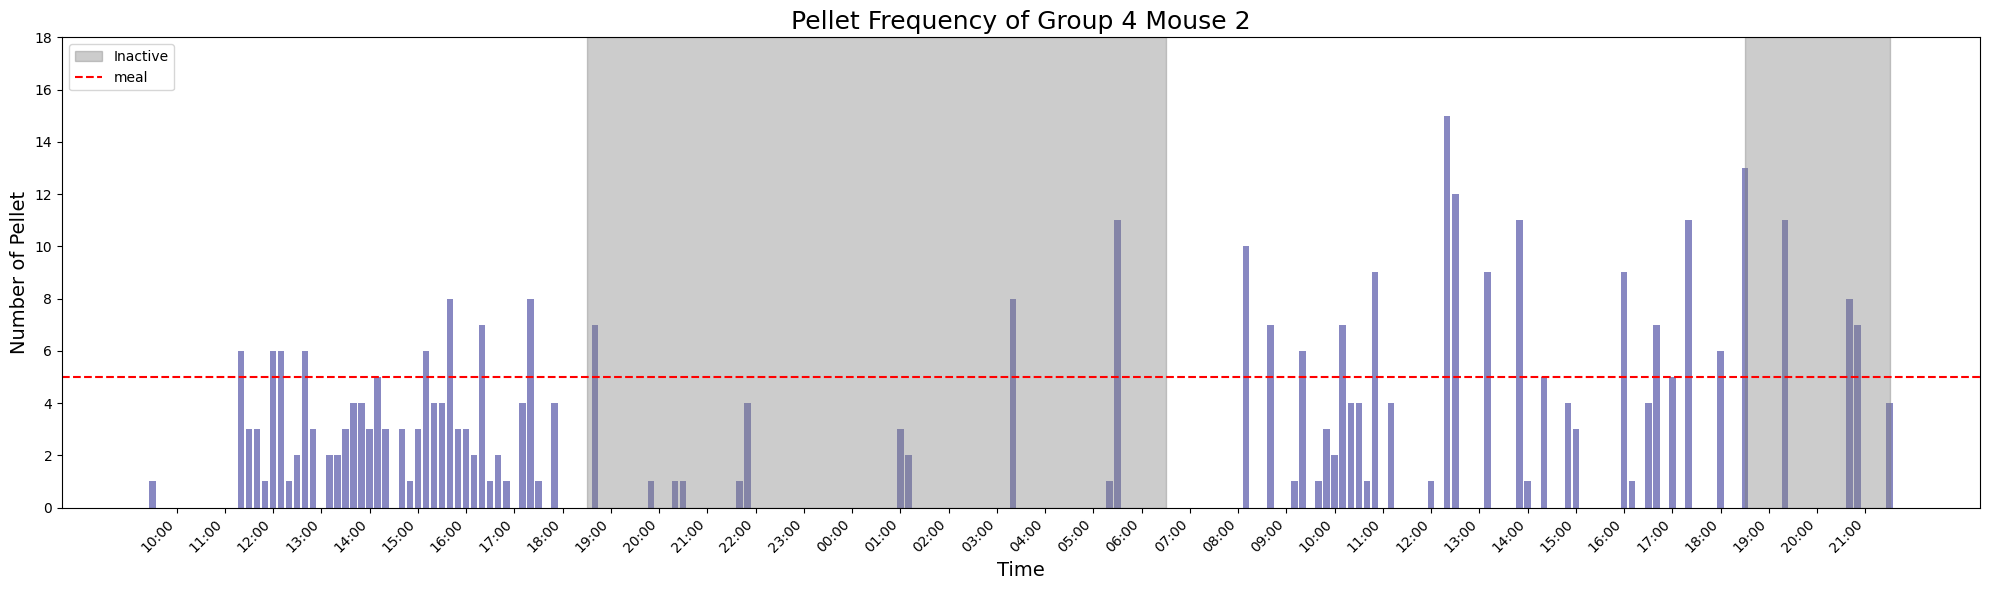

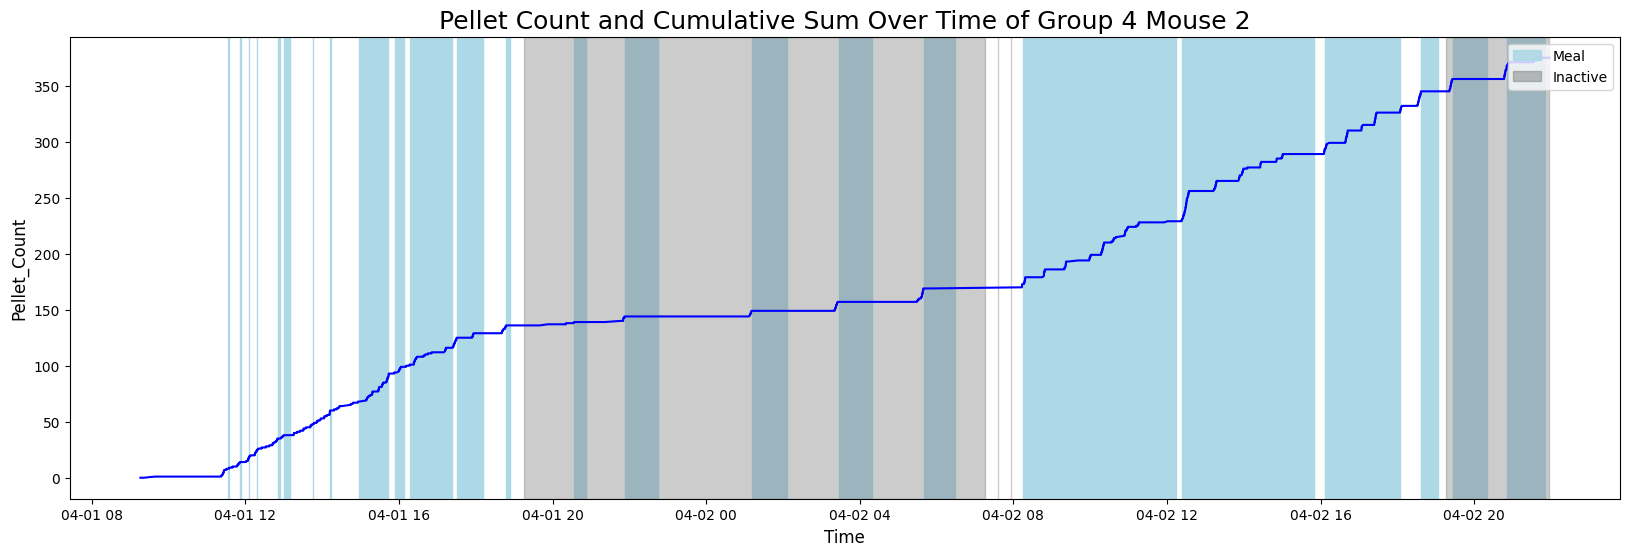

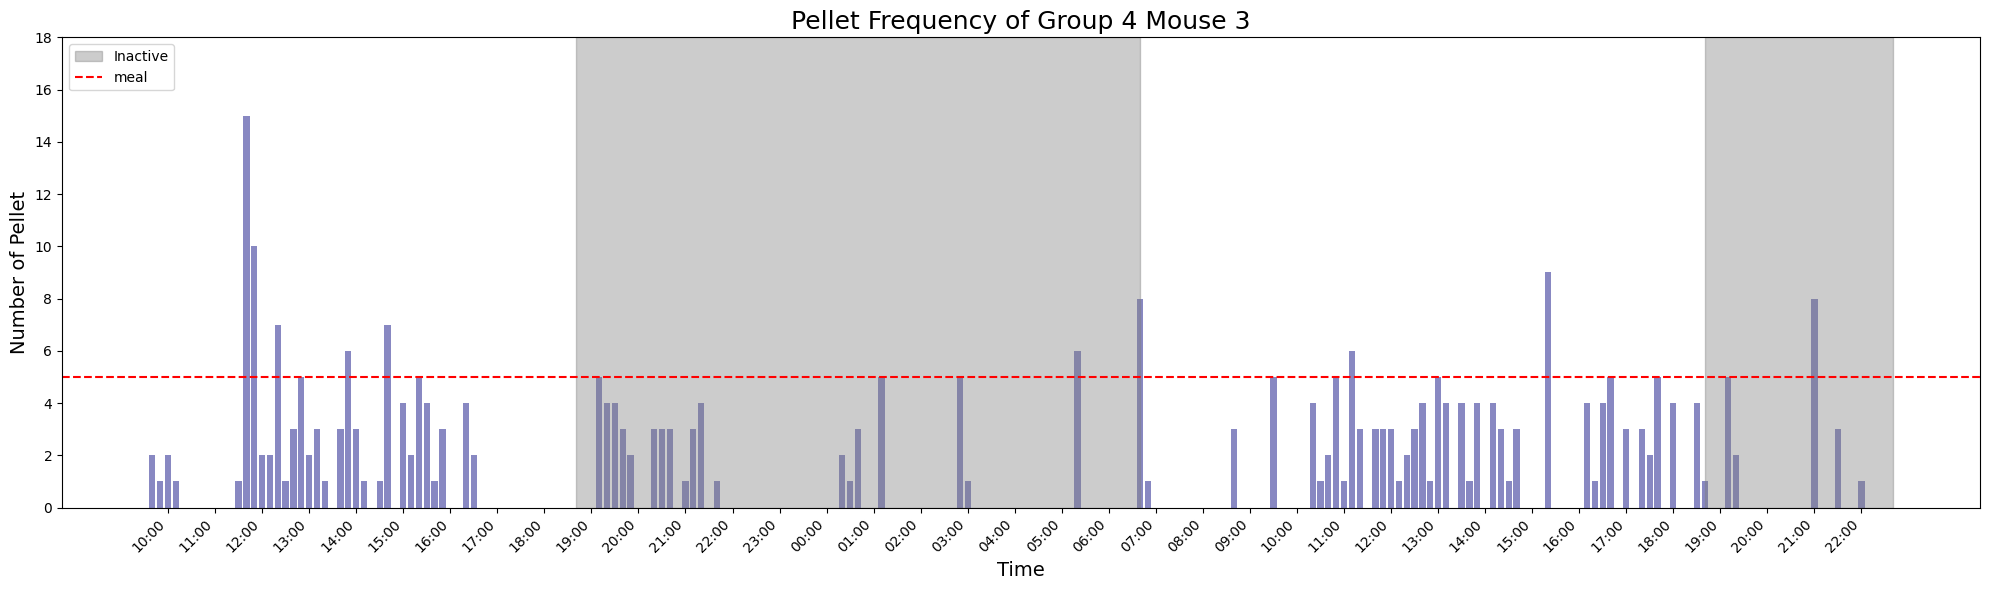

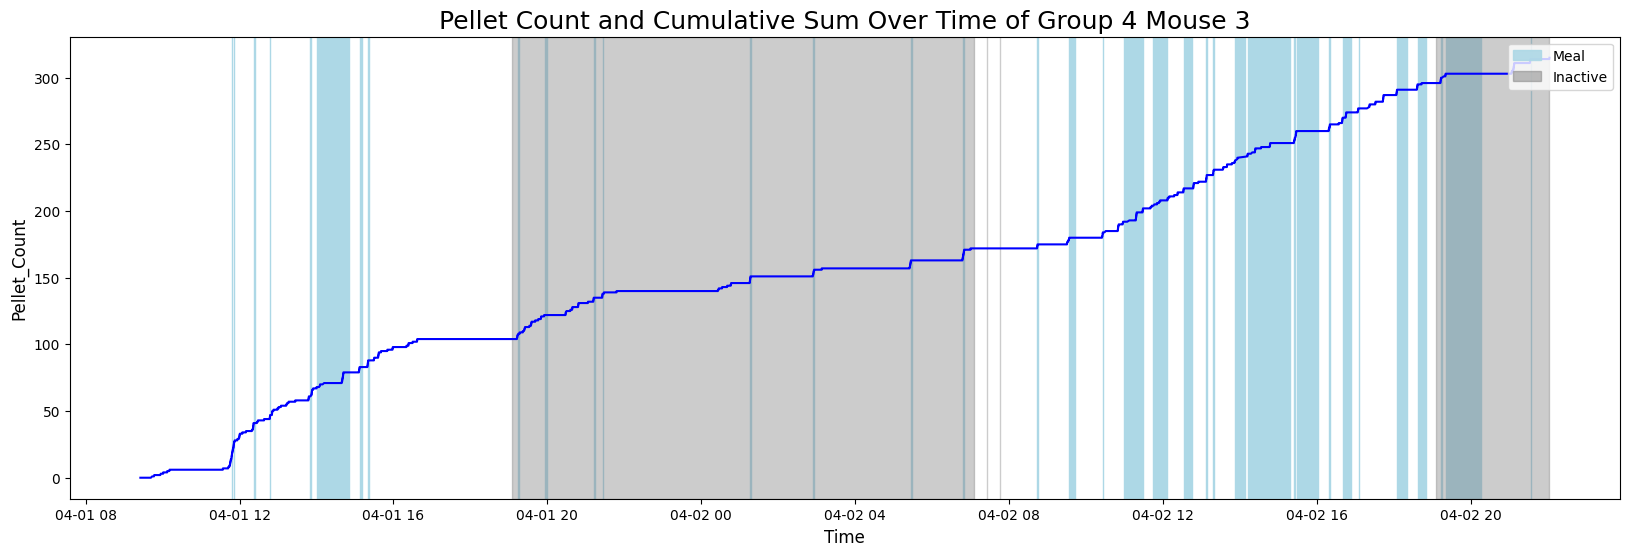

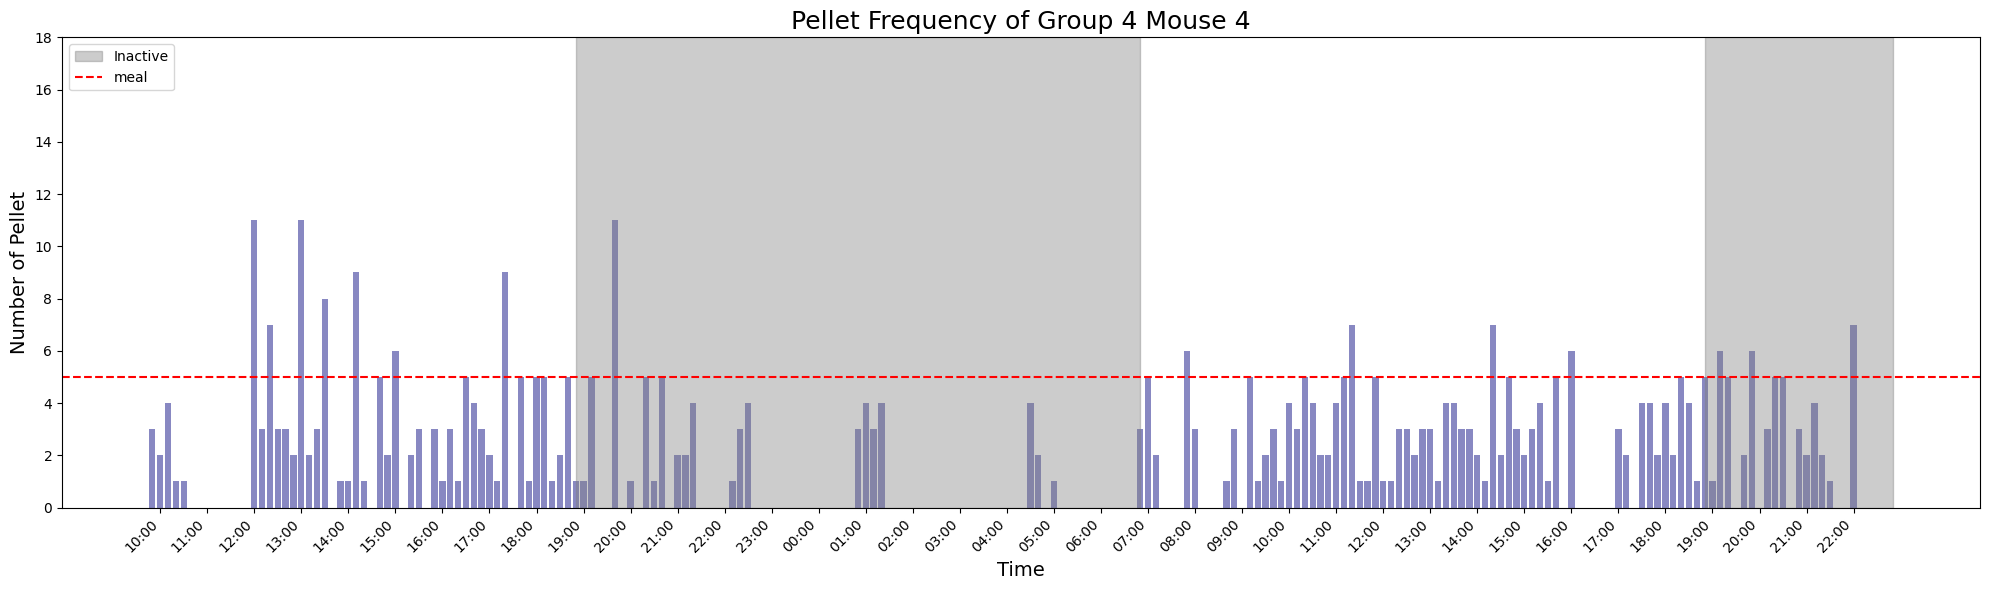

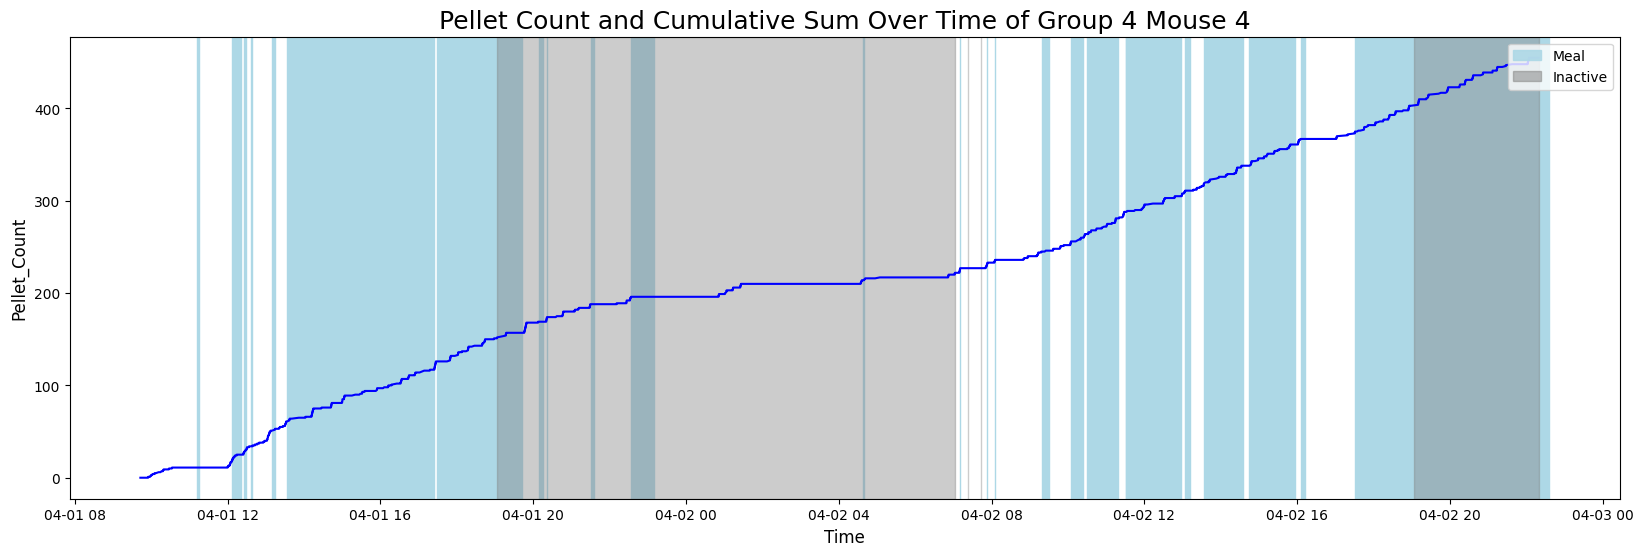

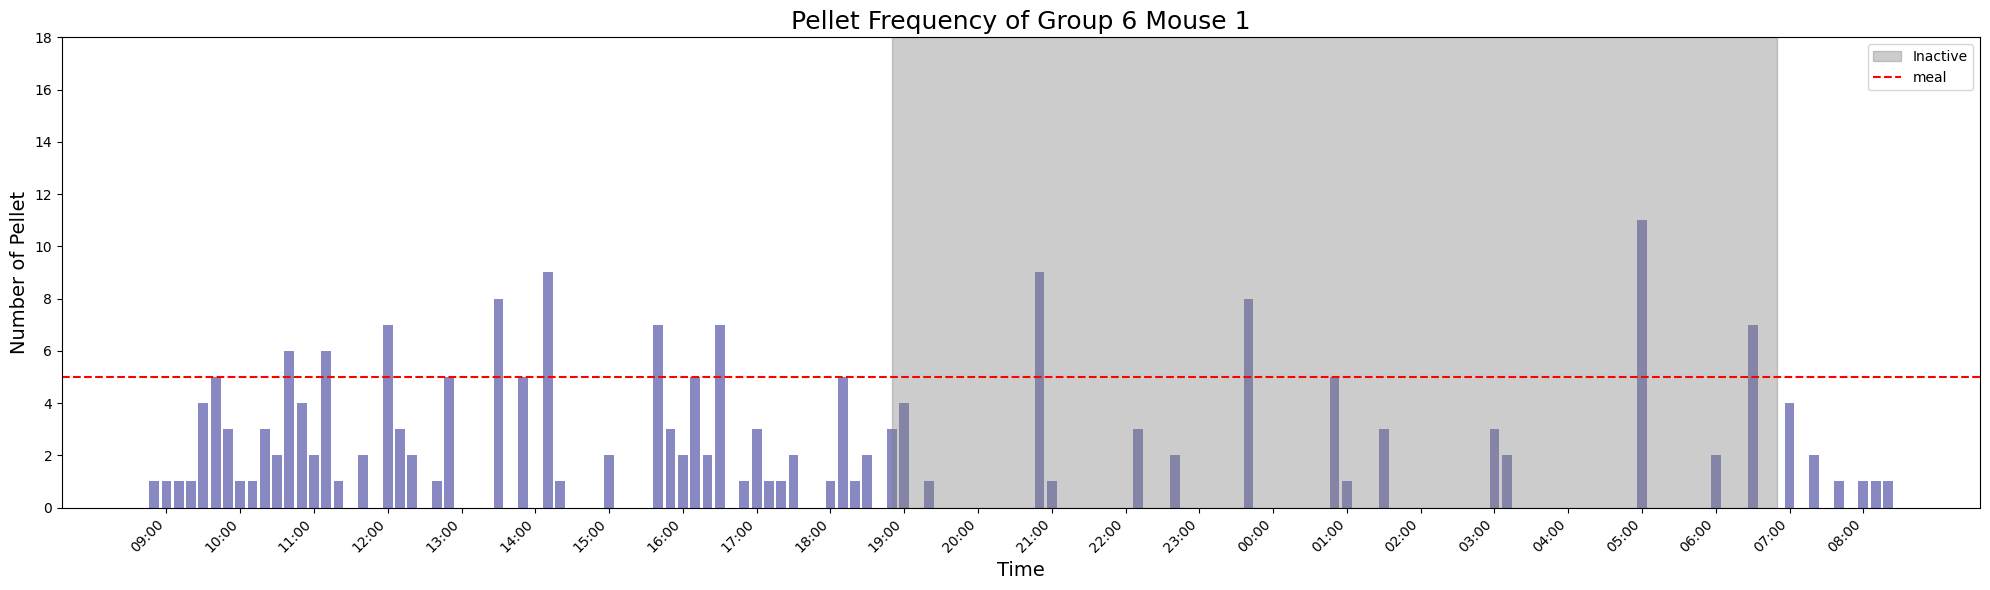

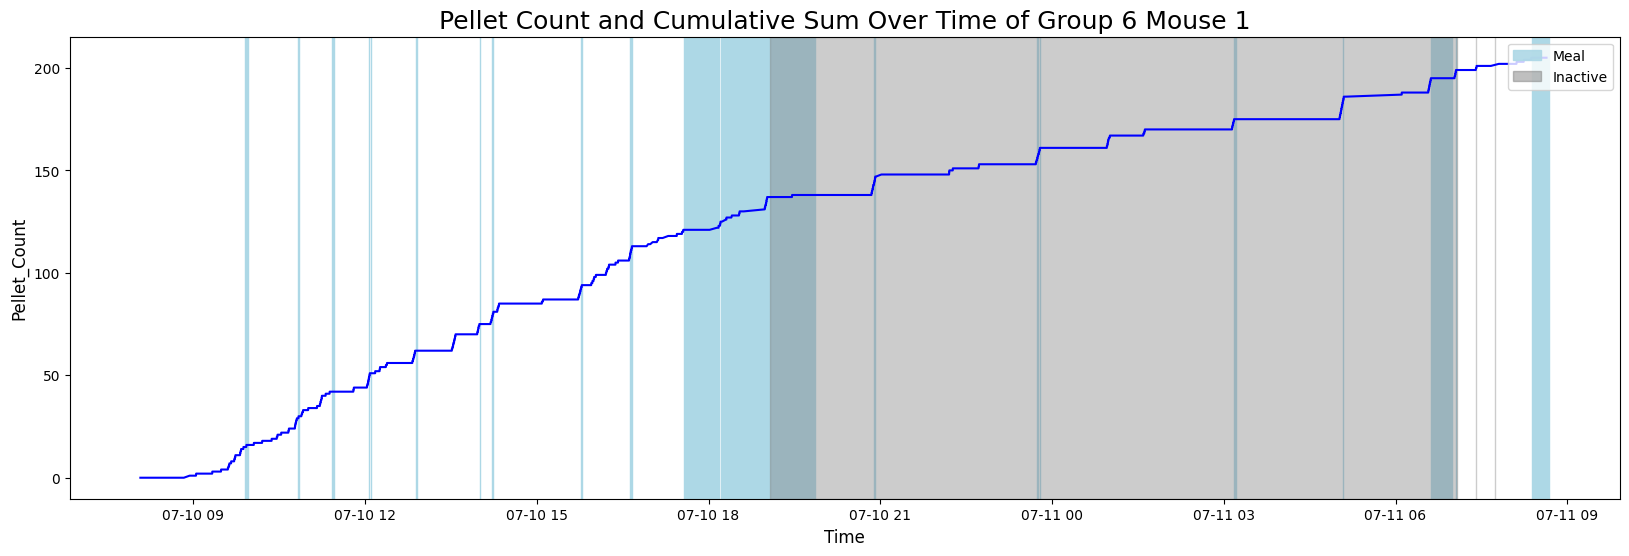

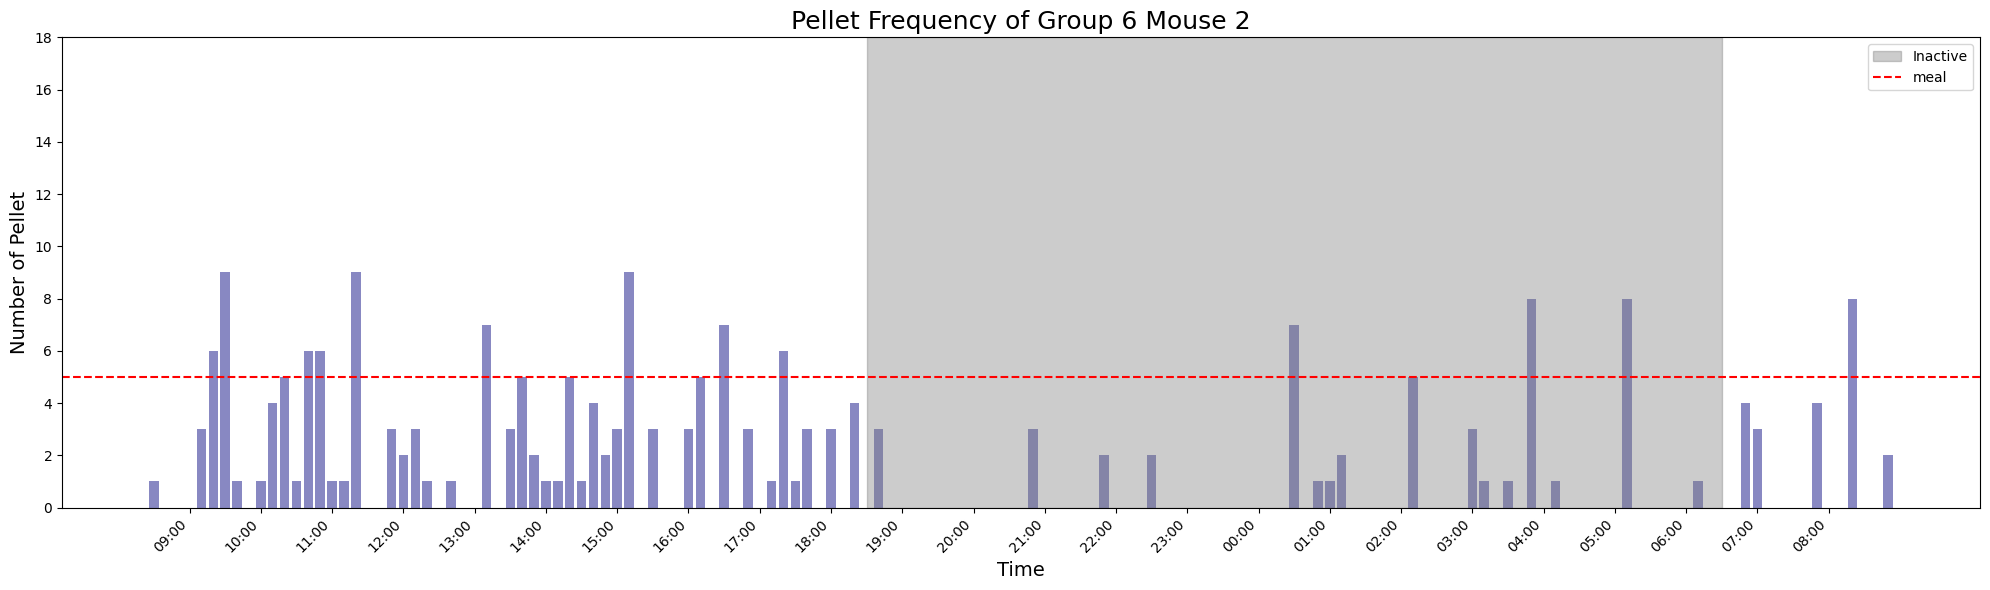

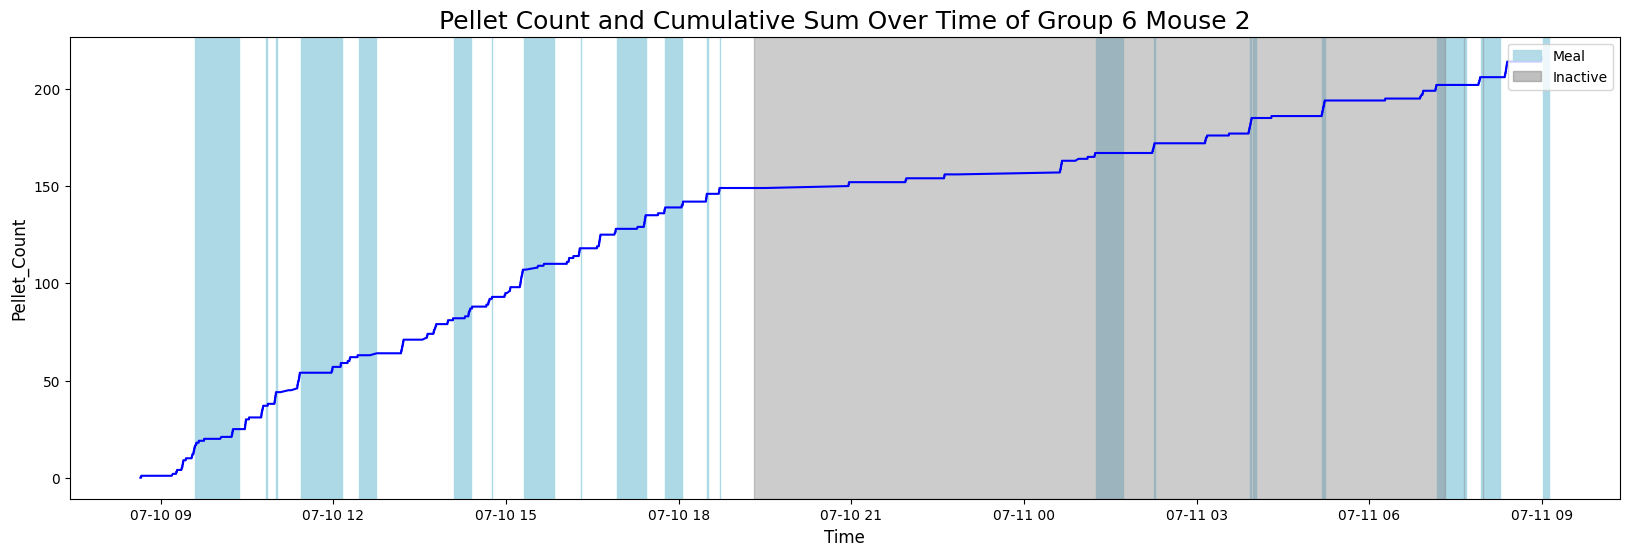

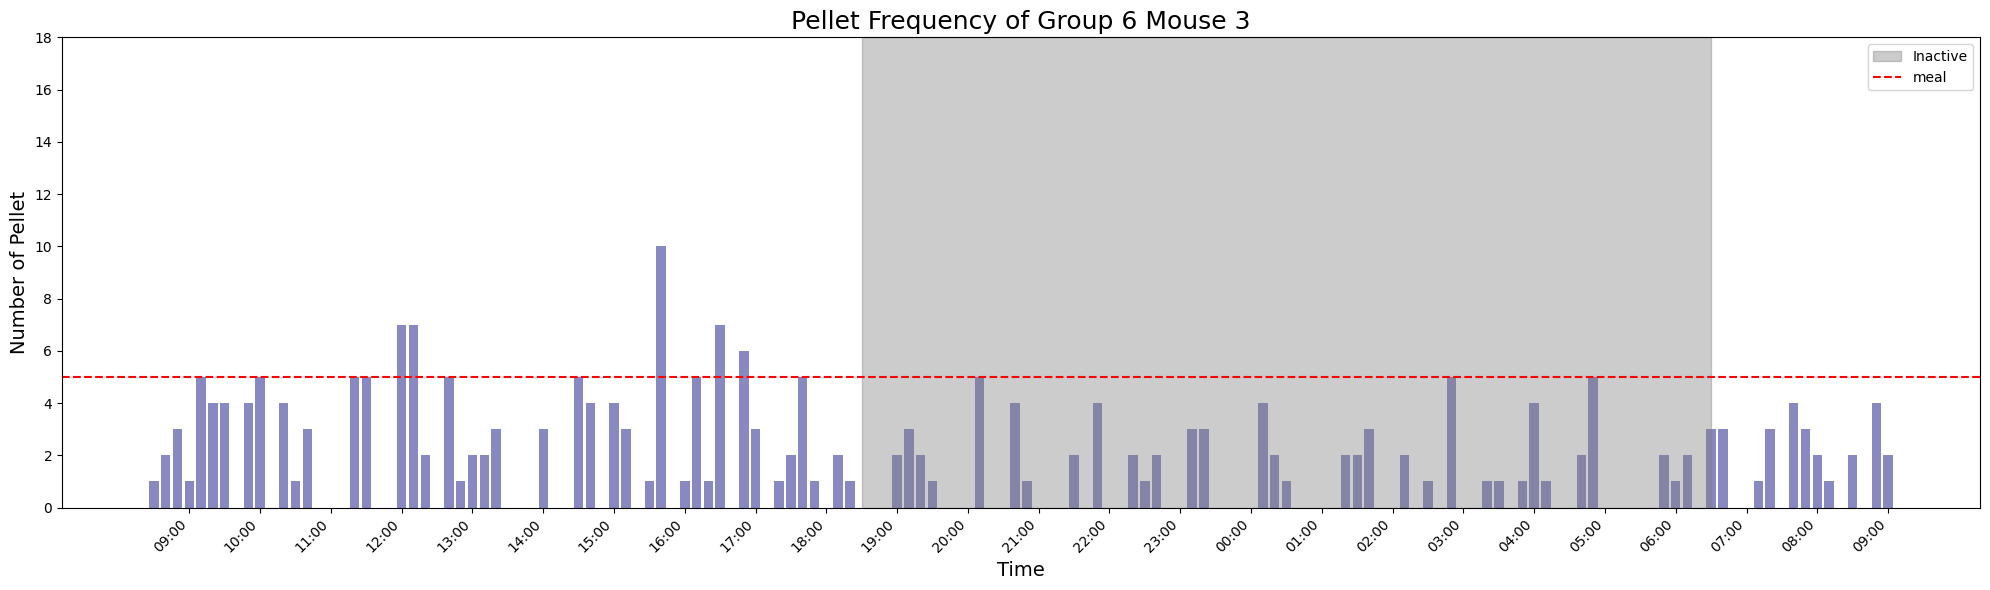

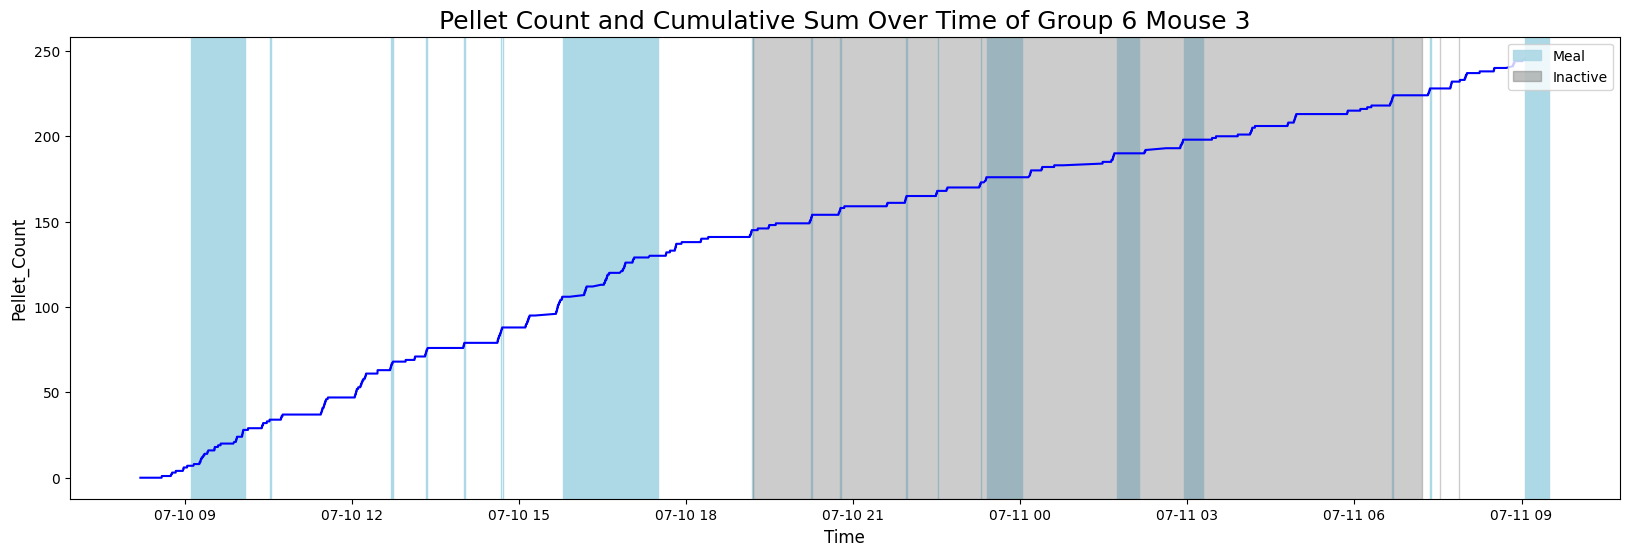

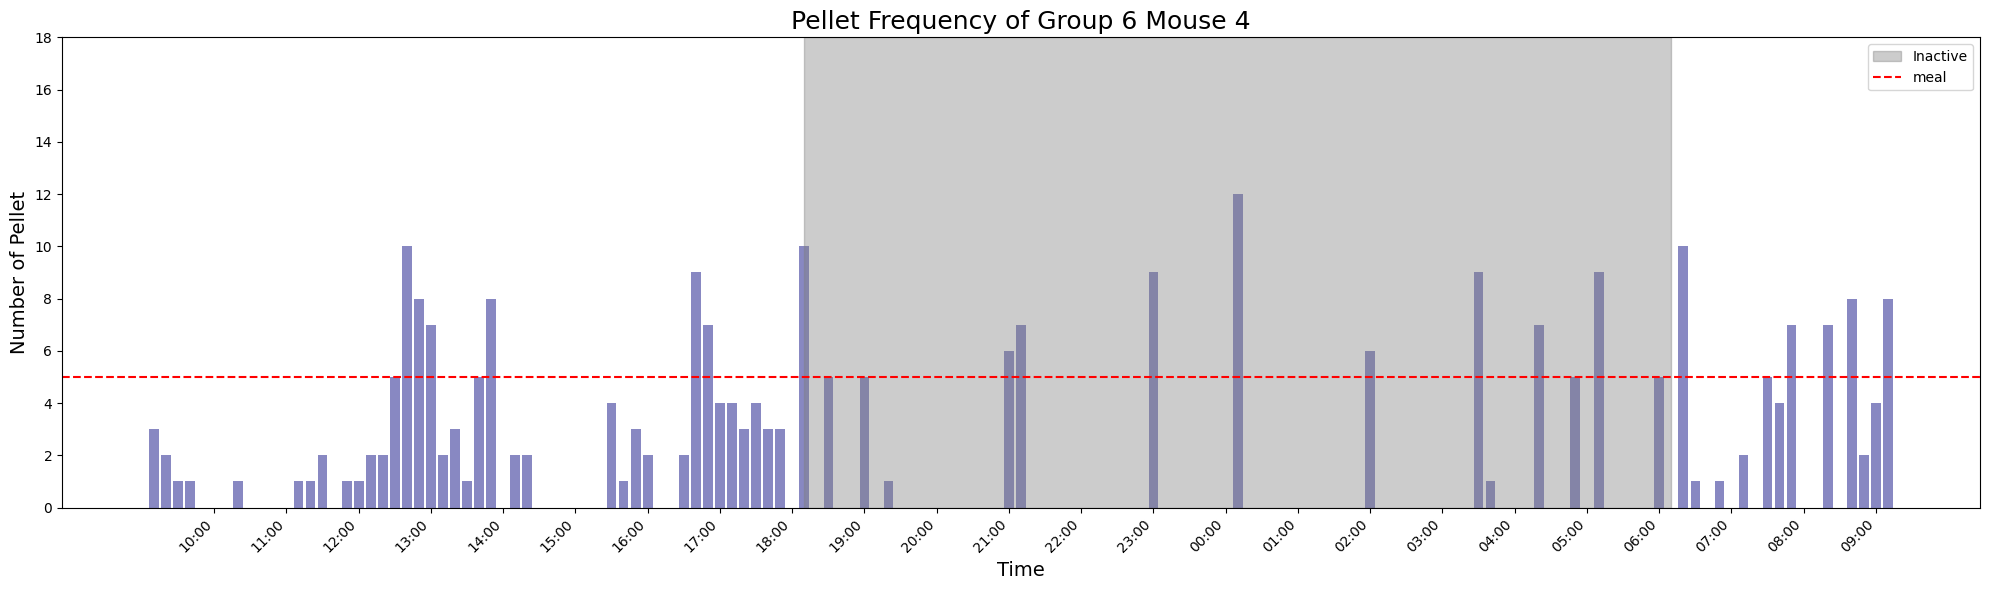

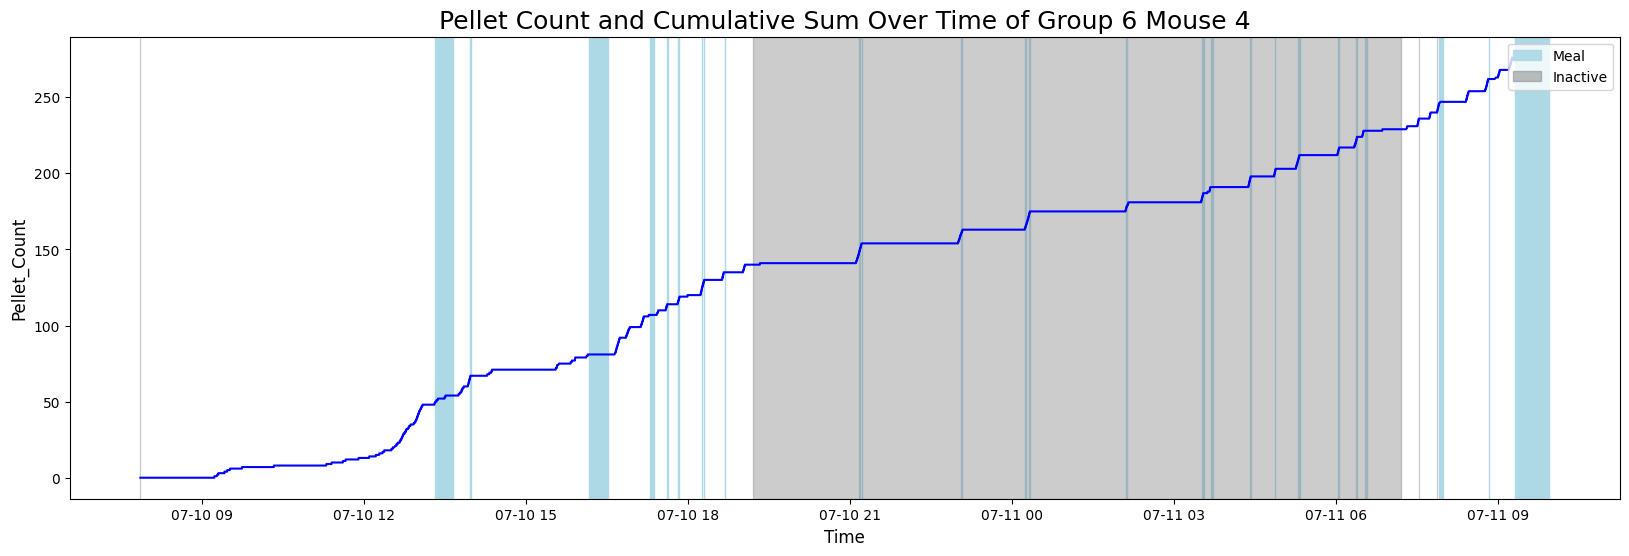

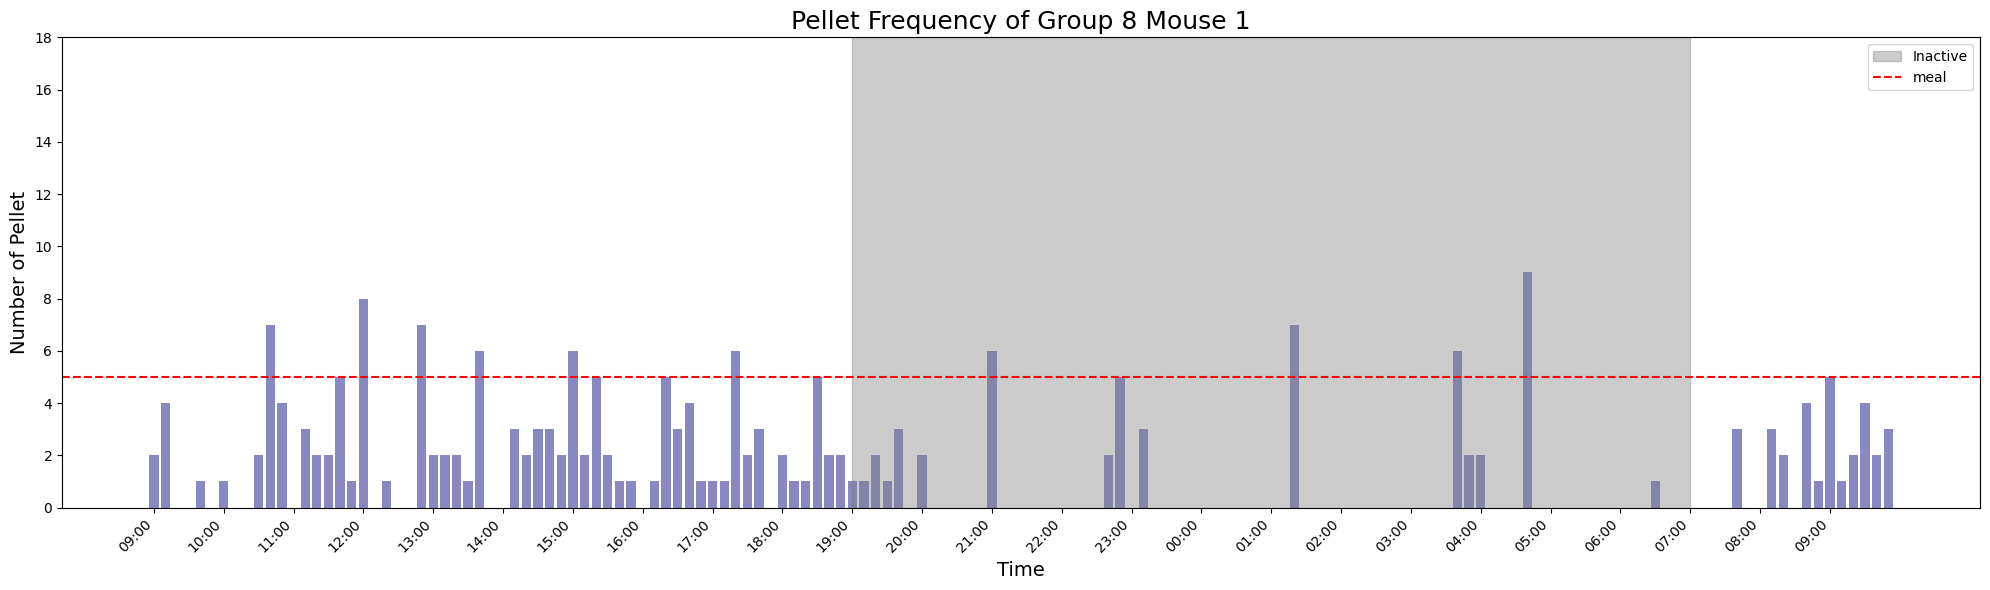

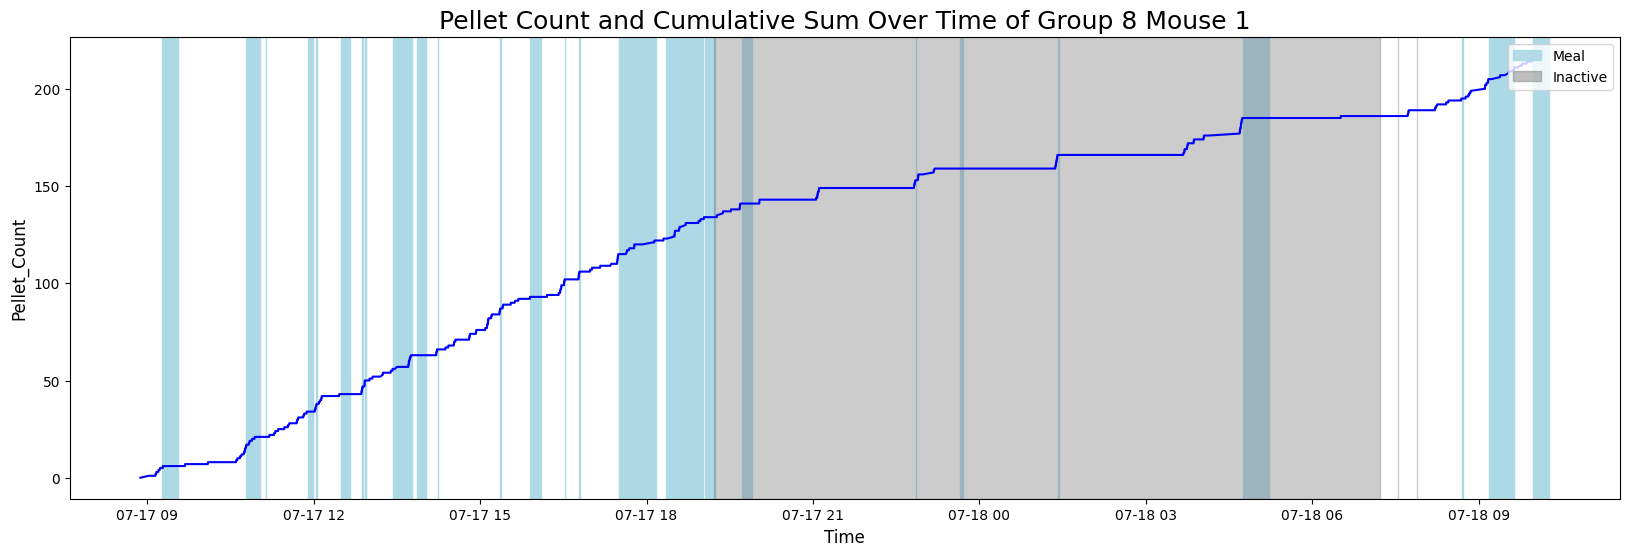

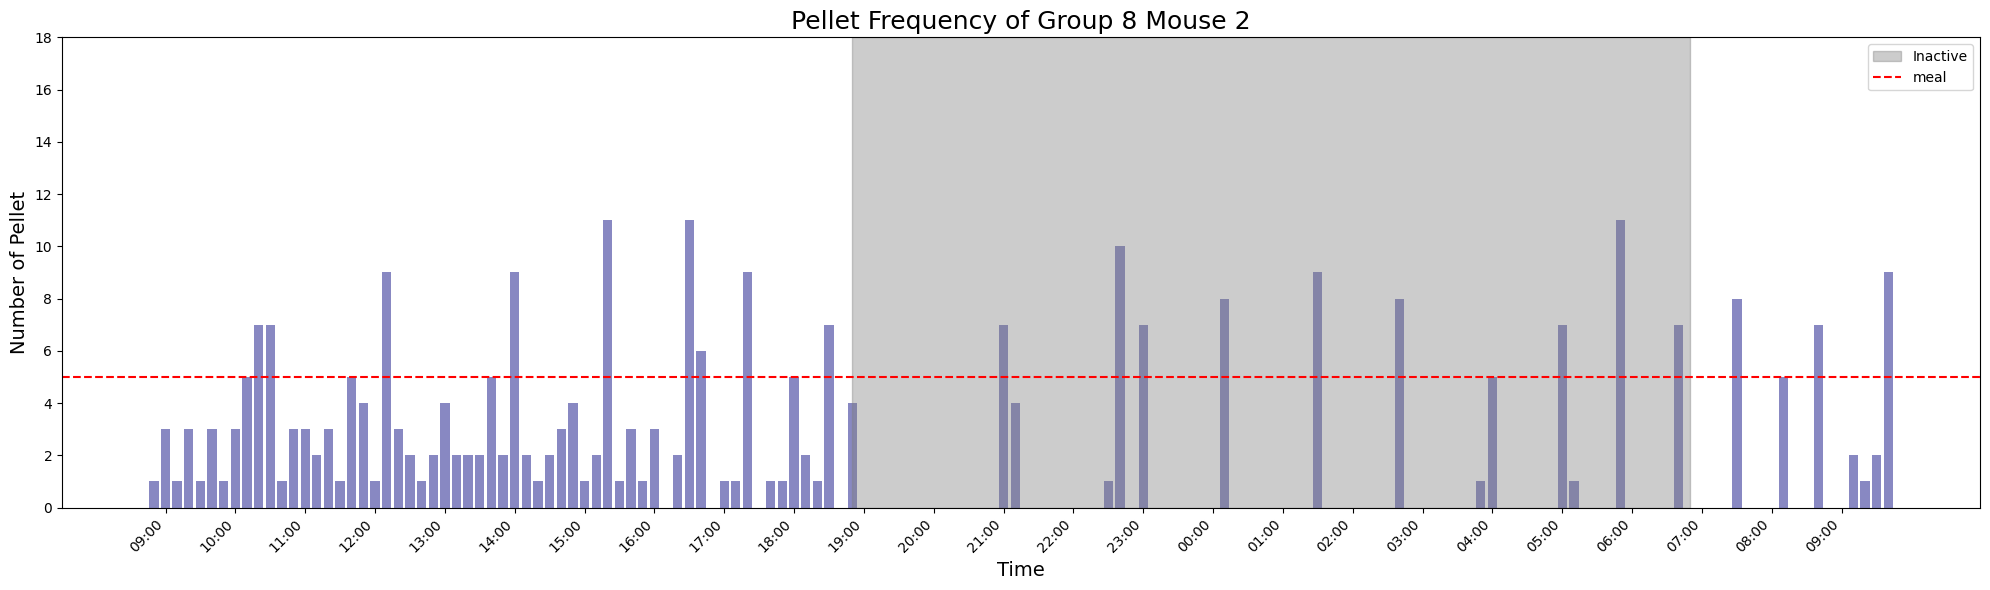

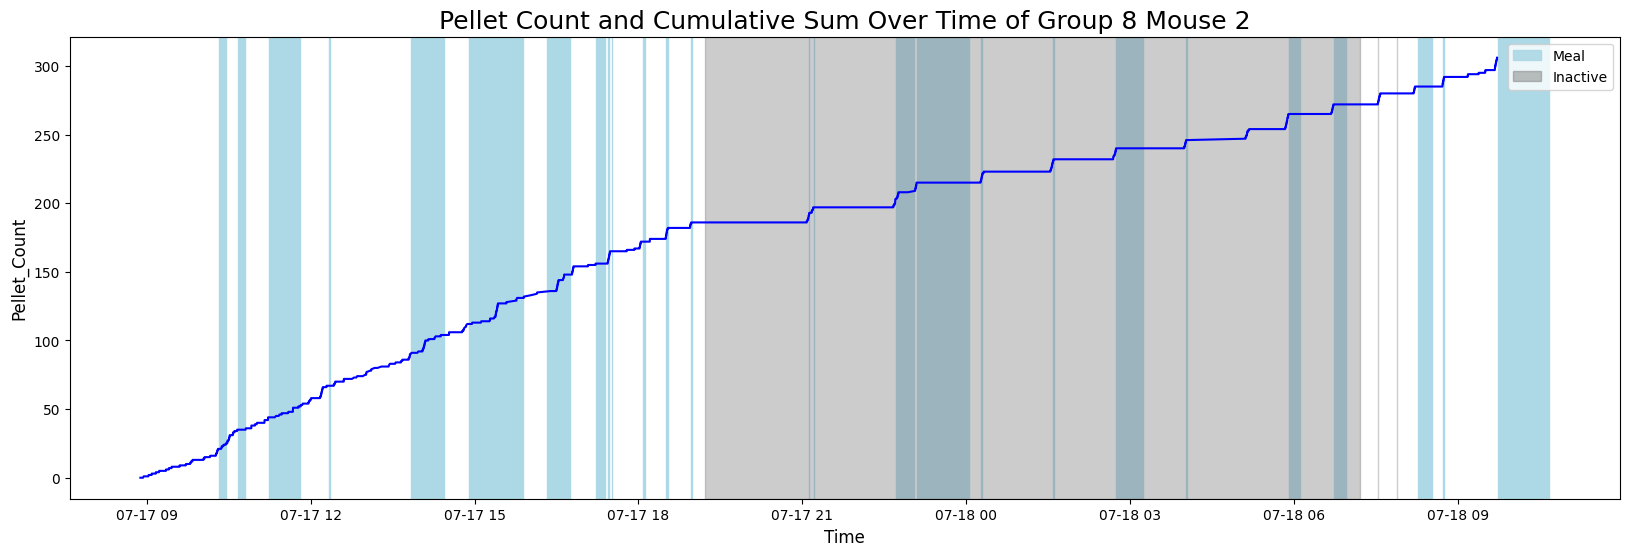

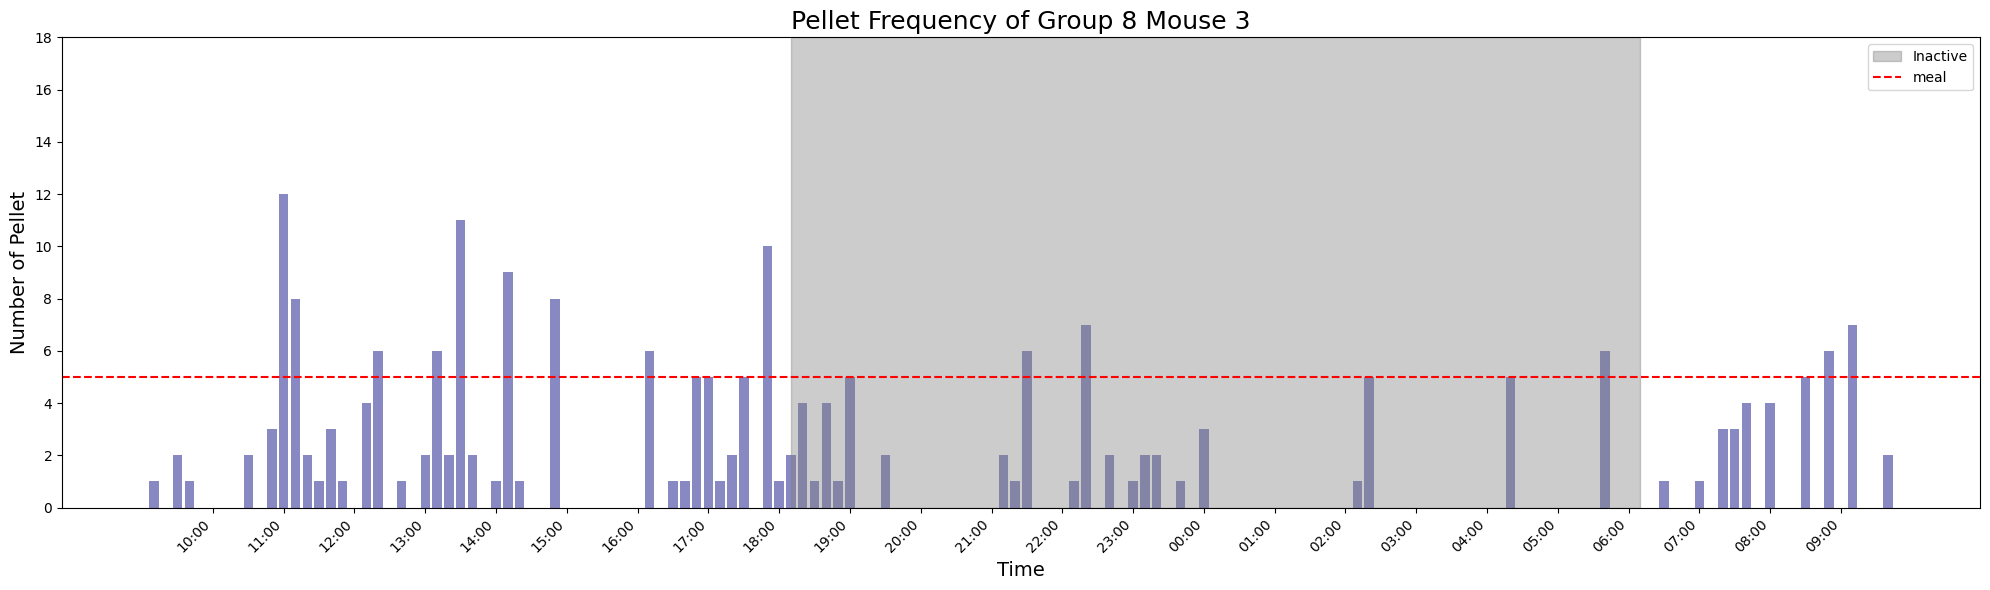

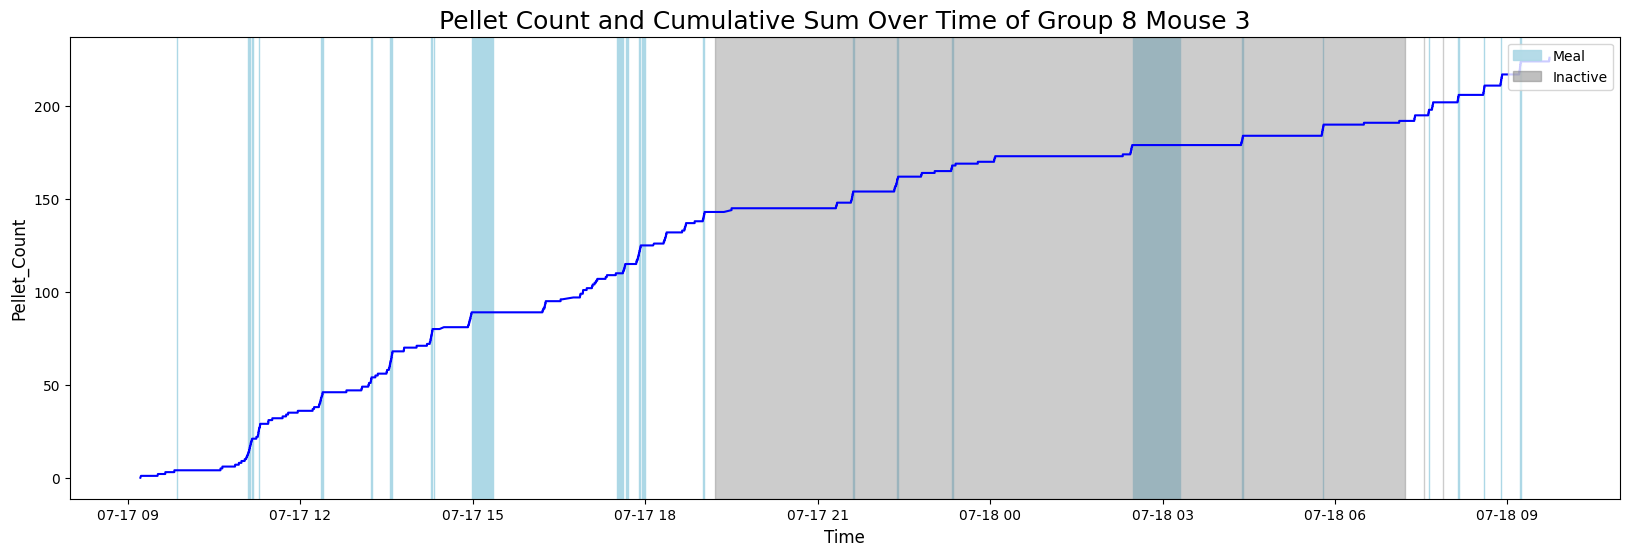

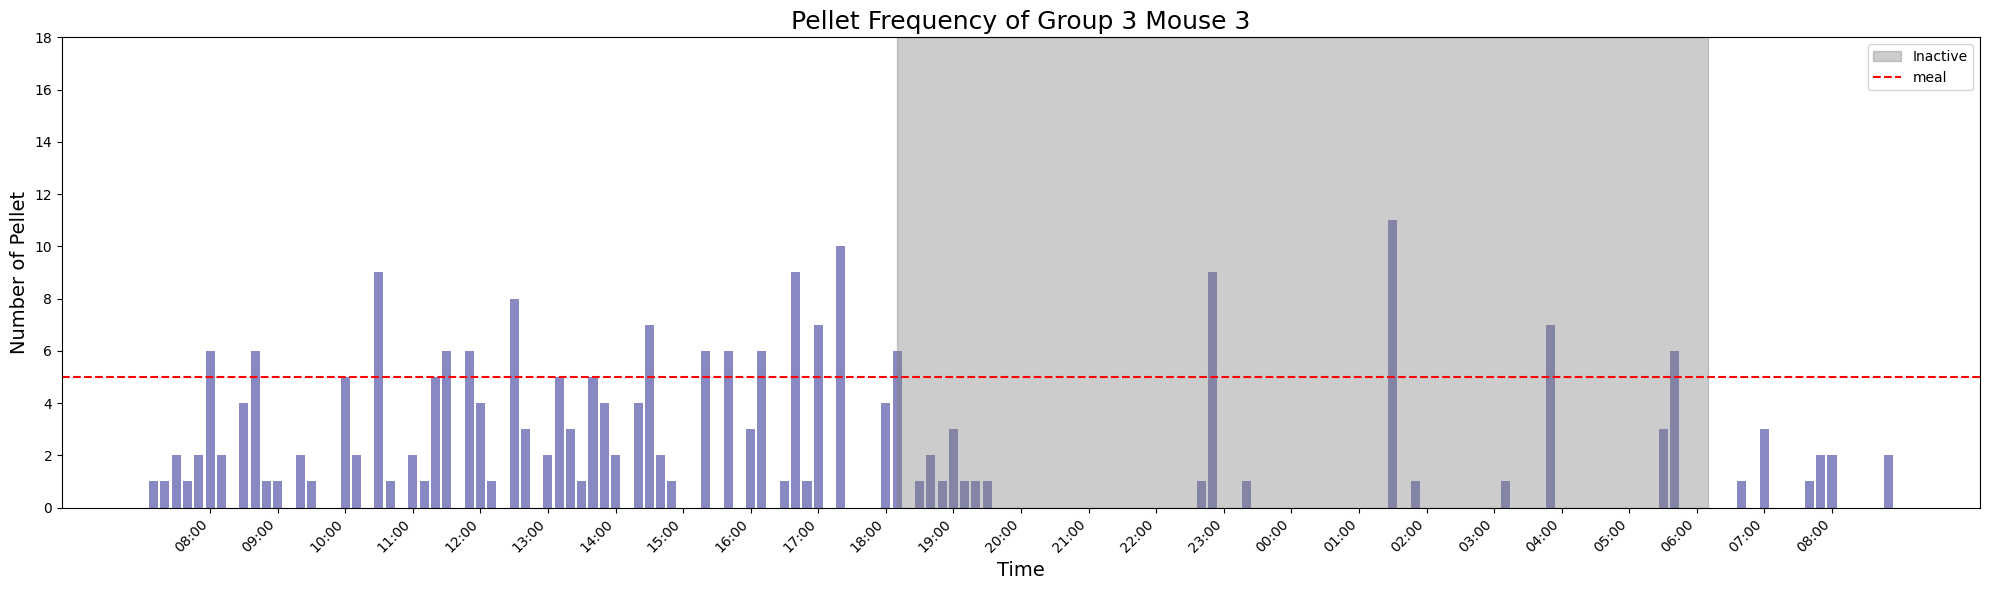

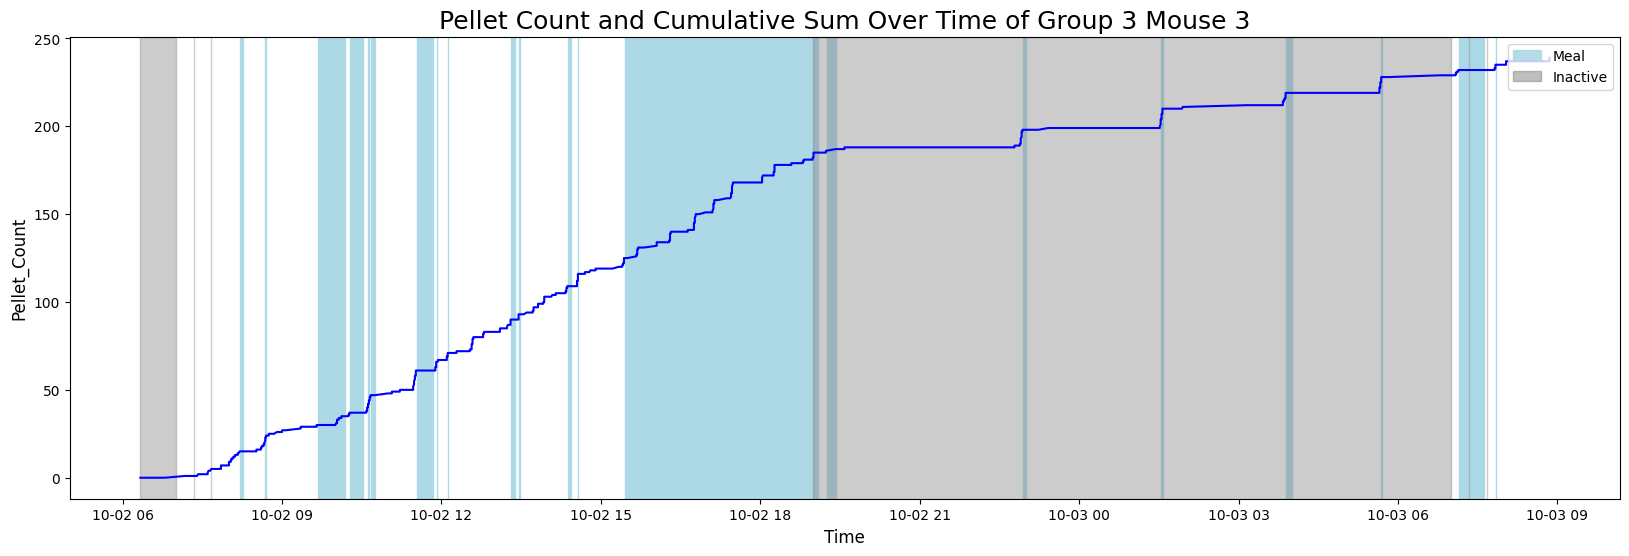

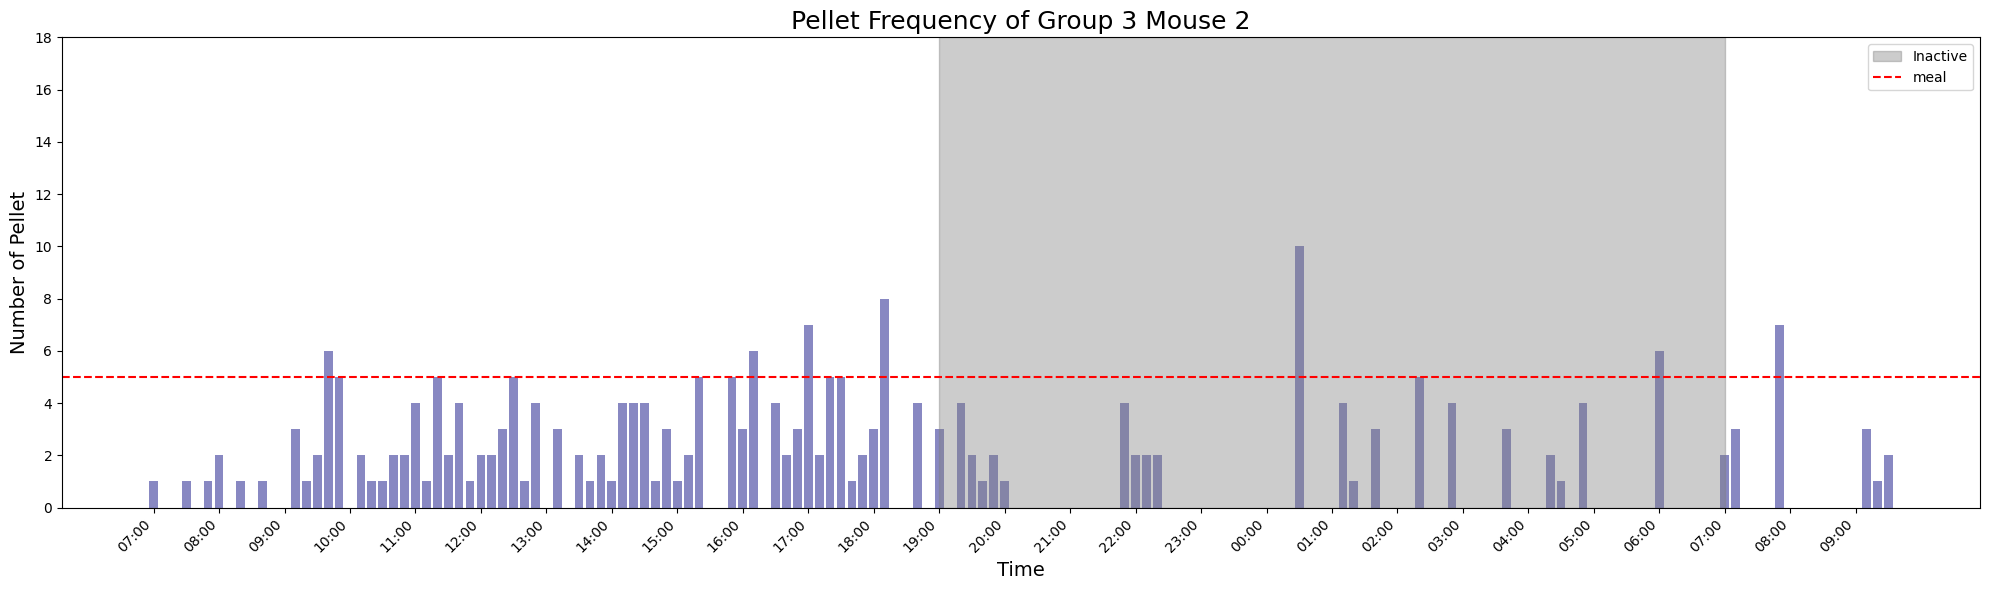

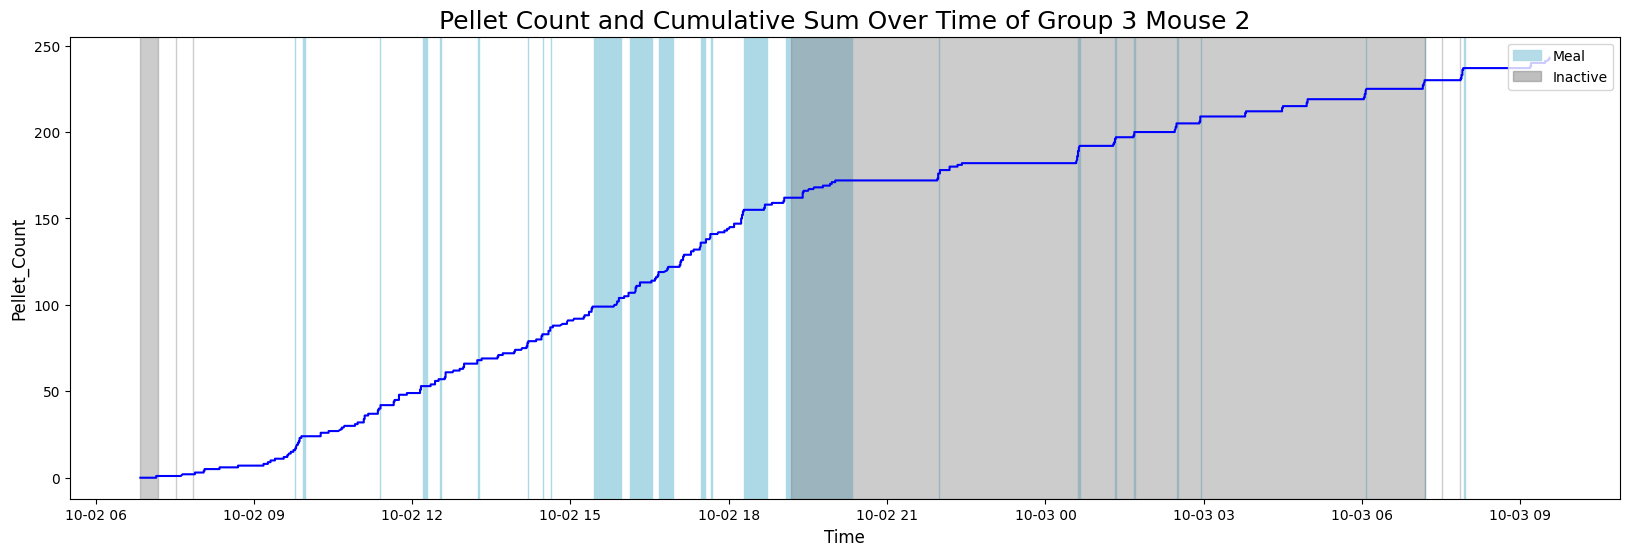

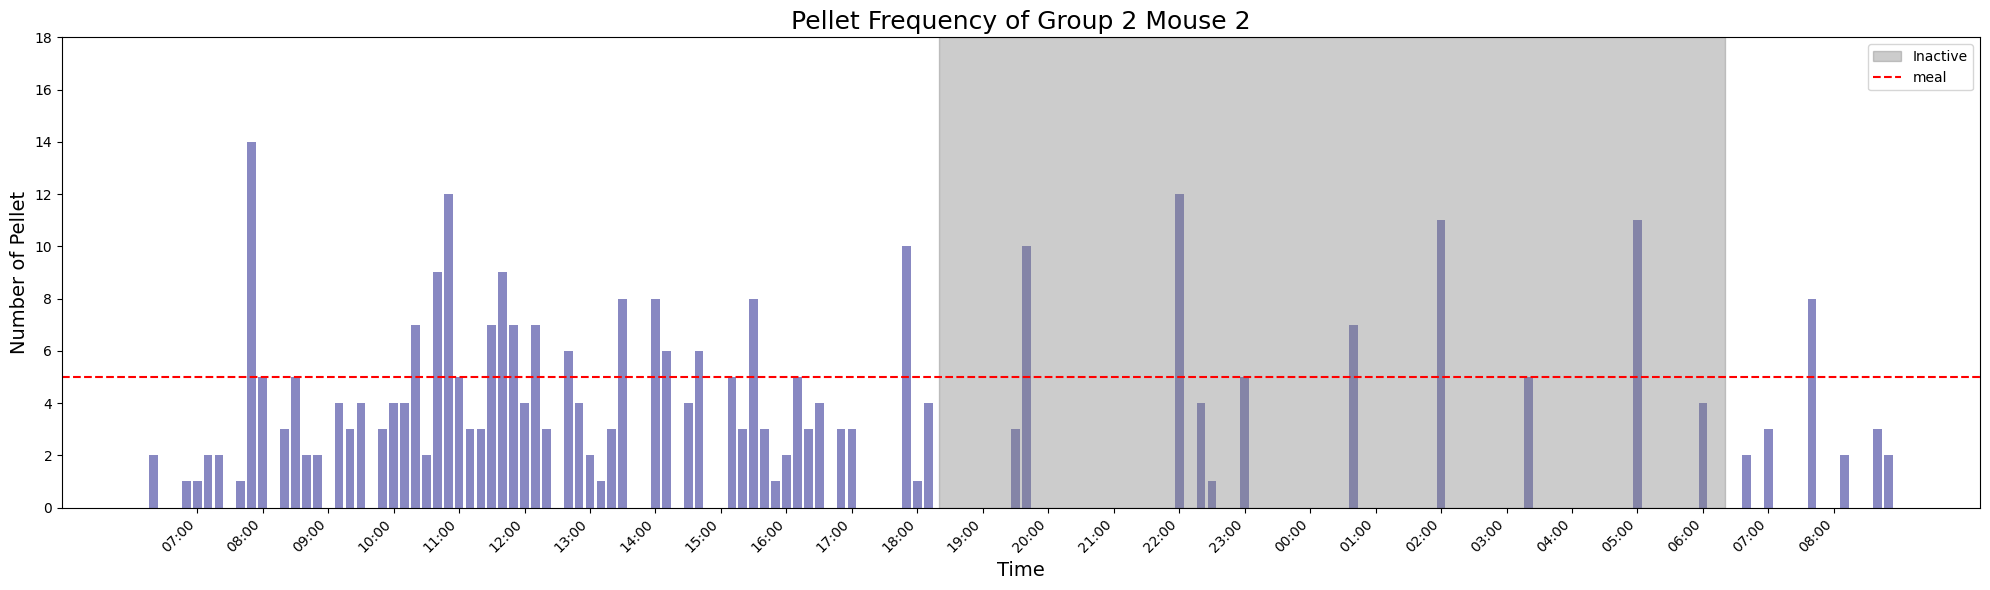

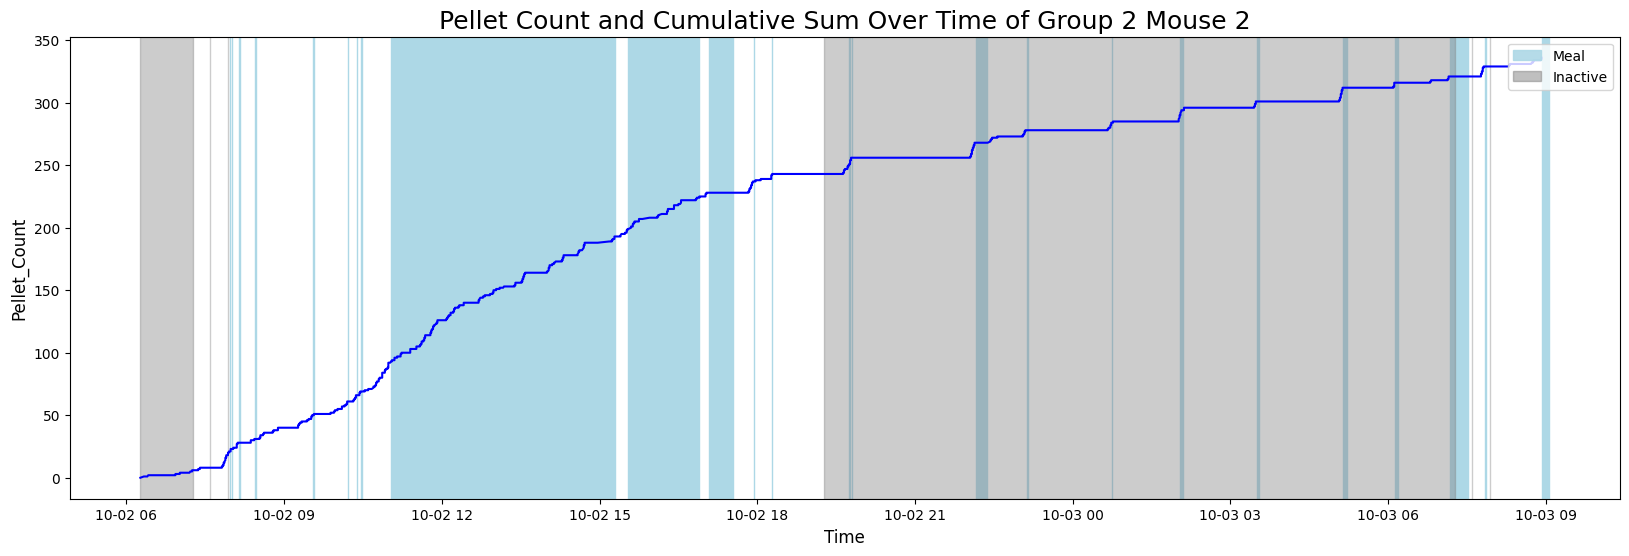

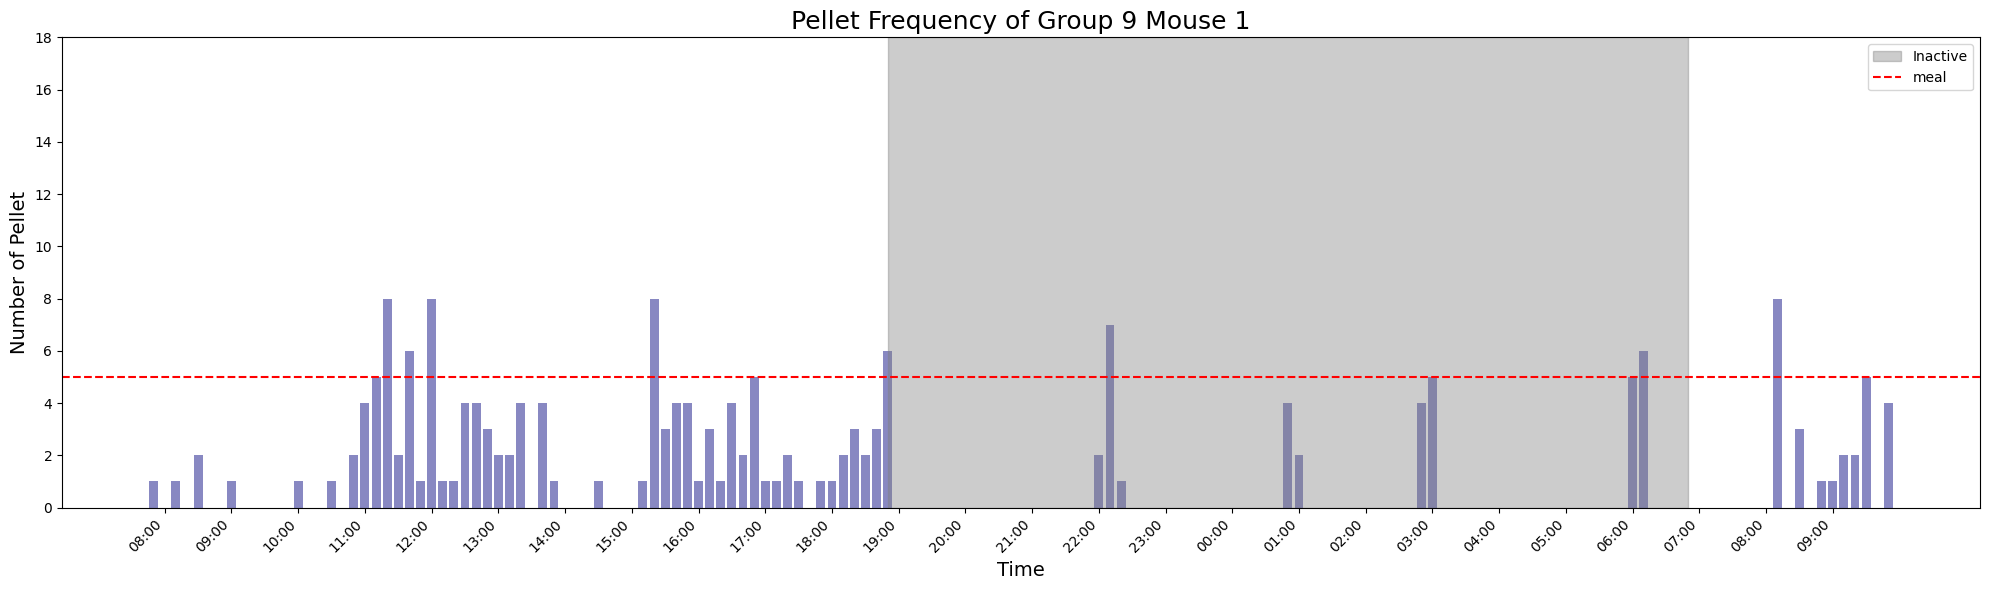

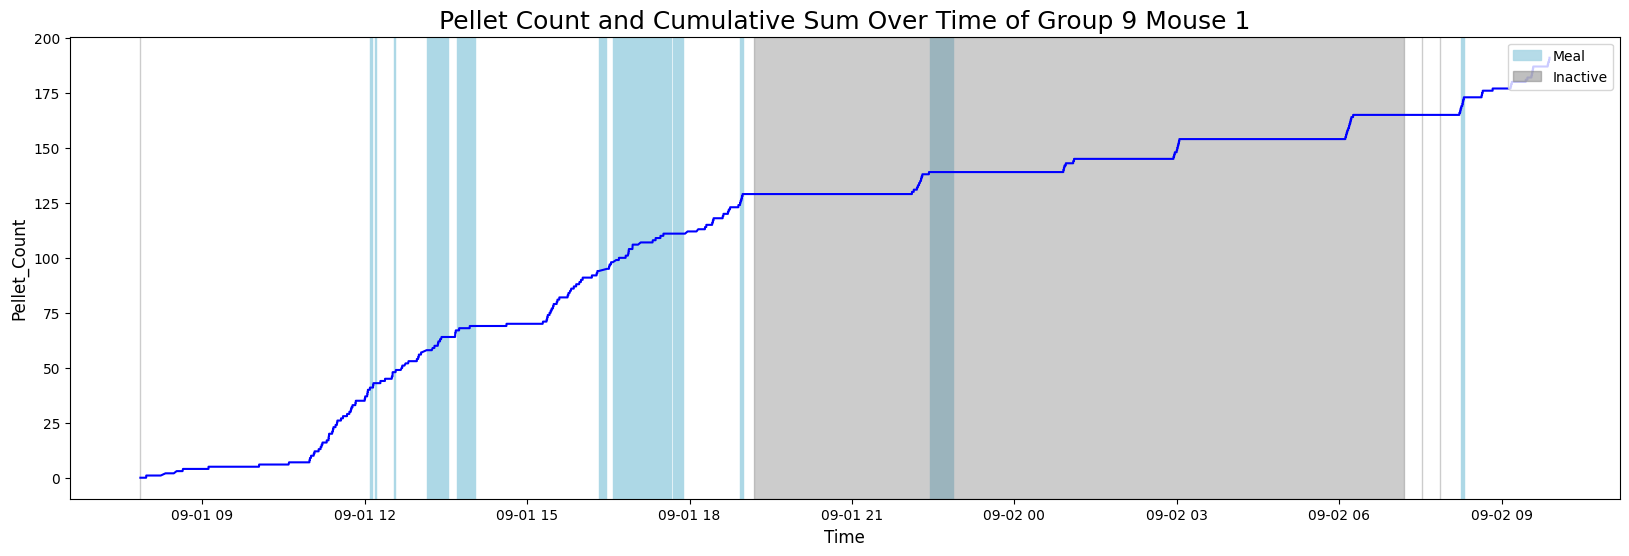

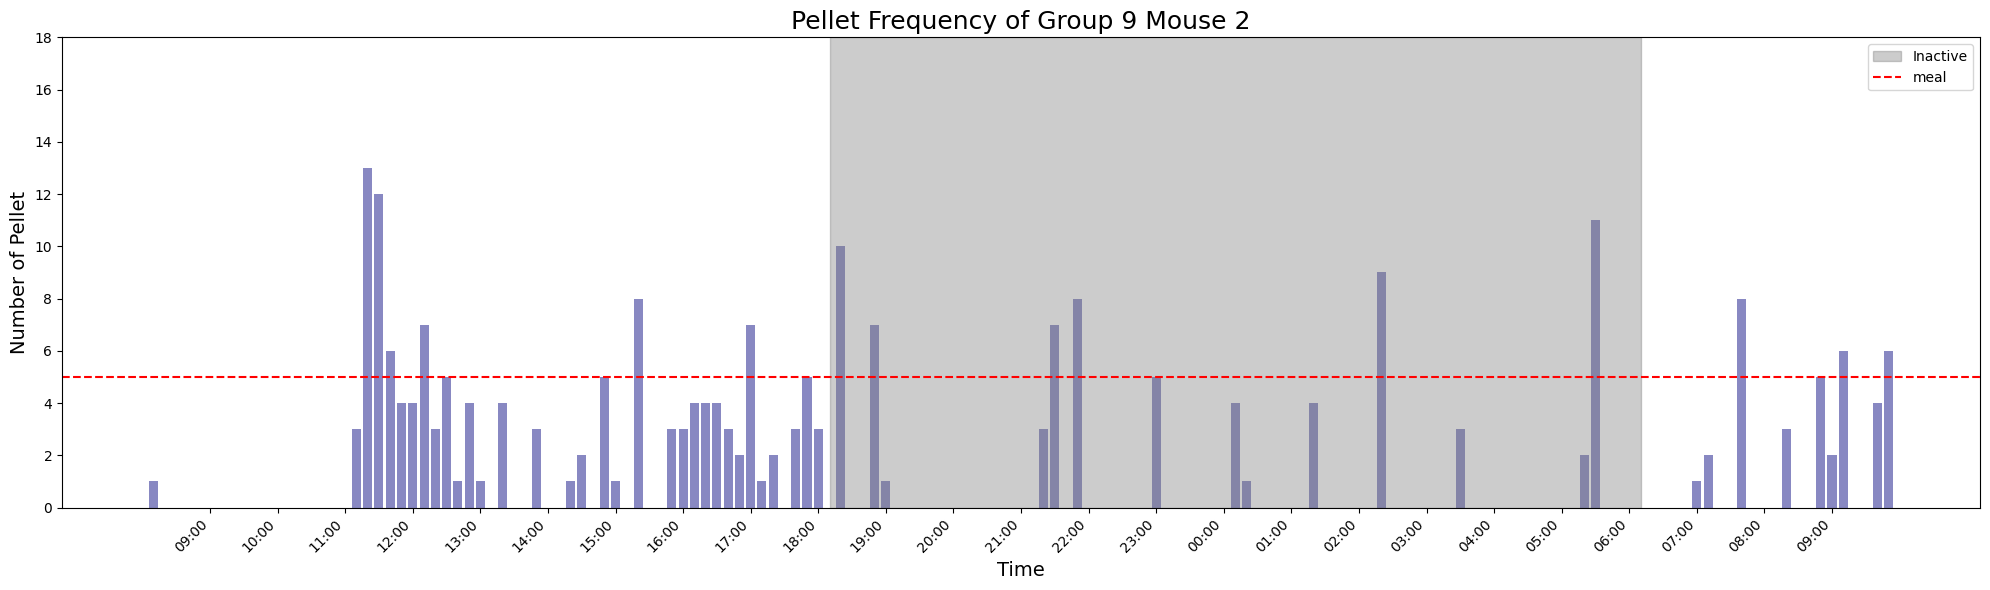

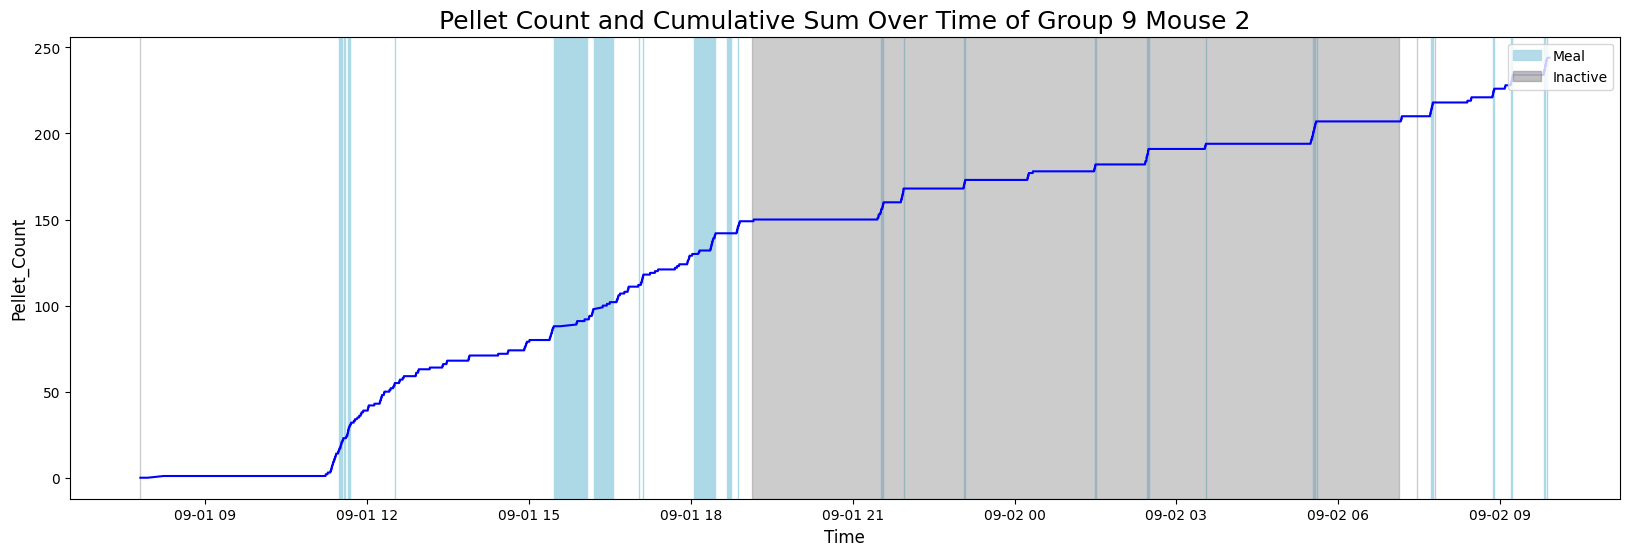

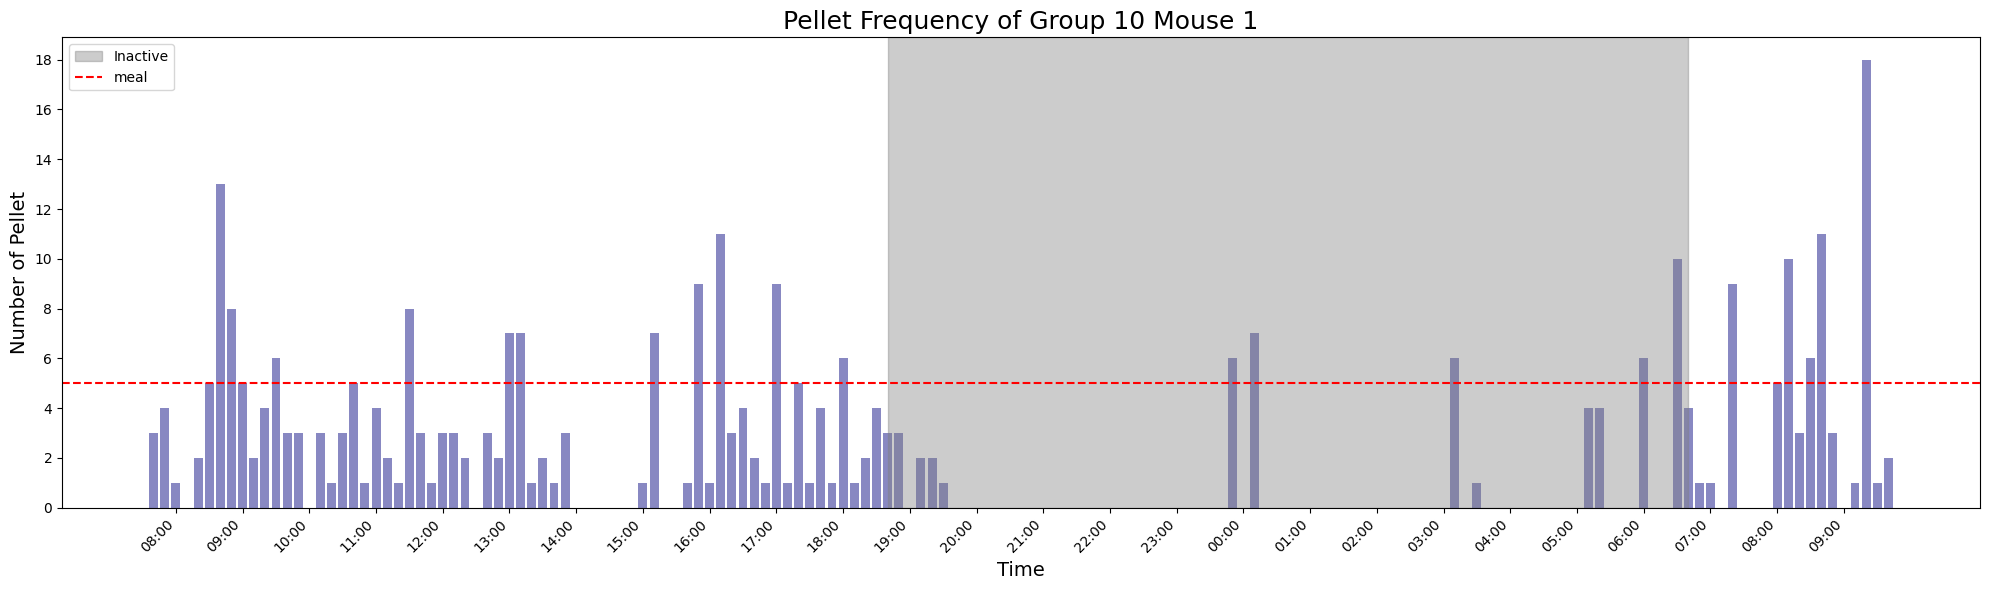

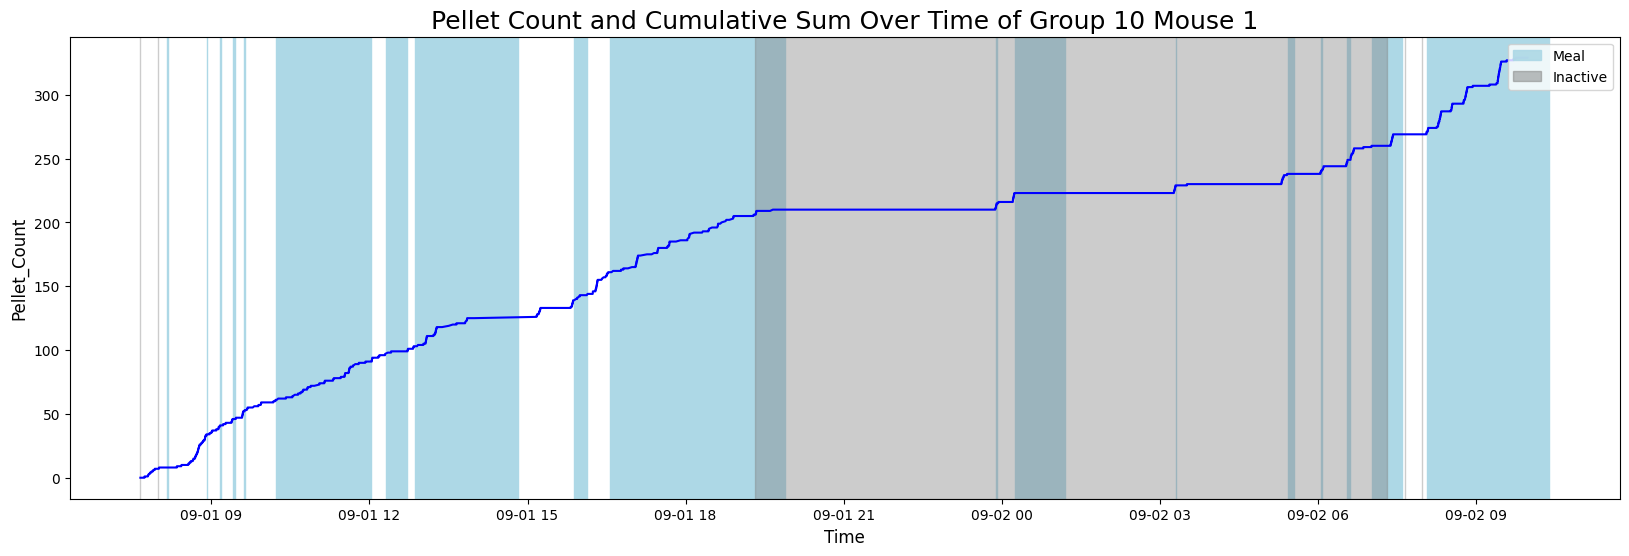

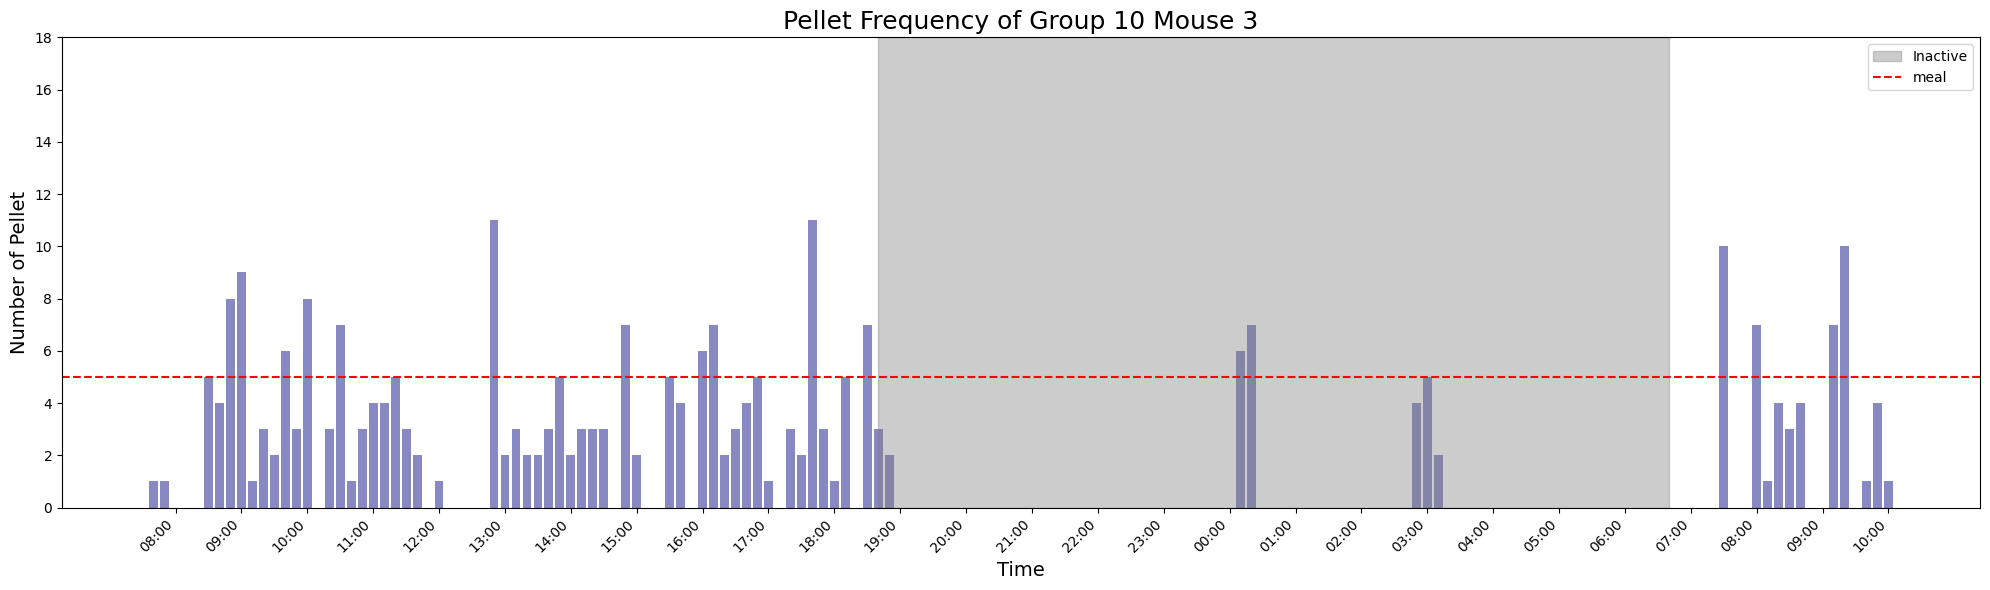

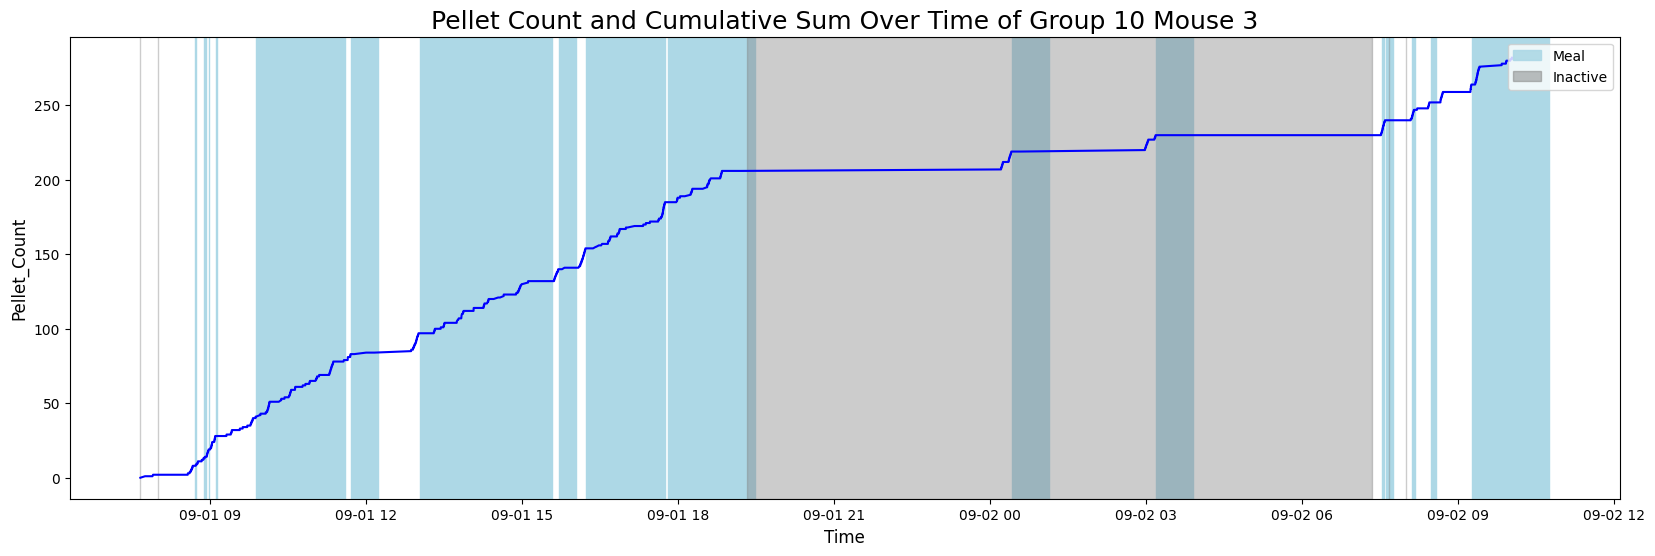

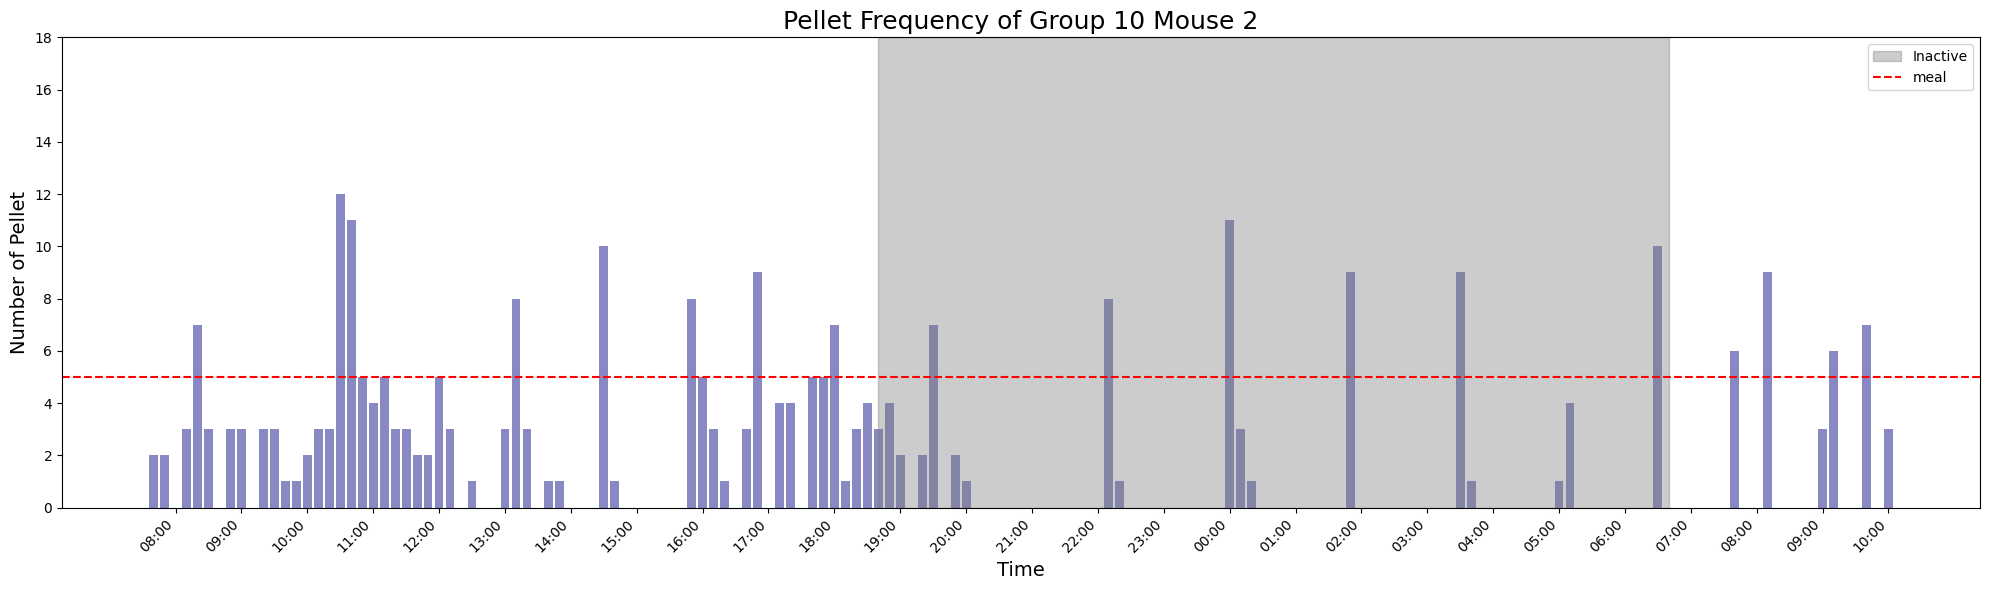

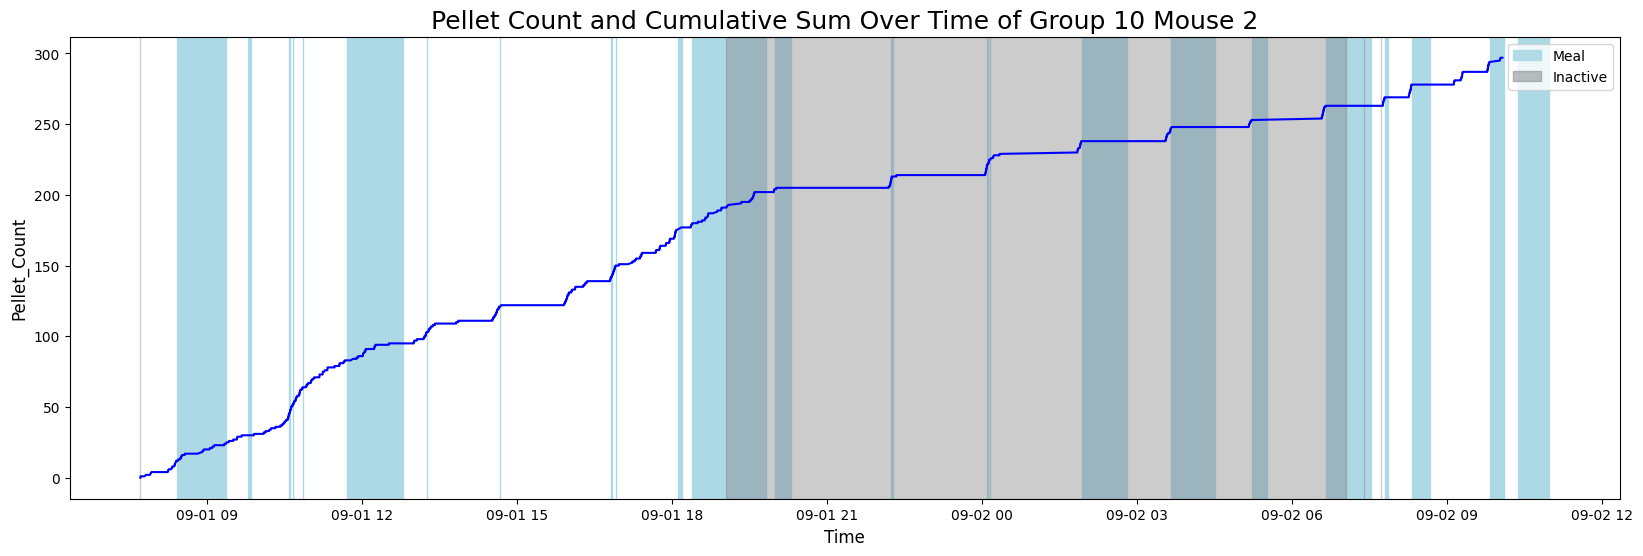

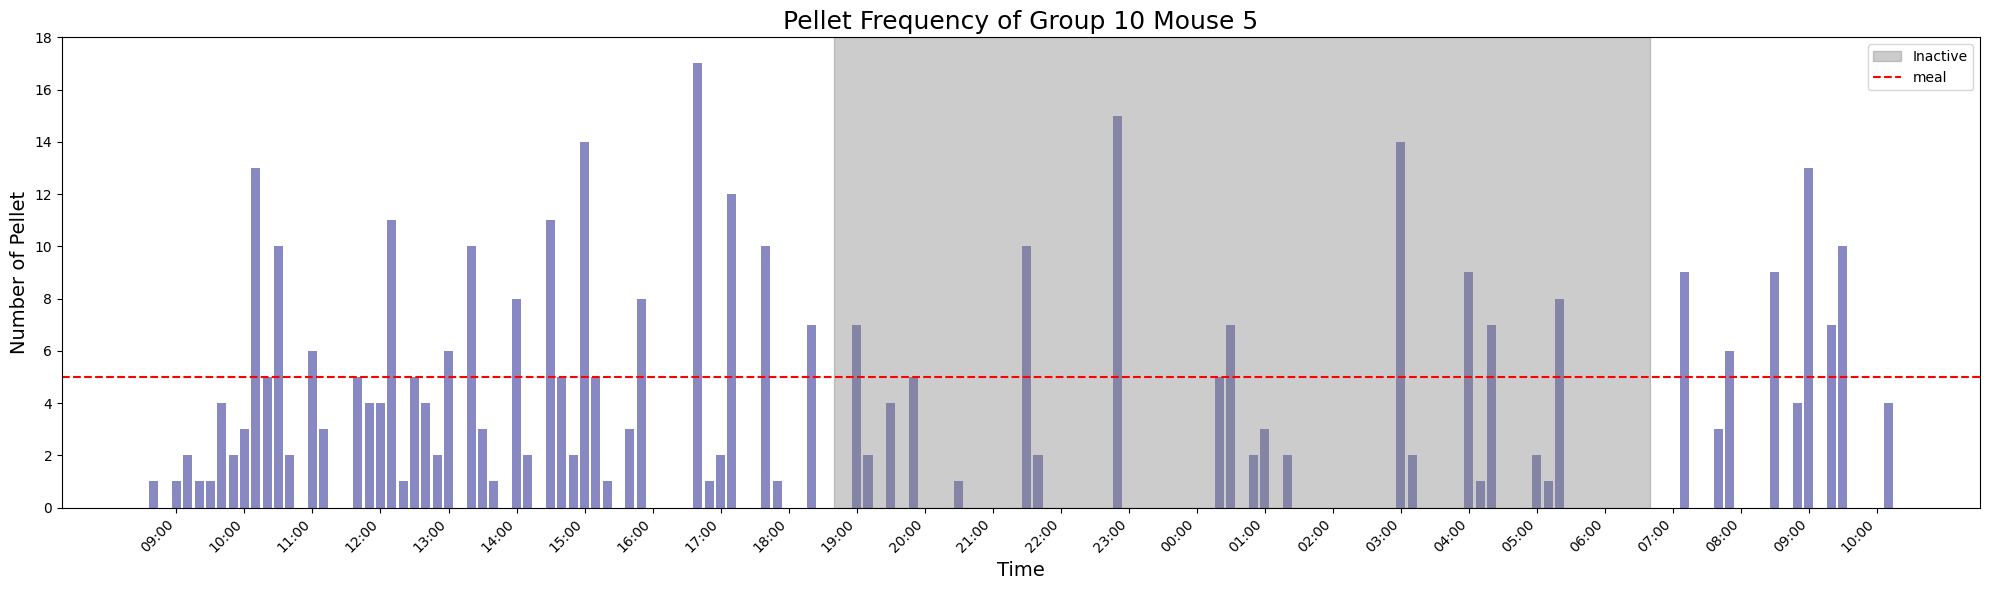

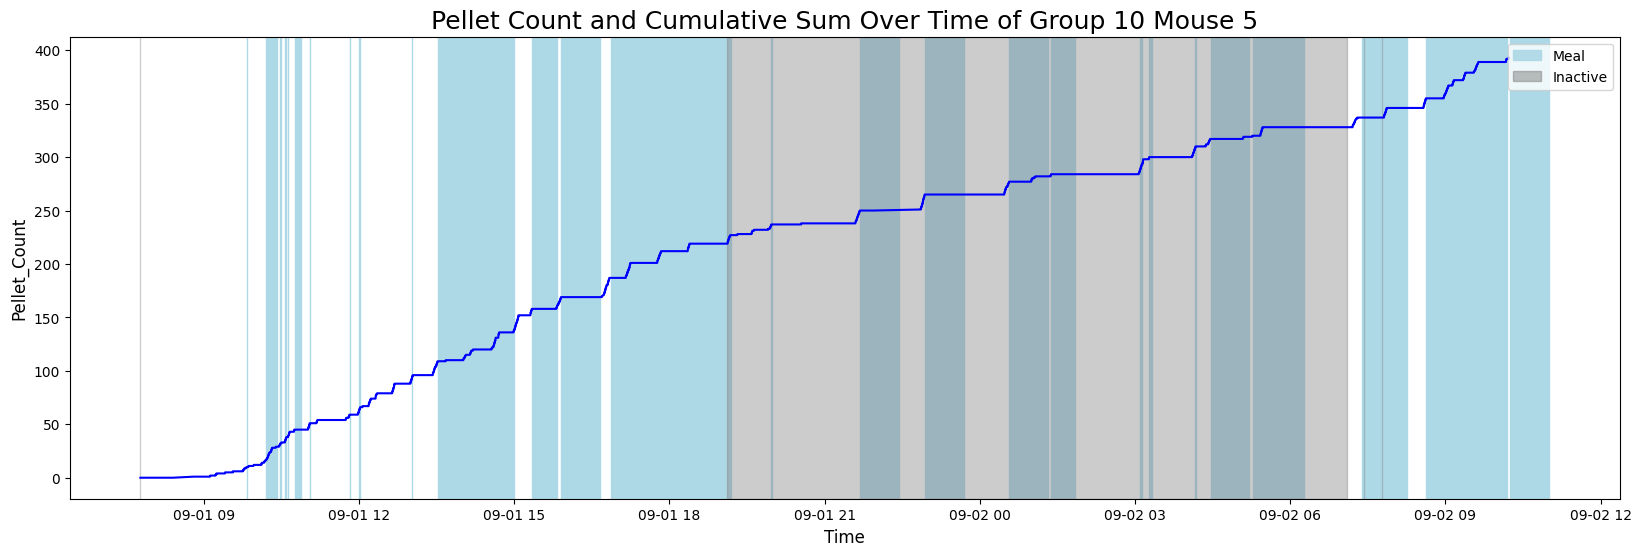

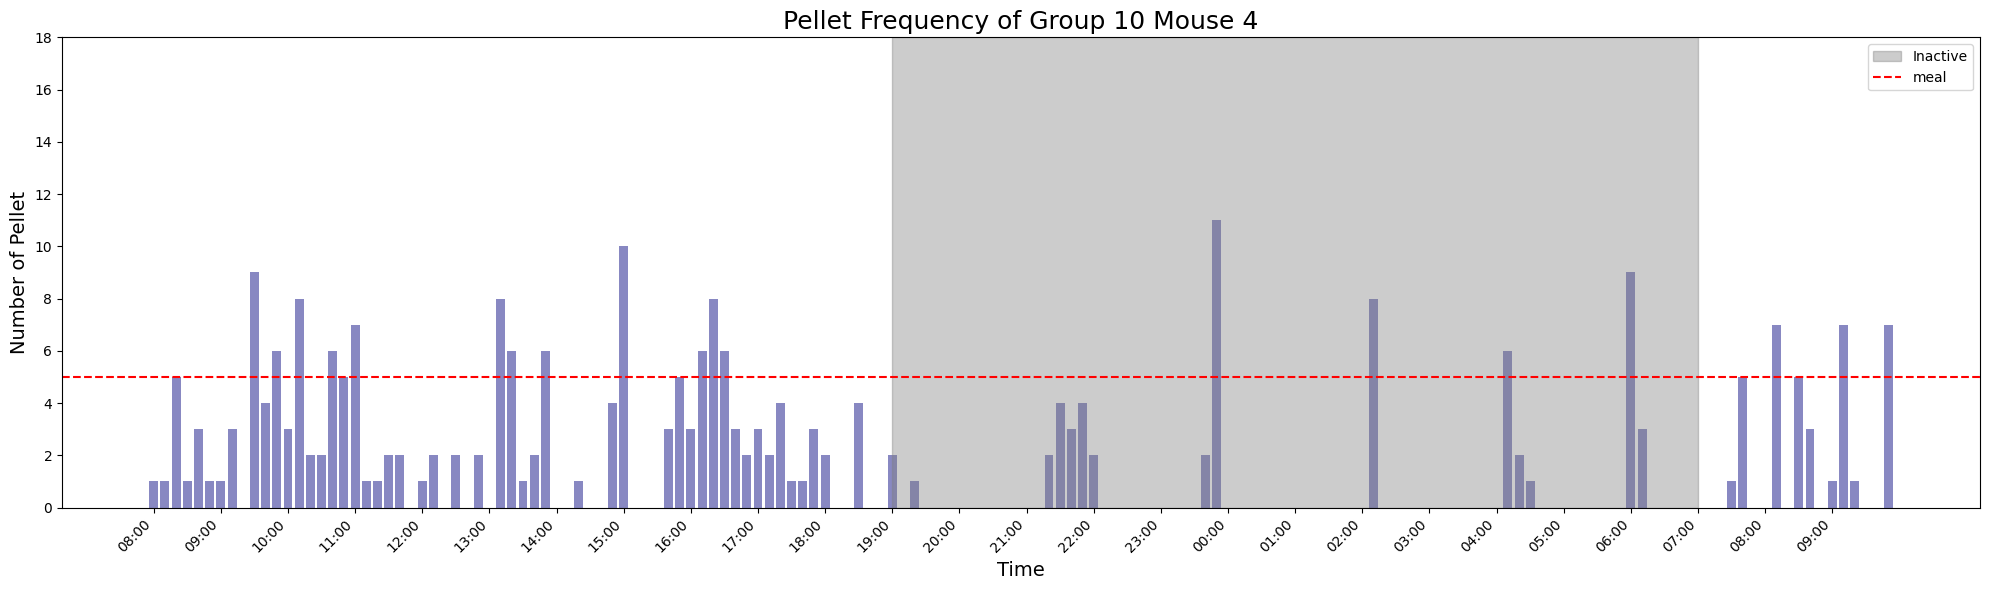

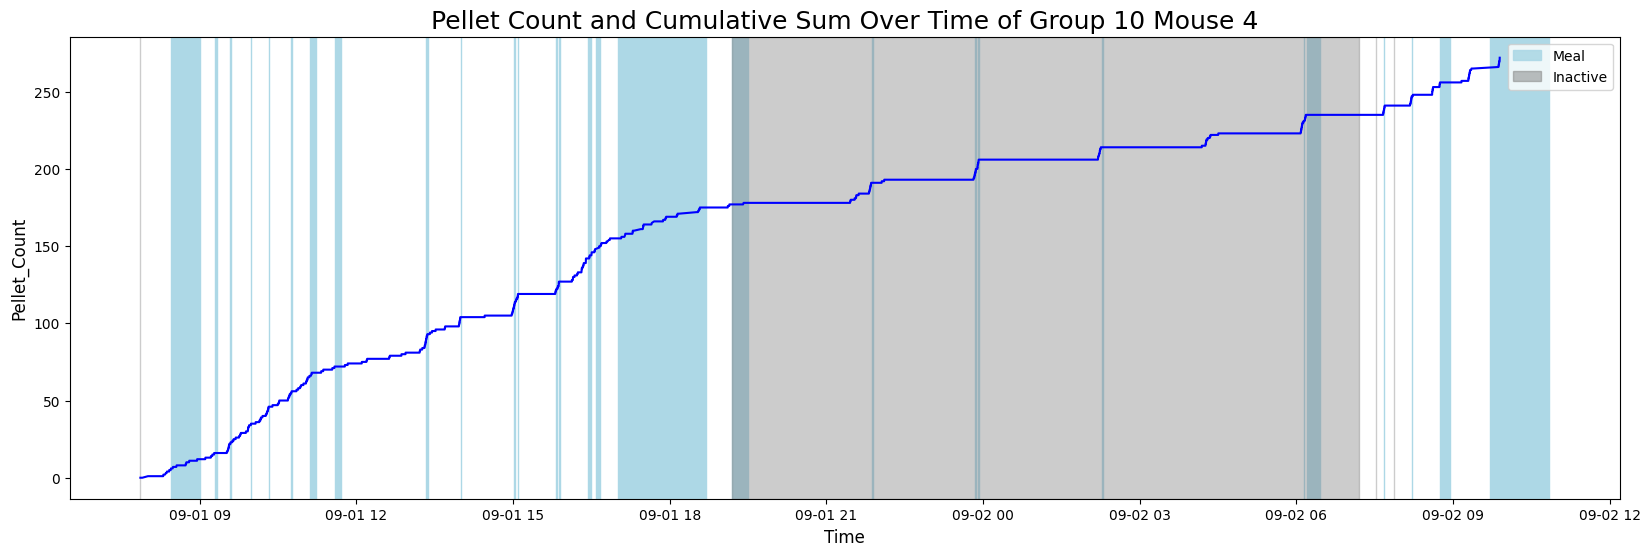

In [3]:
cask_avg_pellet = [] # pellet per hour
cask_dark_meals = [] # percentage of meals in inactive/dark phase
cask_fir_meal = []
flip_cask_meal_count = []

for sheet in cask_sheets:
    data = read_excel_by_sheet(sheet=sheet, parent=cask_path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    meal,_,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    cask_fir_meal.append(meal_1)
    flip_cask_meal_count.append(avg)
    cask_avg_pellet.append(ml.average_pellet(group))
    cask_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

In [4]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

#### Inactive and active meal in group

In [5]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals)

P Value is  2.304690968116606e-16
There is a significant difference between the two groups.


In [6]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  2.7546358969118216e-17
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [7]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count, test_side='greater')

P Value is  0.12294038885404542
There is no significant difference between the two groups.


#### Inactive and active meal between group

In [8]:
invs.perform_T_test(ctrl_dark_meals, cask_dark_meals, test_side='less')

P Value is  0.02617835951024476
Experiment group is significantly less than control group


### Average Pellet

Control Size: 27
CASK Size: 24
Control Average: 226.24481481481482
CASK Average: 250.1016666666667
Control Standard Deviation: 26.657822977991398
CASK Standard Deviation: 42.70773900611566


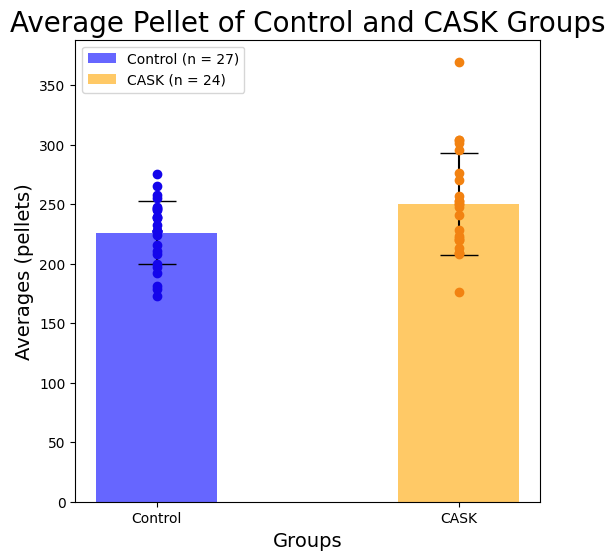

In [9]:
ml.graph_group_stats(ctrl_avg_pellet, cask_avg_pellet, stats_name='Average Pellet', unit='pellets', exp_name='CASK')

In [10]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='greater')

P Value is  0.009600556935325053
Experiment group is significantly greater than control group


#### Time needed to start the first meal

Control Size: 27
CASK Size: 24
Control Average: 2.7030884773662547
CASK Average: 1.9409537036921296
Control Standard Deviation: 1.3384606018062948
CASK Standard Deviation: 1.2290268871327628


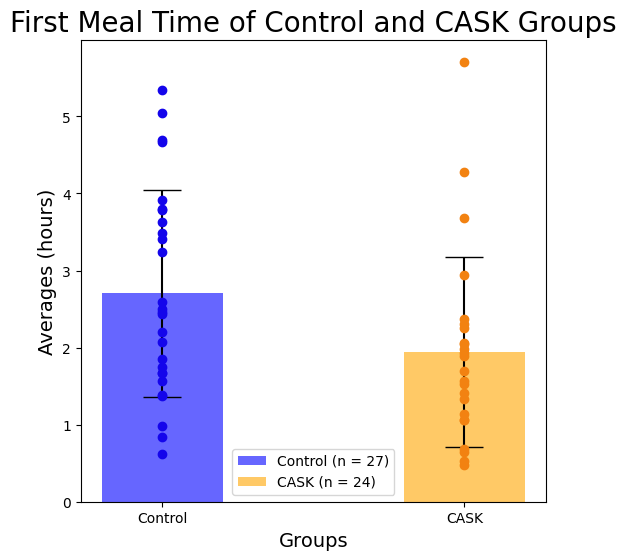

In [11]:
ml.graph_group_stats(ctrl_fir_meal, cask_fir_meal, stats_name='First Meal Time', unit='hours',exp_name='CASK')

In [12]:
invs.perform_T_test(ctrl_fir_meal, cask_fir_meal, test_side='less')

P Value is  0.02004891678712921
Experiment group is significantly less than control group
